 # Participation Distribution in Committee Selection

 ### Executive Summary

 In the following computer experiments,
 we aim to understand the distribution of selections in a committee
 when varying sizes of the participant pool of SPOs and the committee.
 We show that the "pigeonhole principle" helps us interpret the results
 and understand the finite distribution of the committee seats assigned
 to participants as a function of stake, group, and committee sizes.

 The experiment is designed to:
 - Sample without replacement a group of participants from the population and
 - Calculate the stake weight for each participant, which is the stake normalized
   over the group to sum to 1.
 - Assign a committee of the fixed group size based on the stake weight of each
   using random selection with replacement.
 - Analyze the relationship and distribution of committee selection with group size.

 We conducted the experiments with varying sizes $(100, 200, 300, ..., 800)$
 of groups and committees. The results are visualized through plots of committee
 assignments where we vary the group size to see how the committee selection and
 seat count changes.

 The results show that some group members with smaller stake weights may not (ever?)
 get selected for committee seats.
 With repeated trials where a new committee is selected, called an *epoch*,
 and assuming nonzero stake weight, there is nonzero probability of selecting *any*
 participant in the long run. However, in the short term, there is a significant chance
 that some participants will not ever get selected, almost surely.
 This is a natural outcome of the selection process
 with a discrete and finite number of seats. This is a manifestation of the
 this committee selection process as it currently stands.


In [ ]:
# %%

# Load the required libraries

from participation_lib import (
    np,
    pd,
    plt,
    load_data,
    get_stake_distribution,
    assign_commitee,
    plot_group_to_committee_index,
    plot_selection_count_vs_stake,
    plot_committee_selection_counts,
    plot_committee_selection_seat_cutoff,
)
import seaborn as sns

In [ ]:
# %%

# Load the Data: The population of registered SPOs

population = load_data("../data/pooltool-cleaned.csv")
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3056 non-null   object 
 1   stake          3056 non-null   int64  
 2   stake_percent  3056 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 71.8+ KB


In [ ]:
# %%

population.describe()

stake  stake_percent
count  3.056000e+03    3056.000000
mean   7.305314e+06       0.032723
std    1.648449e+07       0.073839
min    0.000000e+00       0.000000
25%    5.265000e+02       0.000002
50%    5.692500e+04       0.000255
75%    3.282500e+06       0.014703
max    1.054300e+08       0.472250

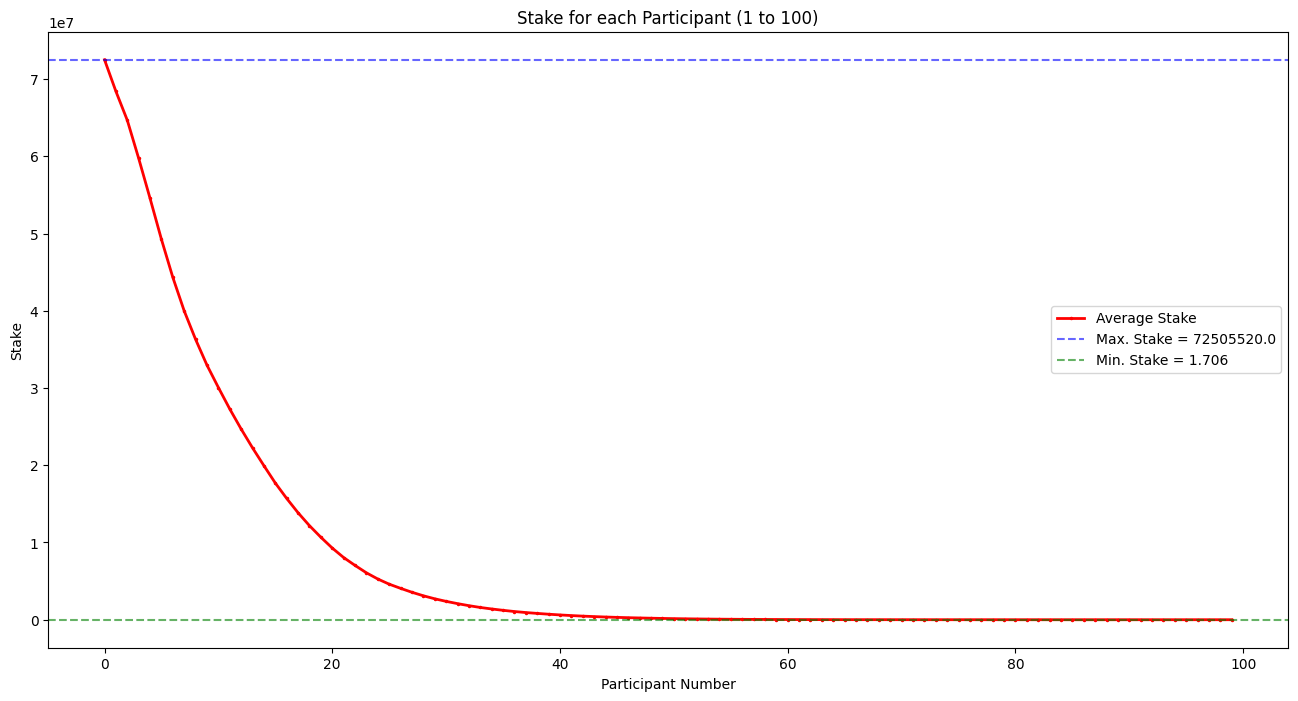

stake  stake_weight
0   7.250552e+07  9.187861e-02
1   6.841225e+07  8.669164e-02
2   6.467127e+07  8.195109e-02
3   5.973343e+07  7.569388e-02
4   5.455255e+07  6.912870e-02
..           ...           ...
95  1.949900e+01  2.470903e-08
96  1.151700e+01  1.459428e-08
97  6.368000e+00  8.069496e-09
98  3.539000e+00  4.484602e-09
99  1.706000e+00  2.161834e-09

[100 rows x 2 columns]

In [ ]:
# %%

# Let's now sample a group of participants from the population
# and calculate the stake weight for each participant.

group_size = 100

group_stakes = get_stake_distribution(
    population,
    group_size=group_size,
    num_iter=1000,
    plot_it=True,
)
group_stakes

In [ ]:
# %%

group_stakes.describe()

stake  stake_weight
count  1.000000e+02  1.000000e+02
mean   7.891447e+06  1.000000e-02
std    1.662034e+07  2.106120e-02
min    1.706000e+00  2.161834e-09
25%    1.886276e+03  2.390279e-06
50%    1.532795e+05  1.942350e-04
75%    4.771583e+06  6.046524e-03
max    7.250552e+07  9.187861e-02

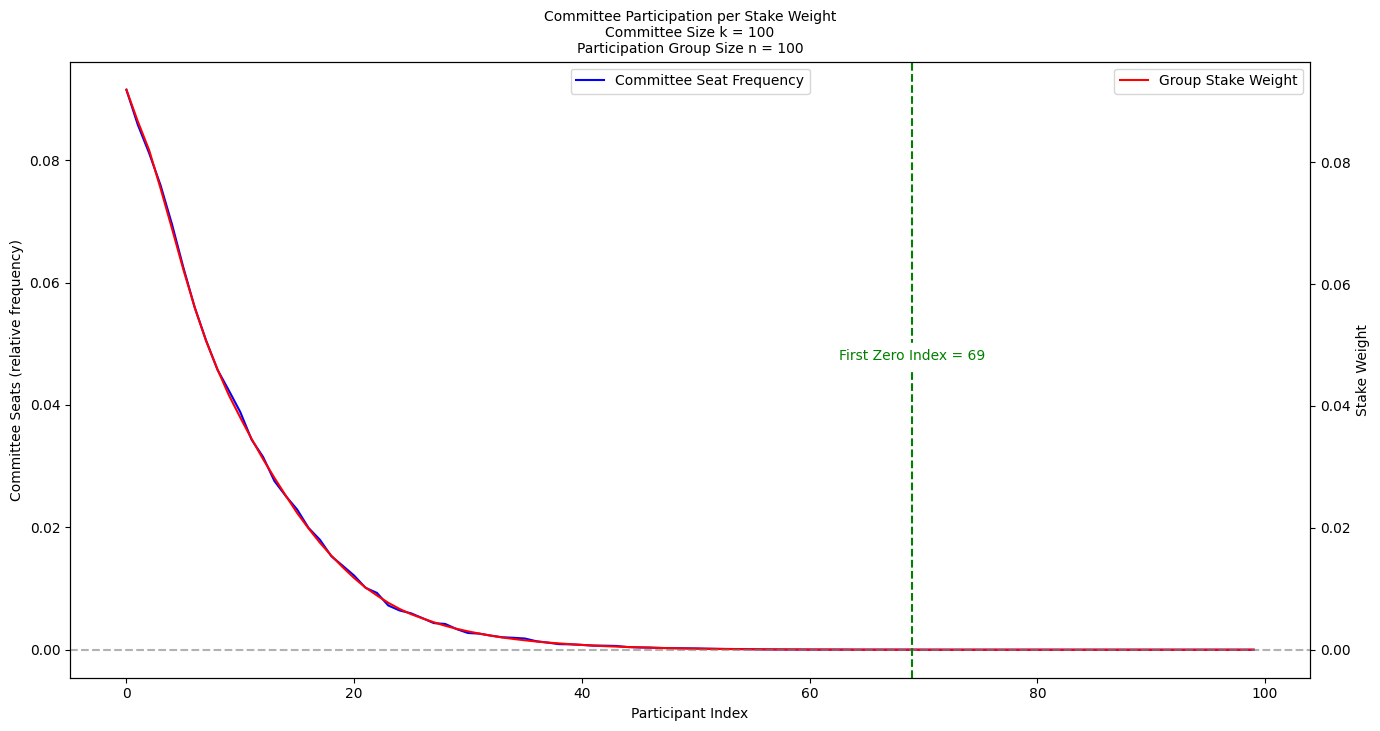

In [ ]:
# %%

# Let's now assign a committee of the fixed group_size
# based on the stake weight of each

committee, seat_counts, first_zero_index = assign_commitee(
    group_stakes,
    committee_size=group_size,
    num_iter=1000,
)

In [ ]:
# %%

print("Committee")  # Participants selected for the committee
print(committee)
print("\nSeat Counts")  # Number of times each participant is selected
print(seat_counts)
print("\nFirst Zero Index")  # Index where the seat count first goes to zero
print(first_zero_index)

Committee
          stake  stake_weight
1   68412250.00      0.086692
6   44320150.00      0.056162
24   5272658.06      0.006681
2   64671270.00      0.081951
0   72505520.00      0.091879
..          ...           ...
24   5272658.06      0.006681
3   59733430.00      0.075694
7   39975470.00      0.050657
4   54552550.00      0.069129
24   5272658.06      0.006681

[100 rows x 2 columns]

Seat Counts
0     0.09152
1     0.08581
2     0.08115
3     0.07591
4     0.06956
       ...   
72    0.00000
68    0.00000
65    0.00000
63    0.00000
99    0.00000
Name: relative frequency, Length: 100, dtype: float64

First Zero Index
69


In [ ]:
# %%

# Let's now create a plots of committee assignments where we vary
# the group size over {100, 200, 300, 400, 500} and see how the
# committee selection and seat count changes.

# Initialize Parameters:
comm_sizes = [100, 200, 300, 400, 500]  # vary over committee size, k
group_sizes = [
    100,
    200,
    300,
    400,
    500,
    600,
    700,
    800,
]  # vary over group size, n
num_iter = 1000  # Number of iterations for Monte Carlo simulation
# Note that the number of iterations here can be interpreted as the number
# of selection rounds for the committee, which we call an epoch.
# If we have a new epoch per day, then 1000 iterations is about 3 years.

# Collect the selection count values
# for each group size, keyed by committee size
committee_seats = {}

# Initialize an array to store the first zero index
# for each committee size (row) and group size (columns)
first_zero_indices = np.zeros(
    (
        len(comm_sizes),
        len(group_sizes),
    )
)

# Initialize a DataFrame to store the seat count for each group size
selection_counts = {}

Group Size ...: 100 participants
Committee Size: 100 seats


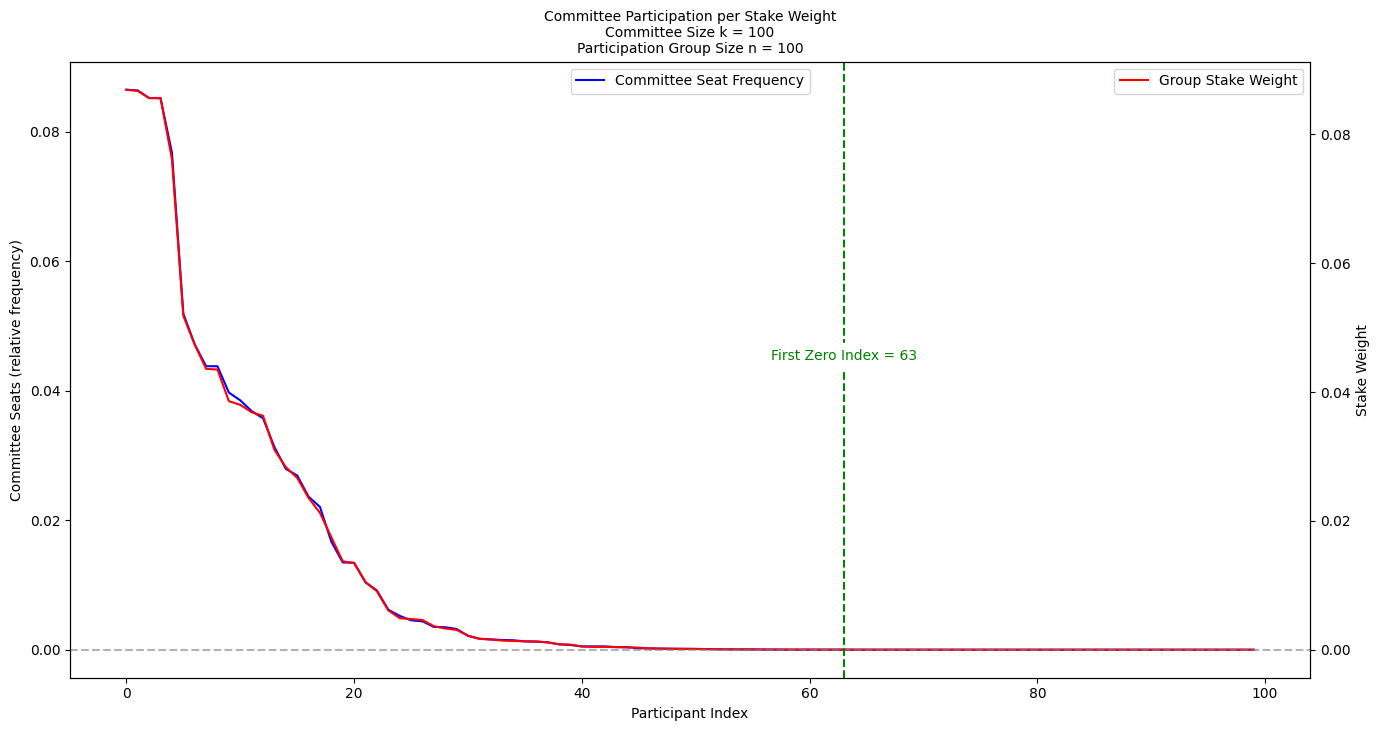

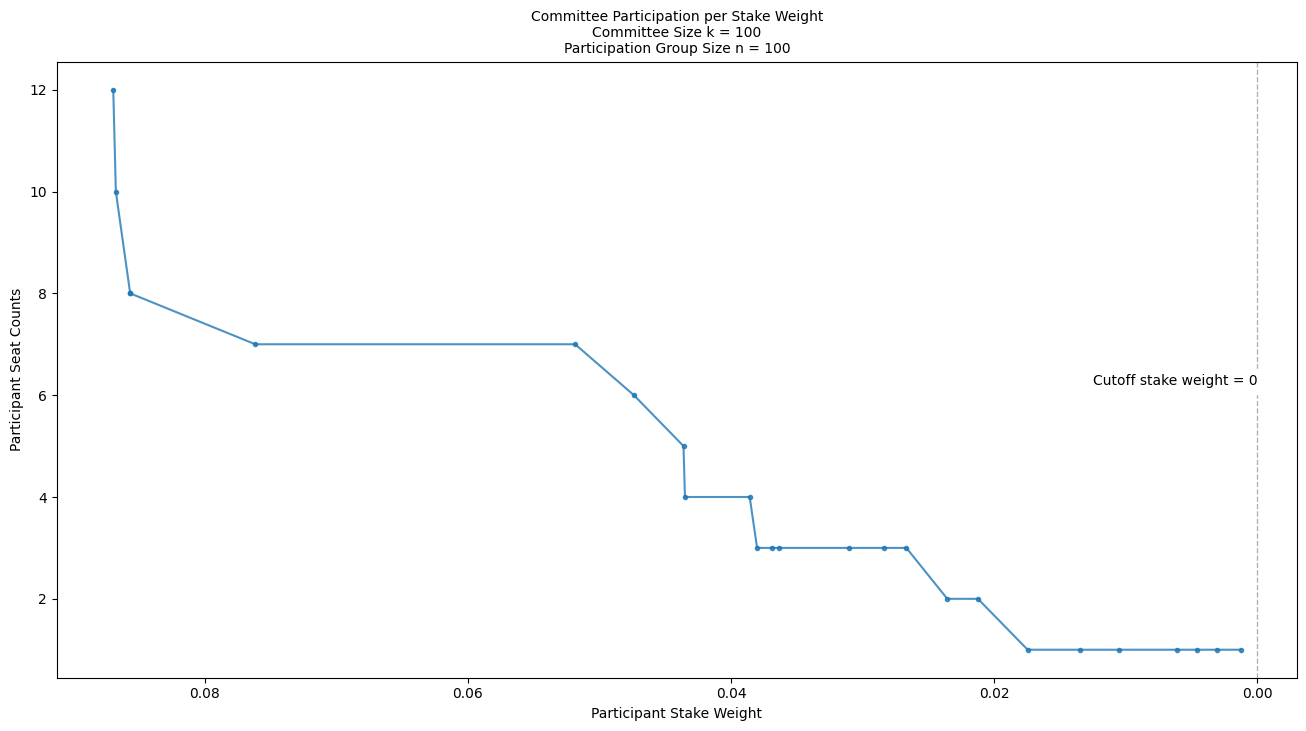

Group Size ...: 200 participants
Committee Size: 100 seats


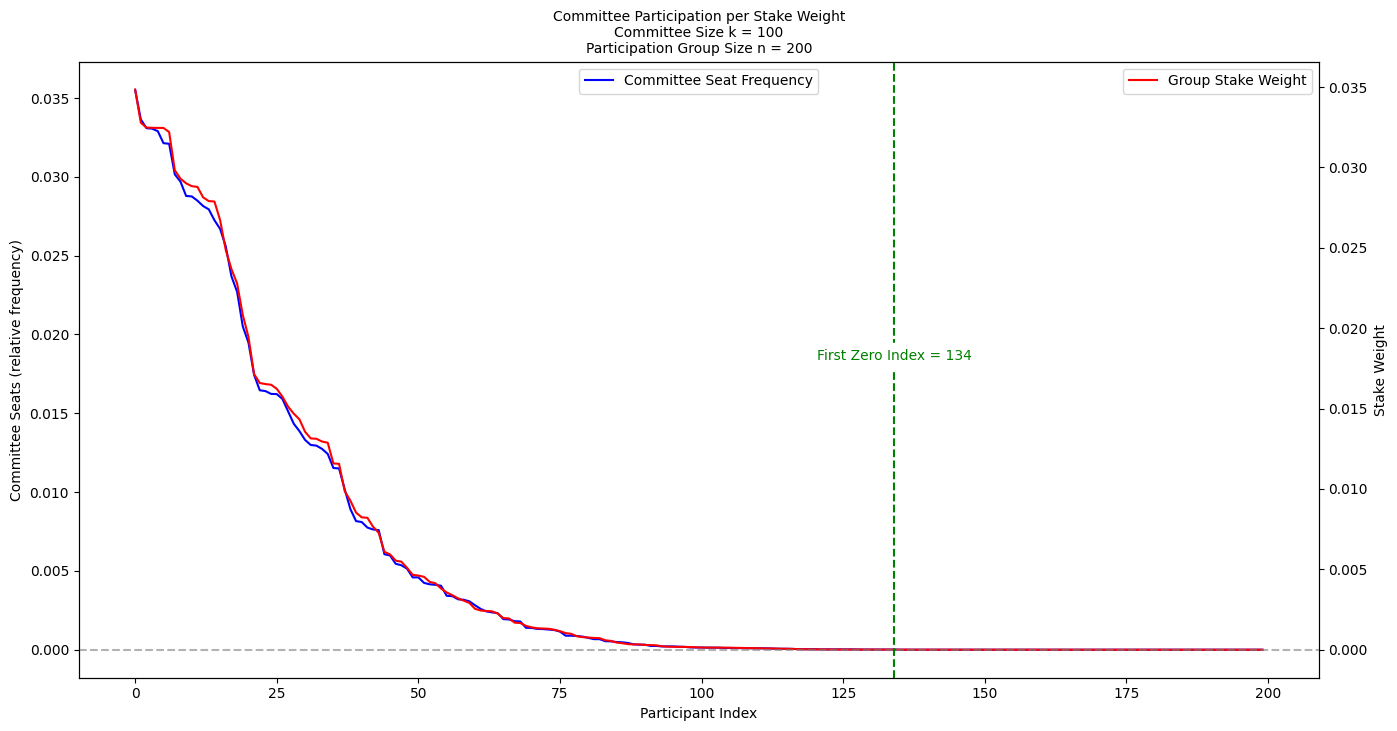

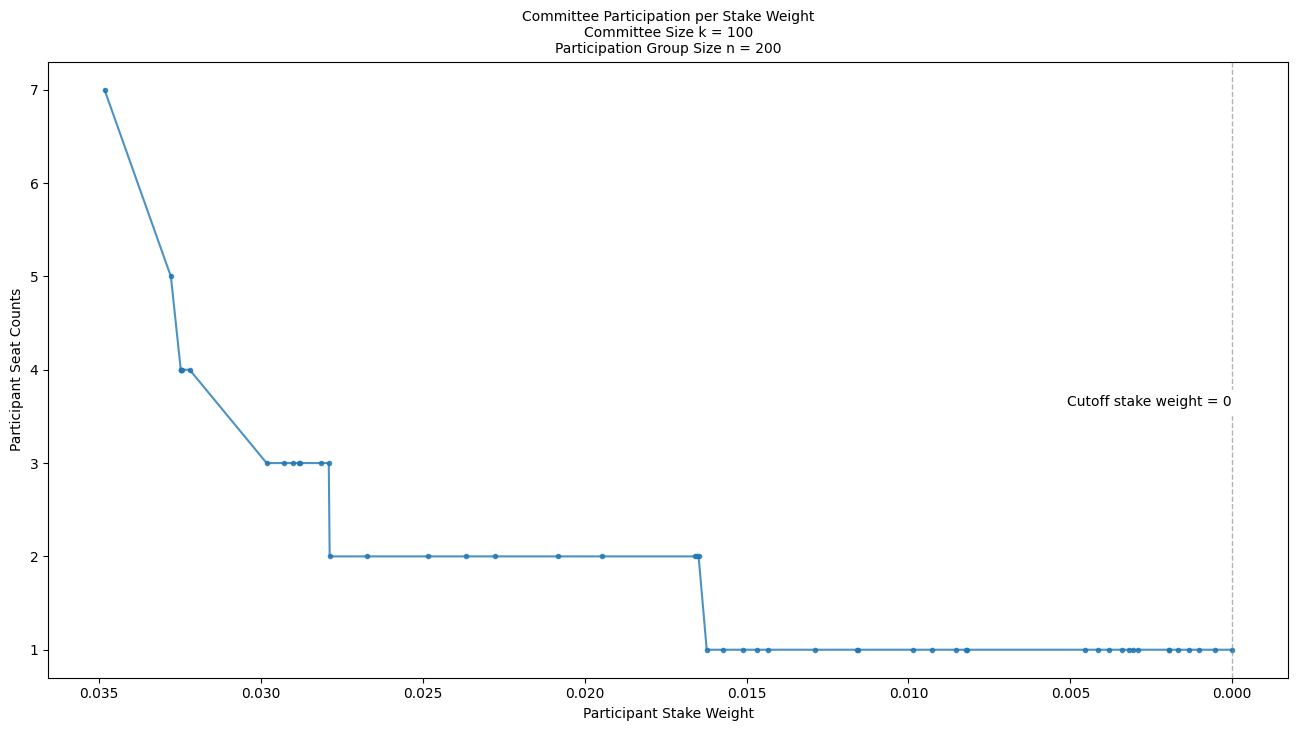

Group Size ...: 300 participants
Committee Size: 100 seats


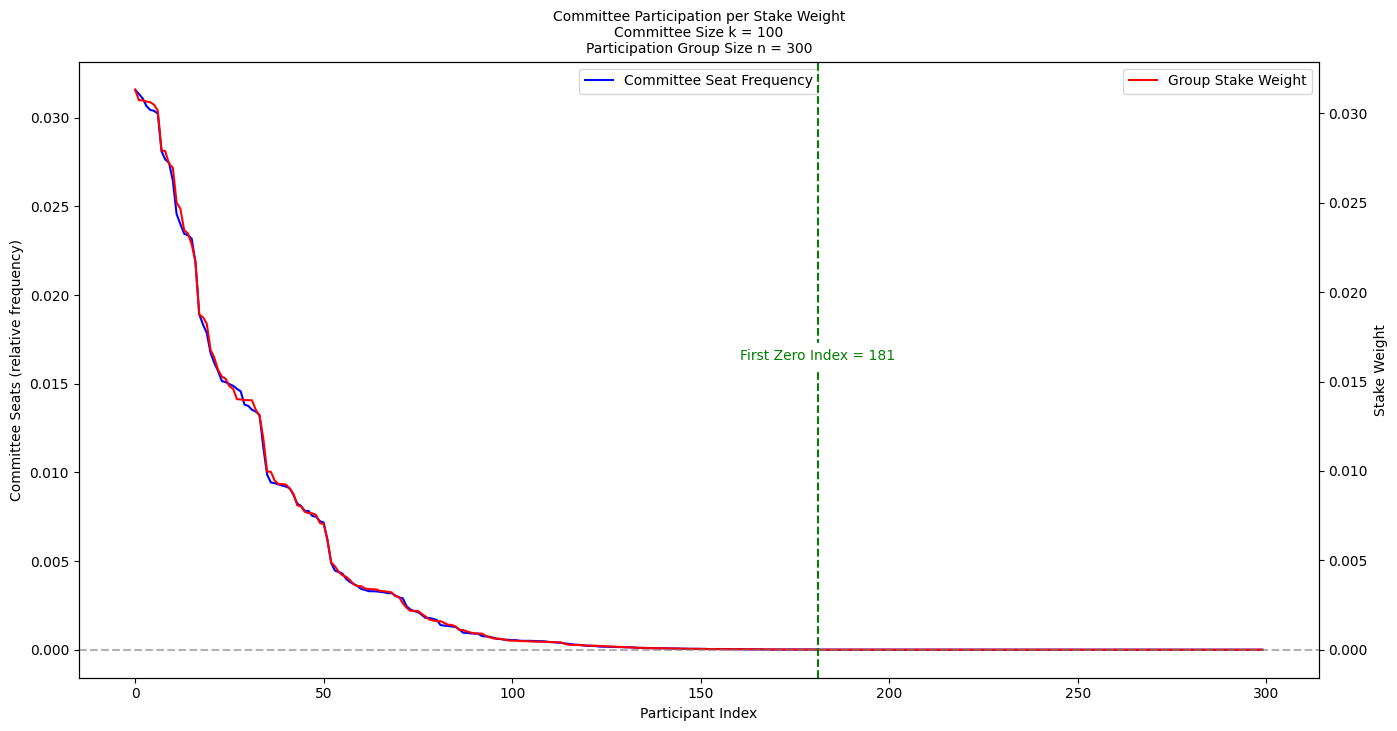

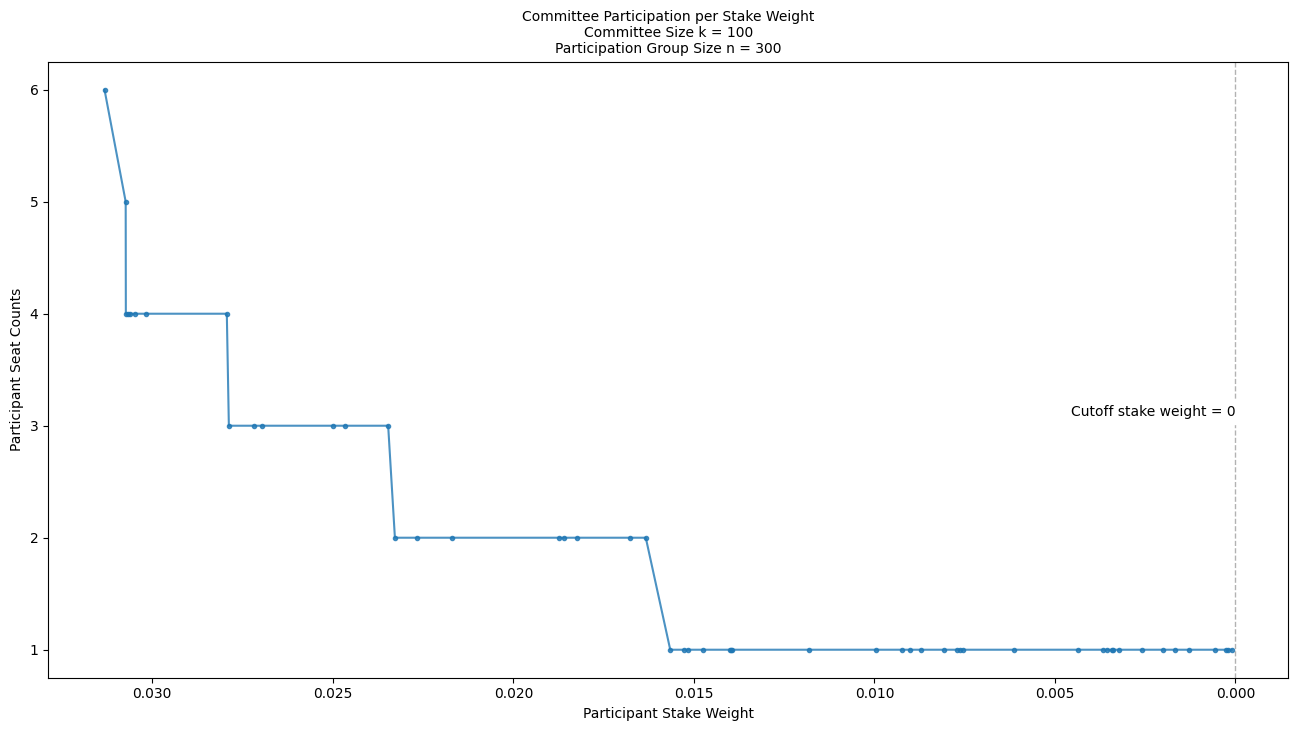

Group Size ...: 400 participants
Committee Size: 100 seats


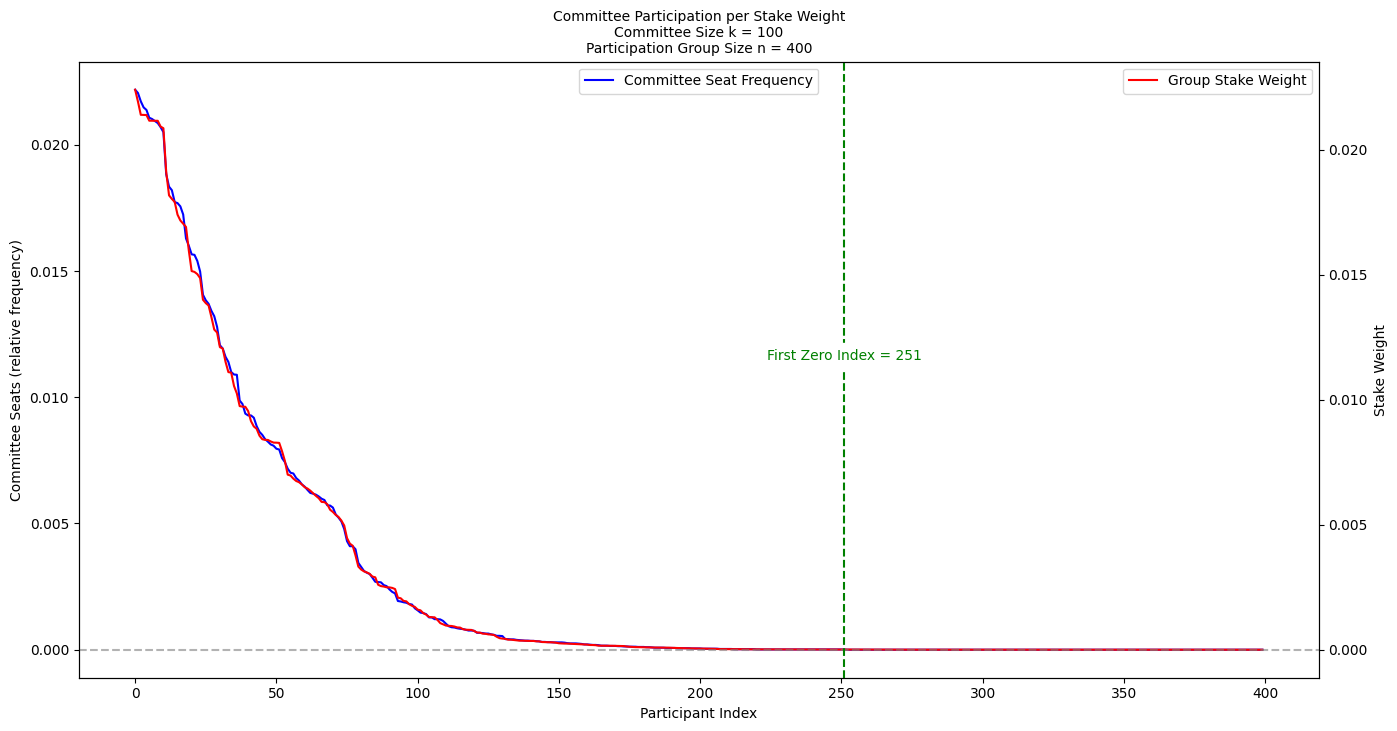

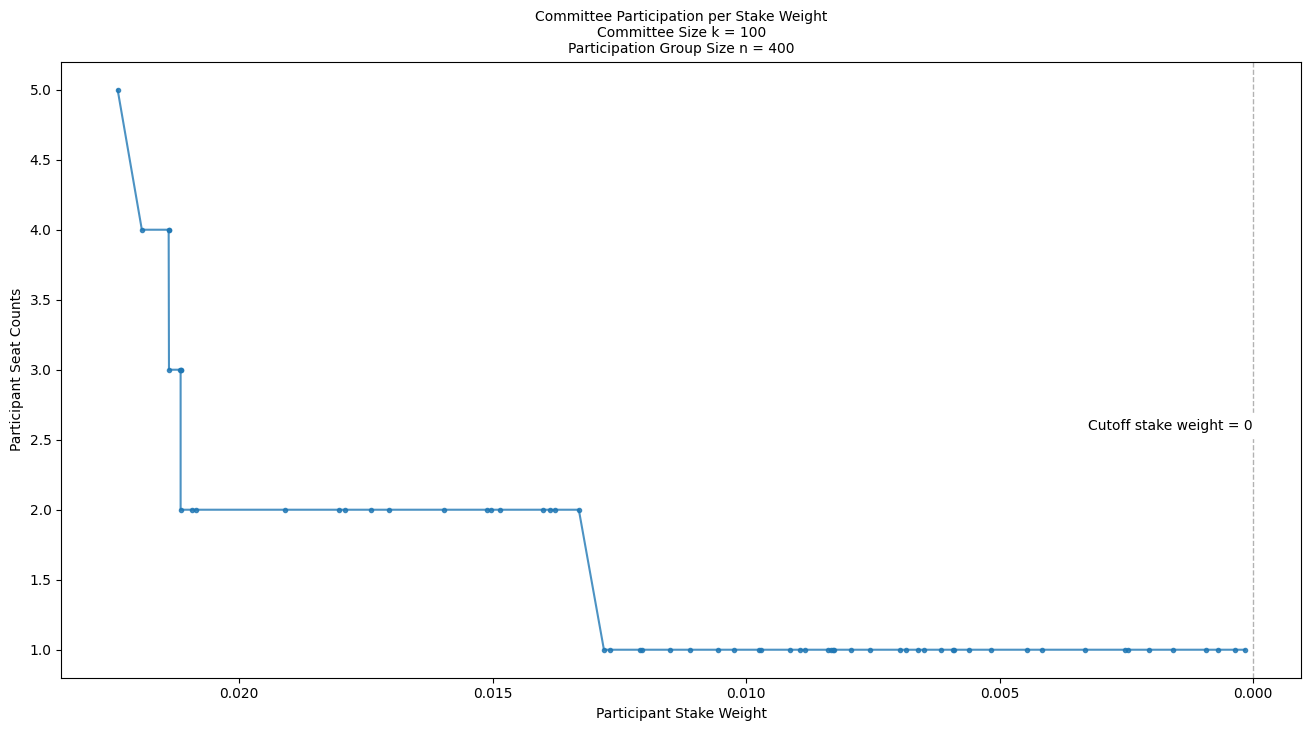

Group Size ...: 500 participants
Committee Size: 100 seats


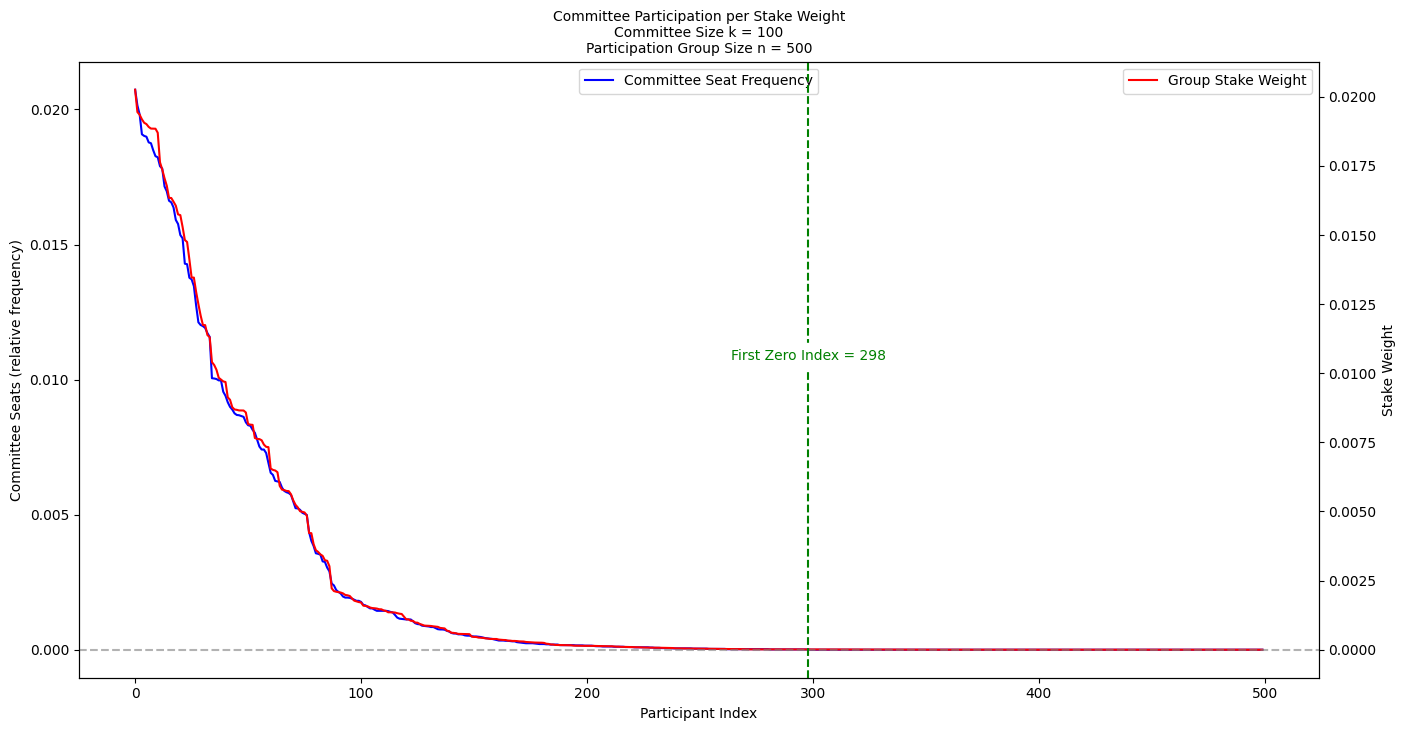

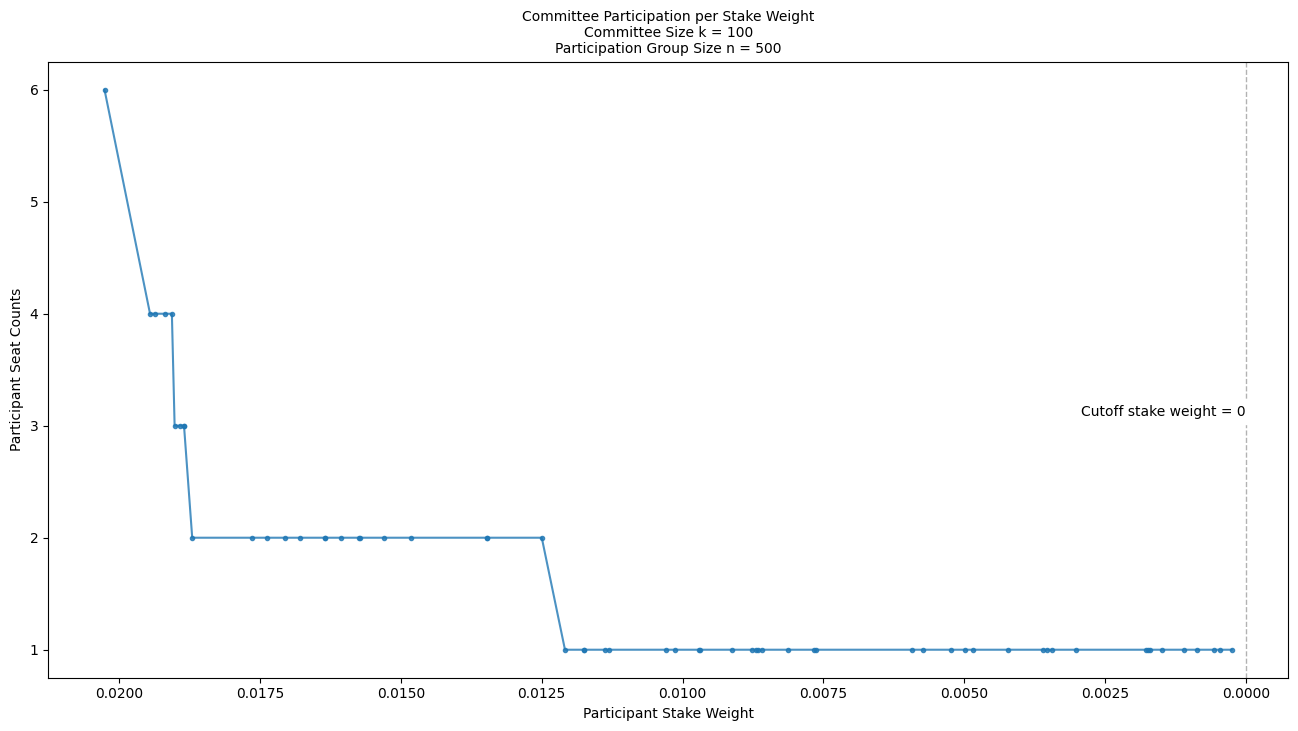

Group Size ...: 600 participants
Committee Size: 100 seats


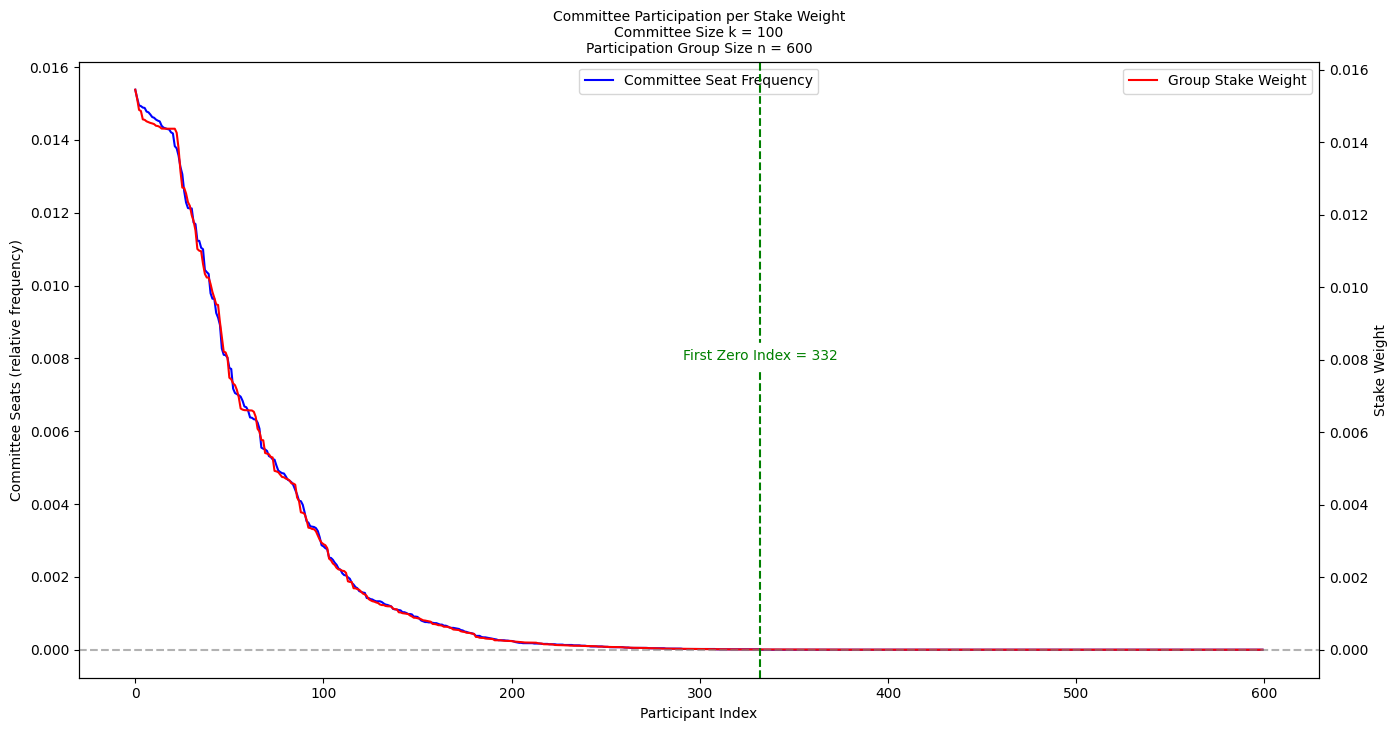

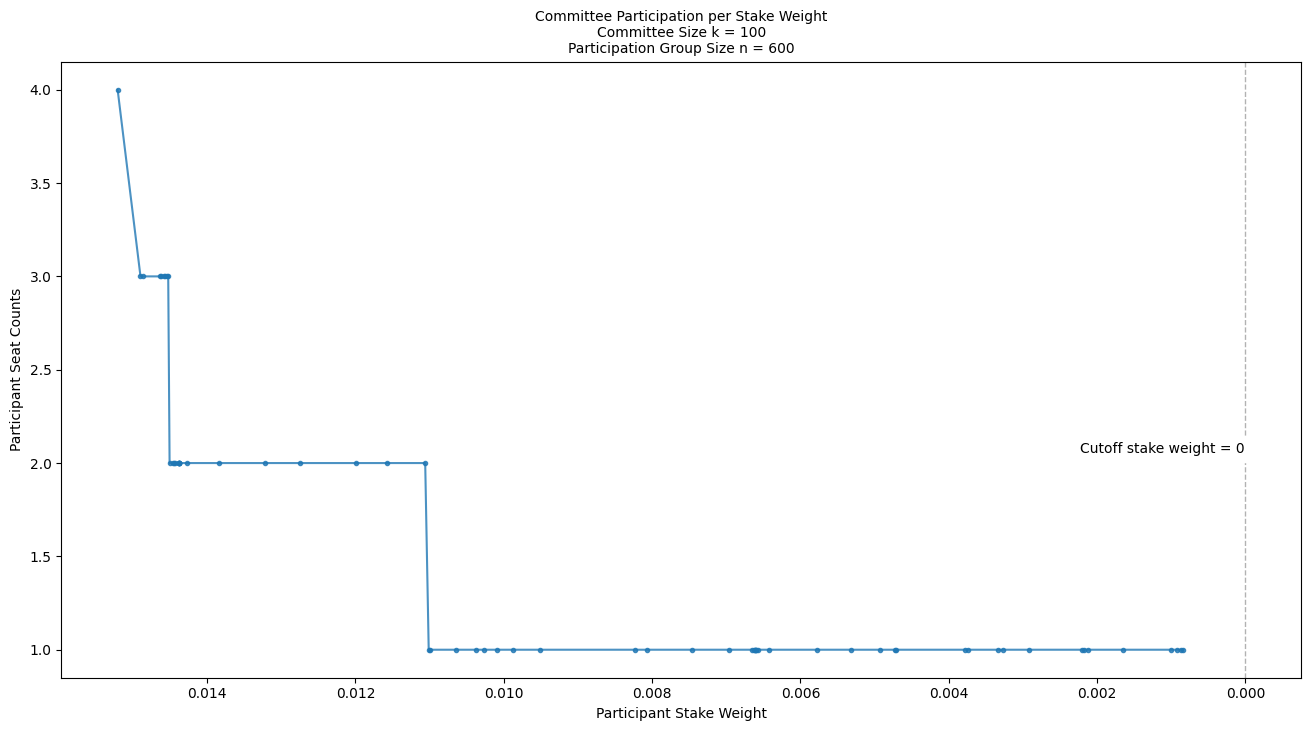

Group Size ...: 700 participants
Committee Size: 100 seats


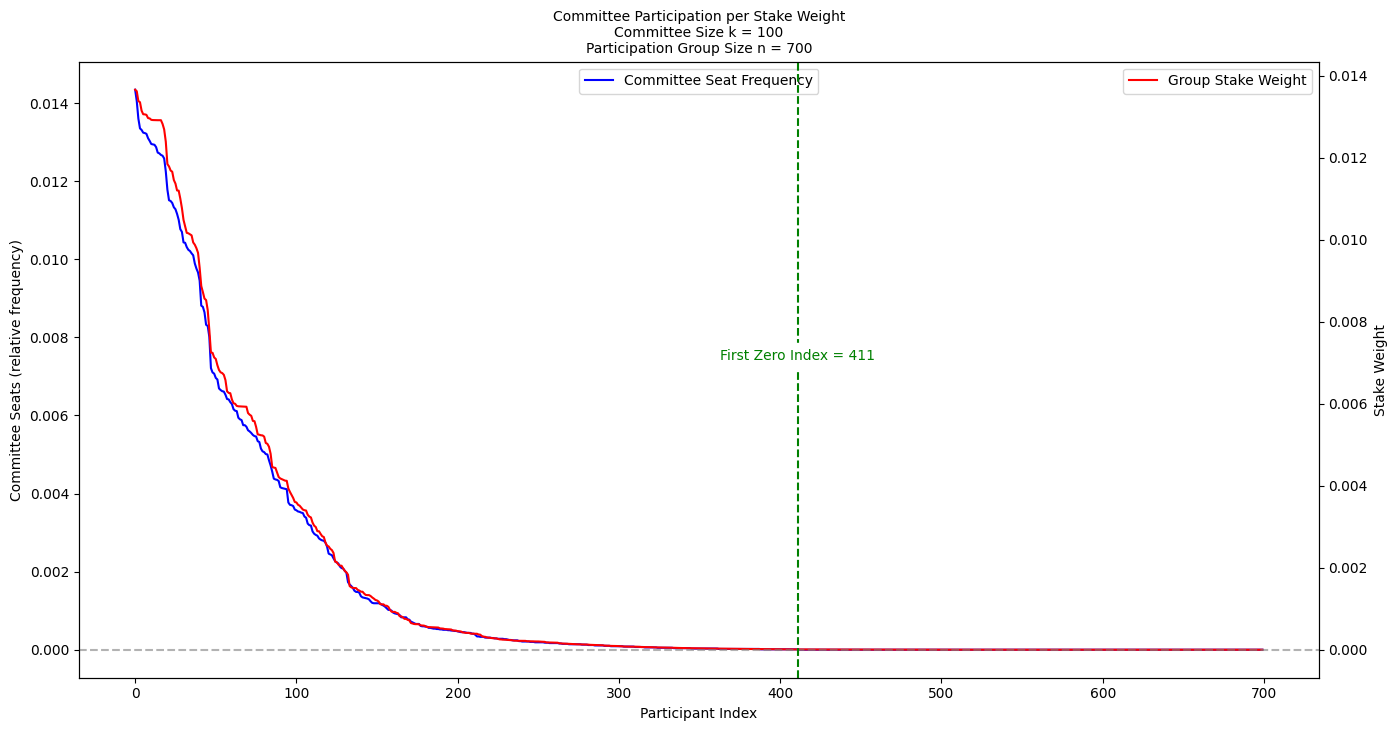

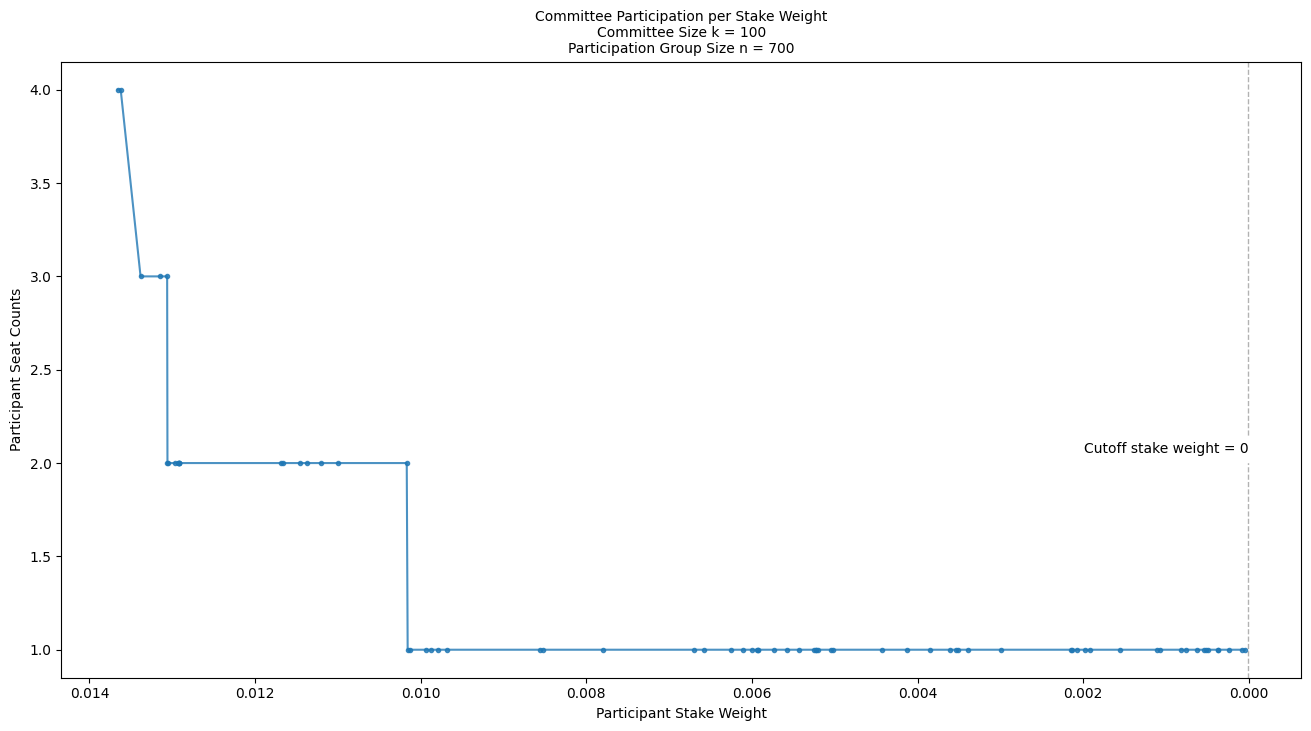

Group Size ...: 800 participants
Committee Size: 100 seats


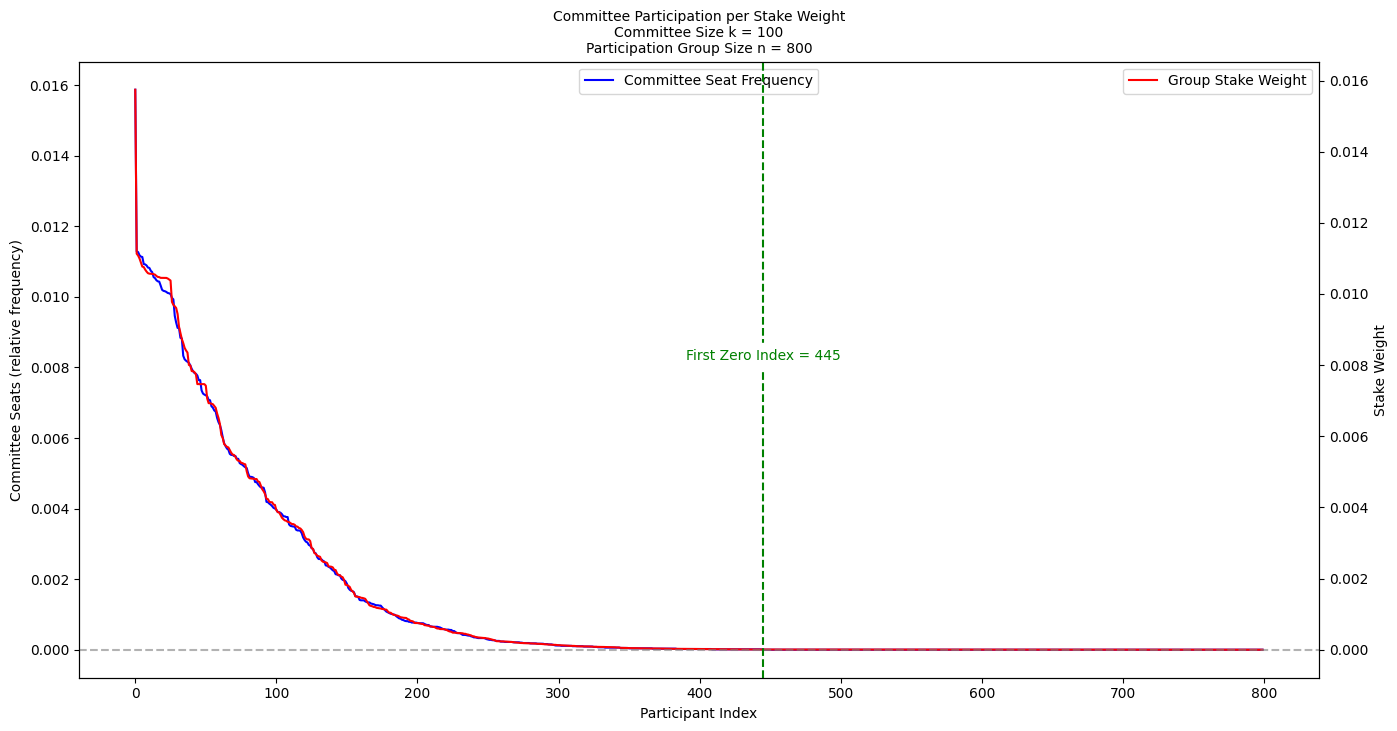

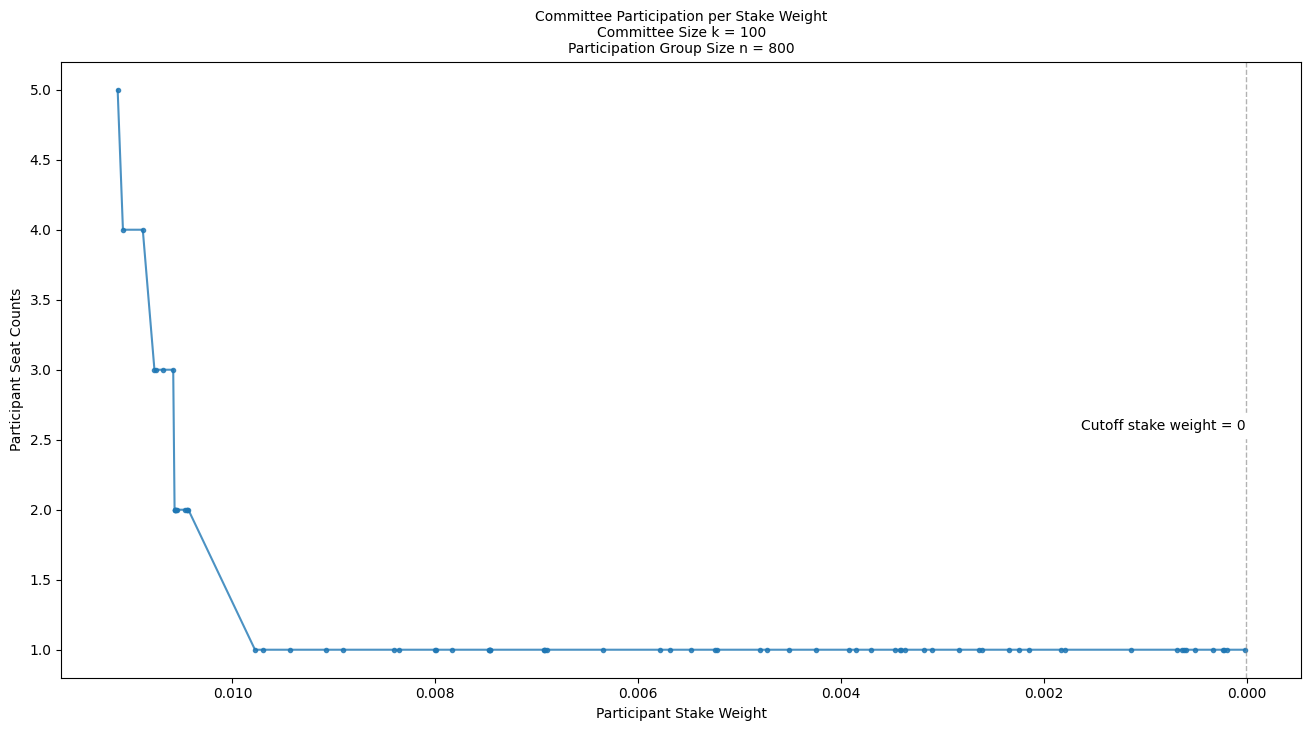

Group Size ...: 100 participants
Committee Size: 200 seats


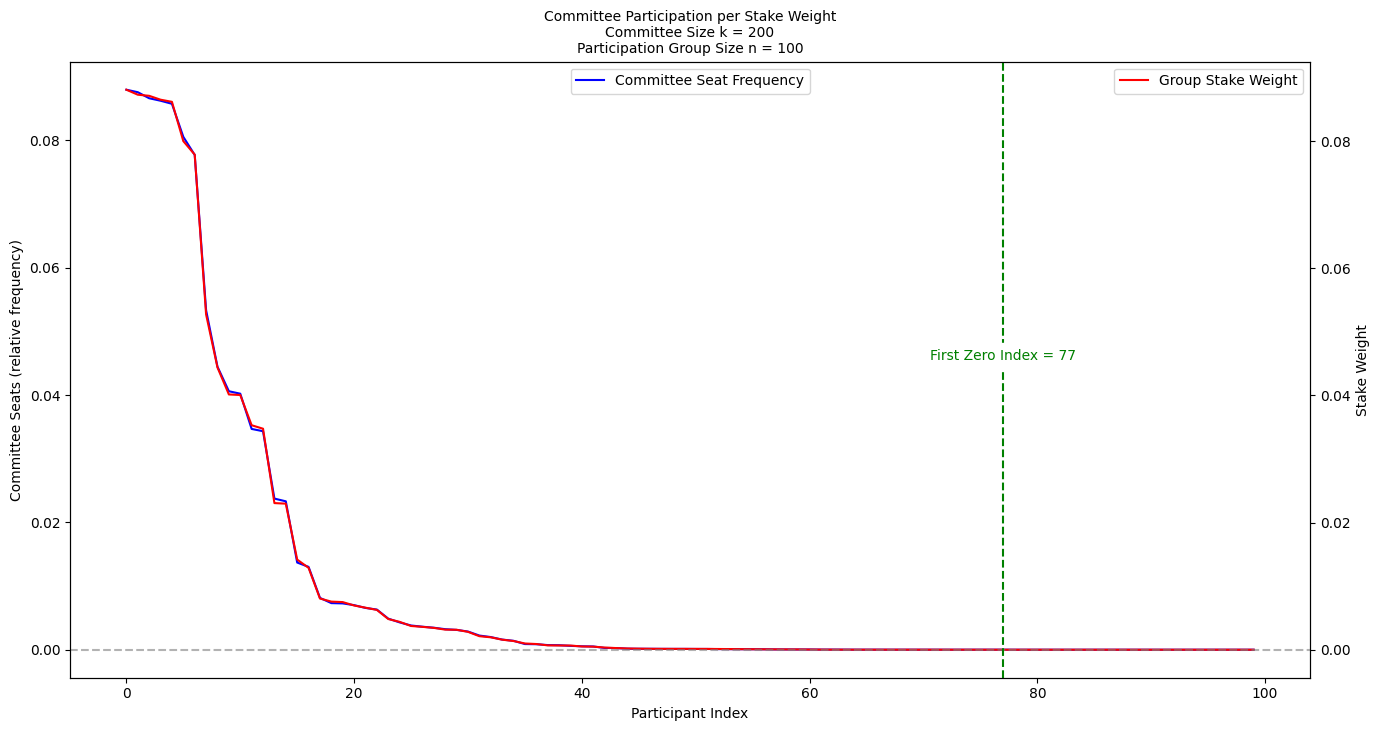

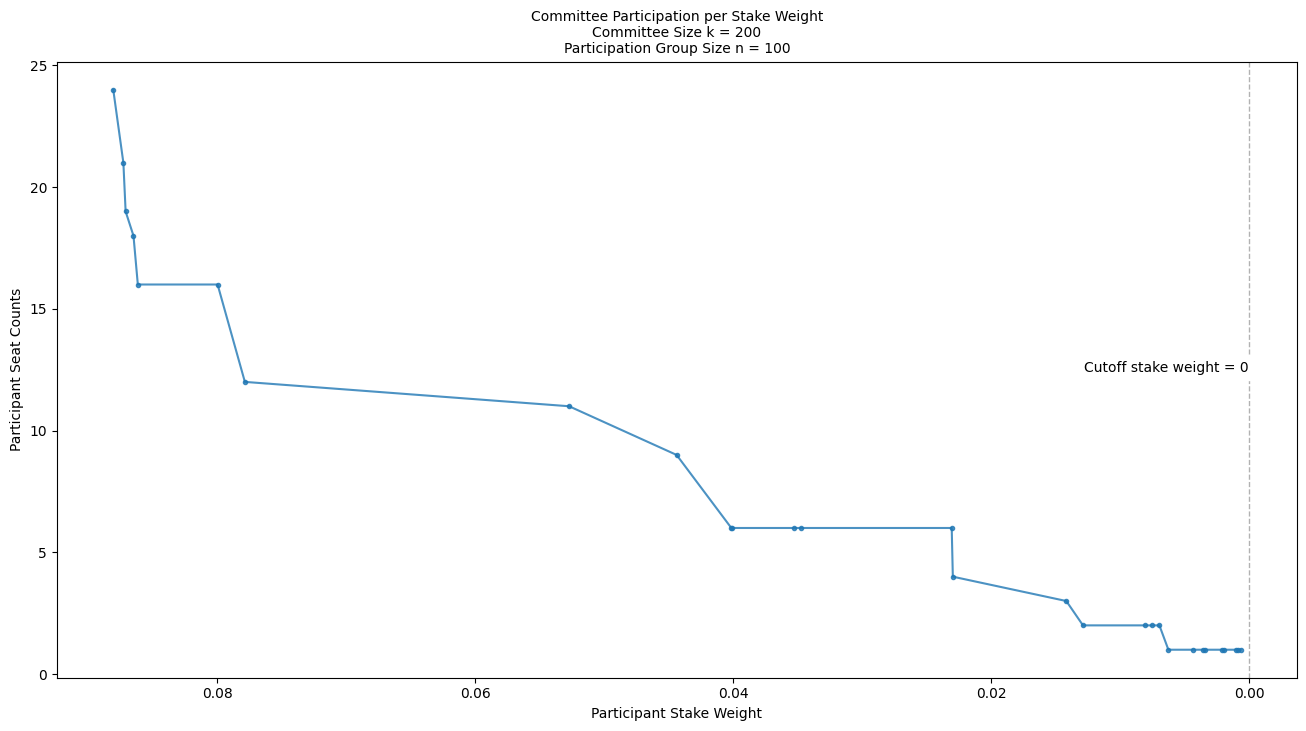

Group Size ...: 200 participants
Committee Size: 200 seats


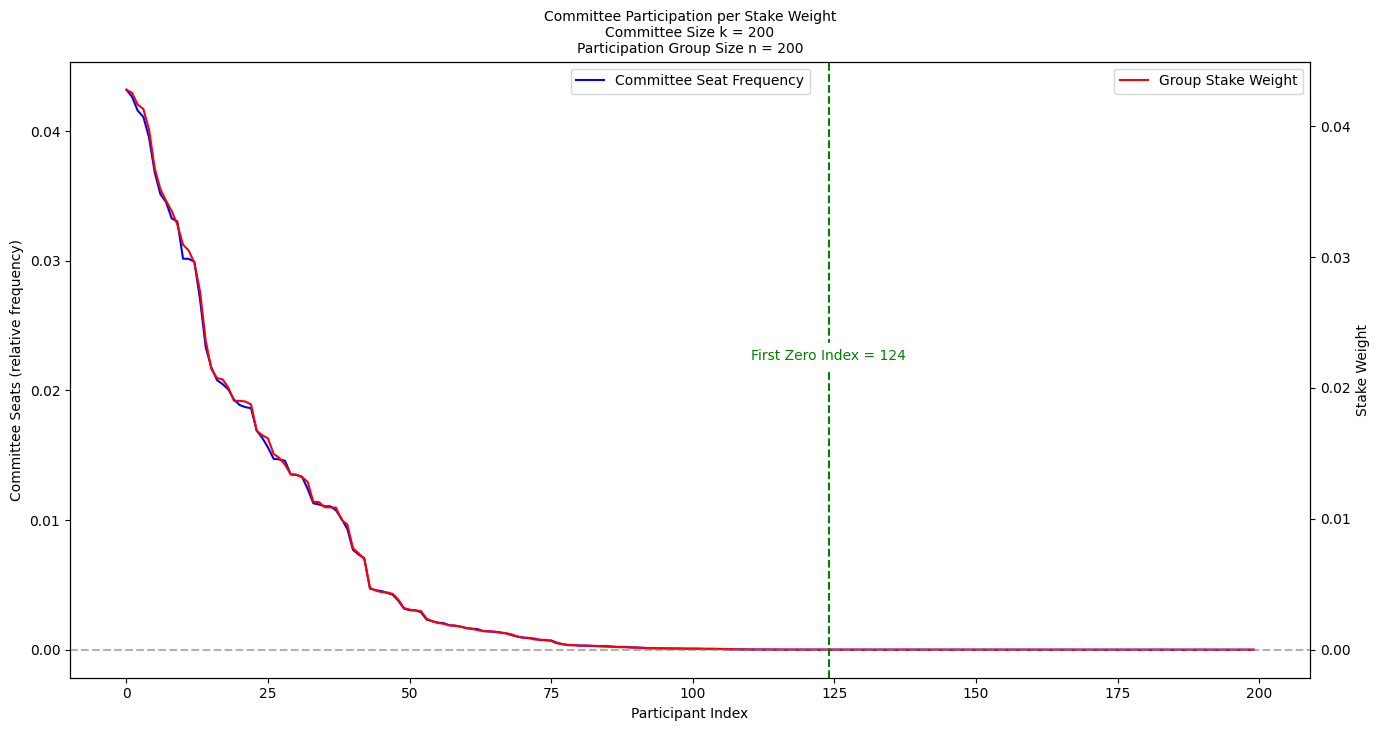

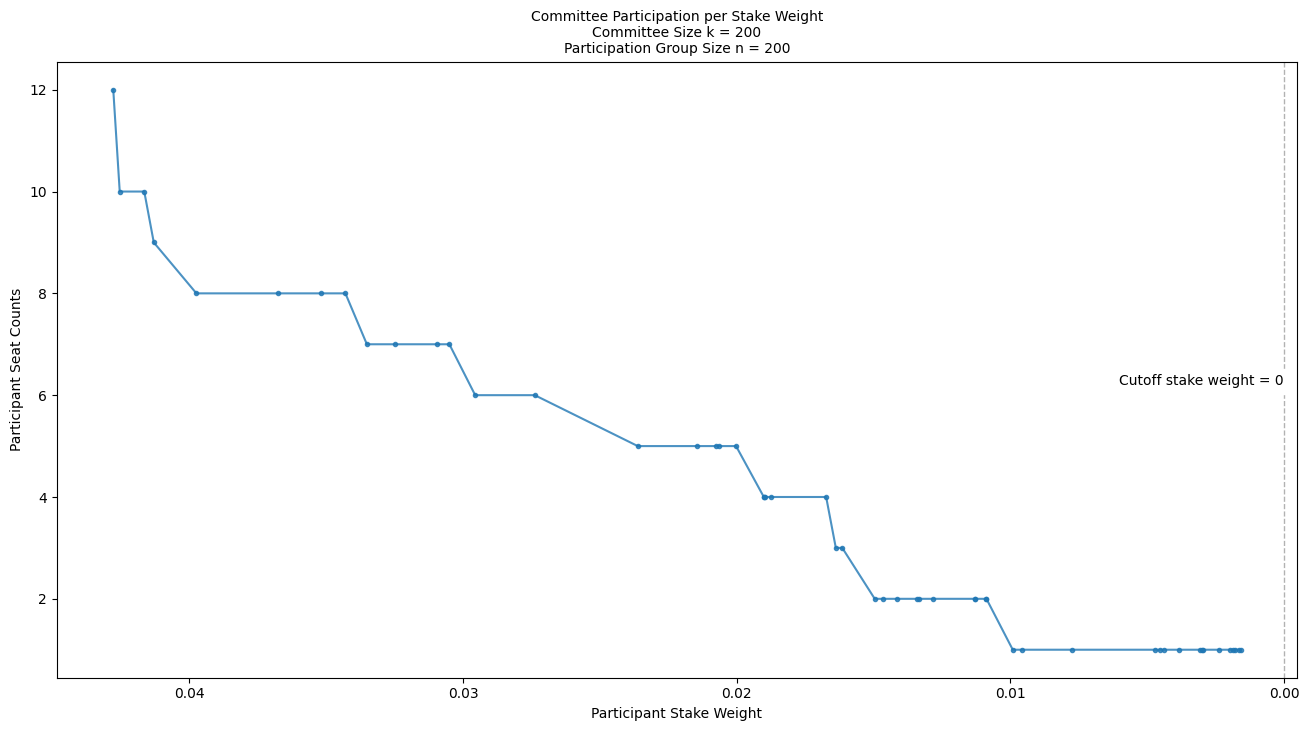

Group Size ...: 300 participants
Committee Size: 200 seats


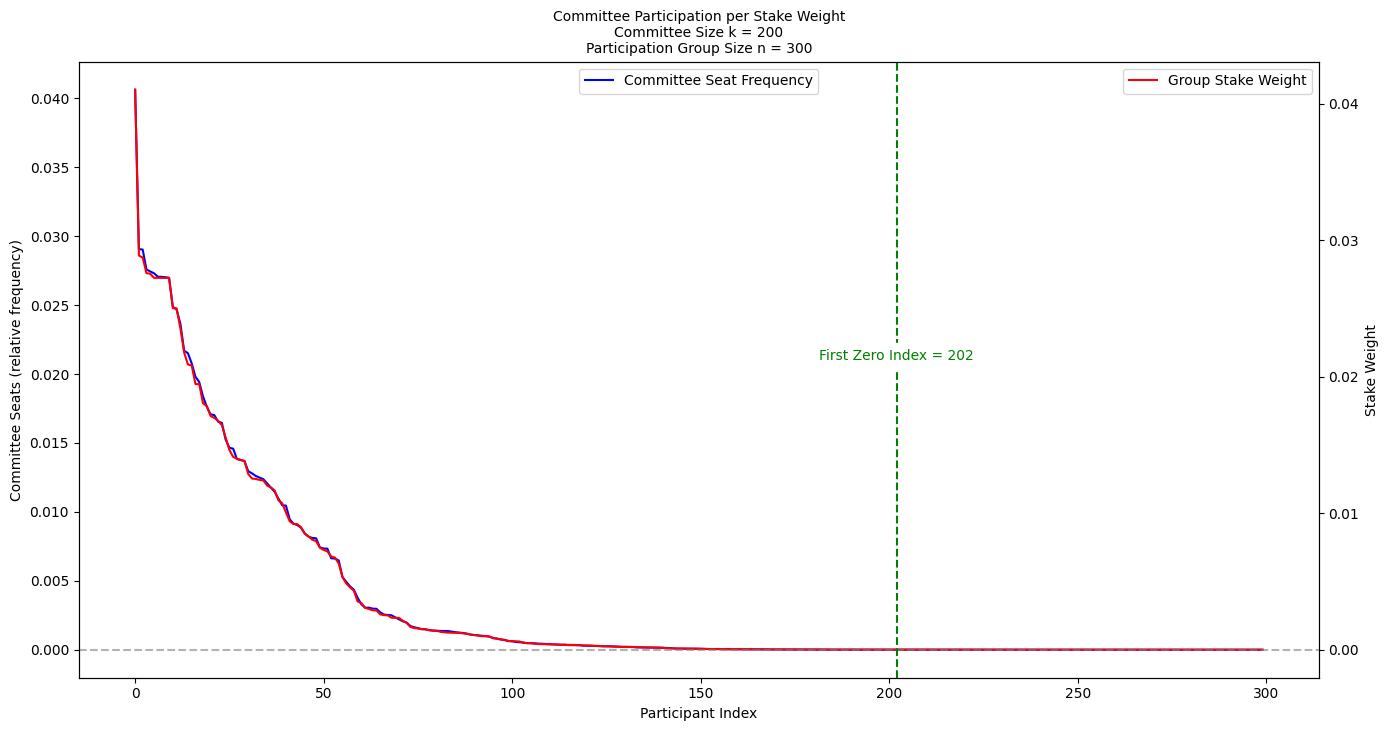

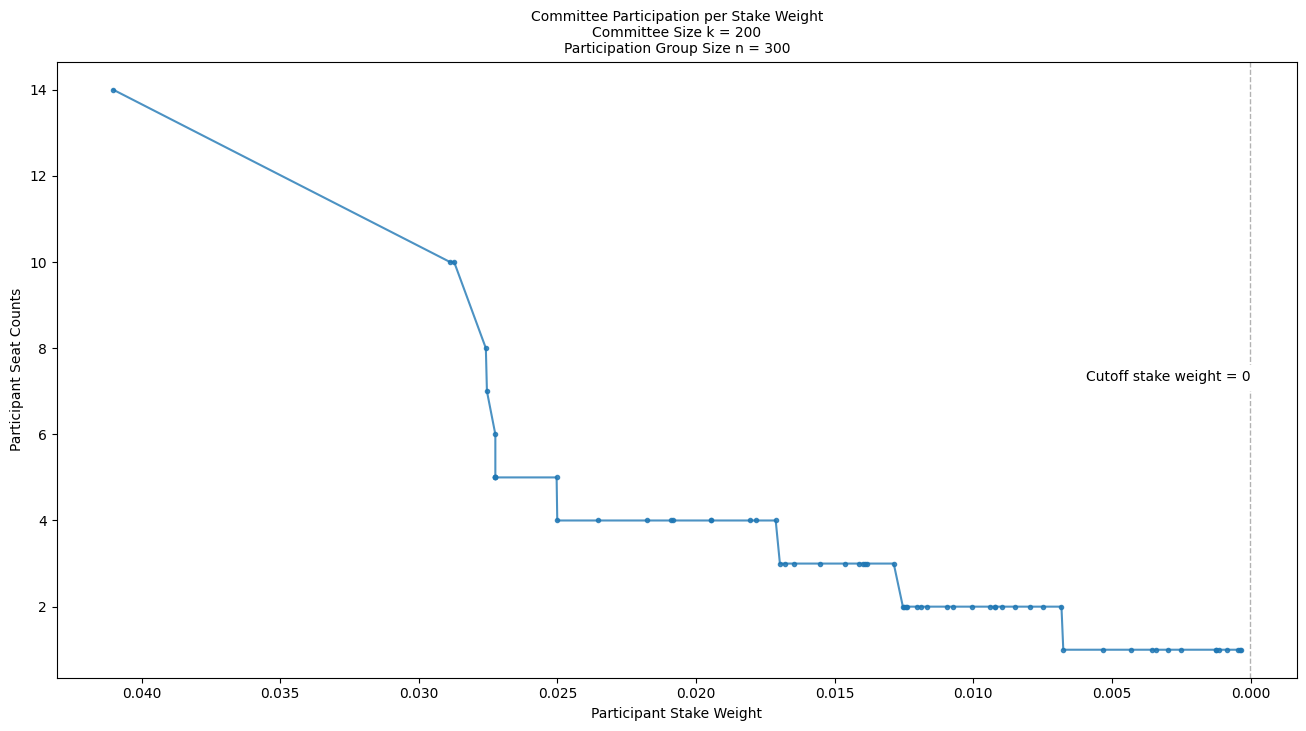

Group Size ...: 400 participants
Committee Size: 200 seats


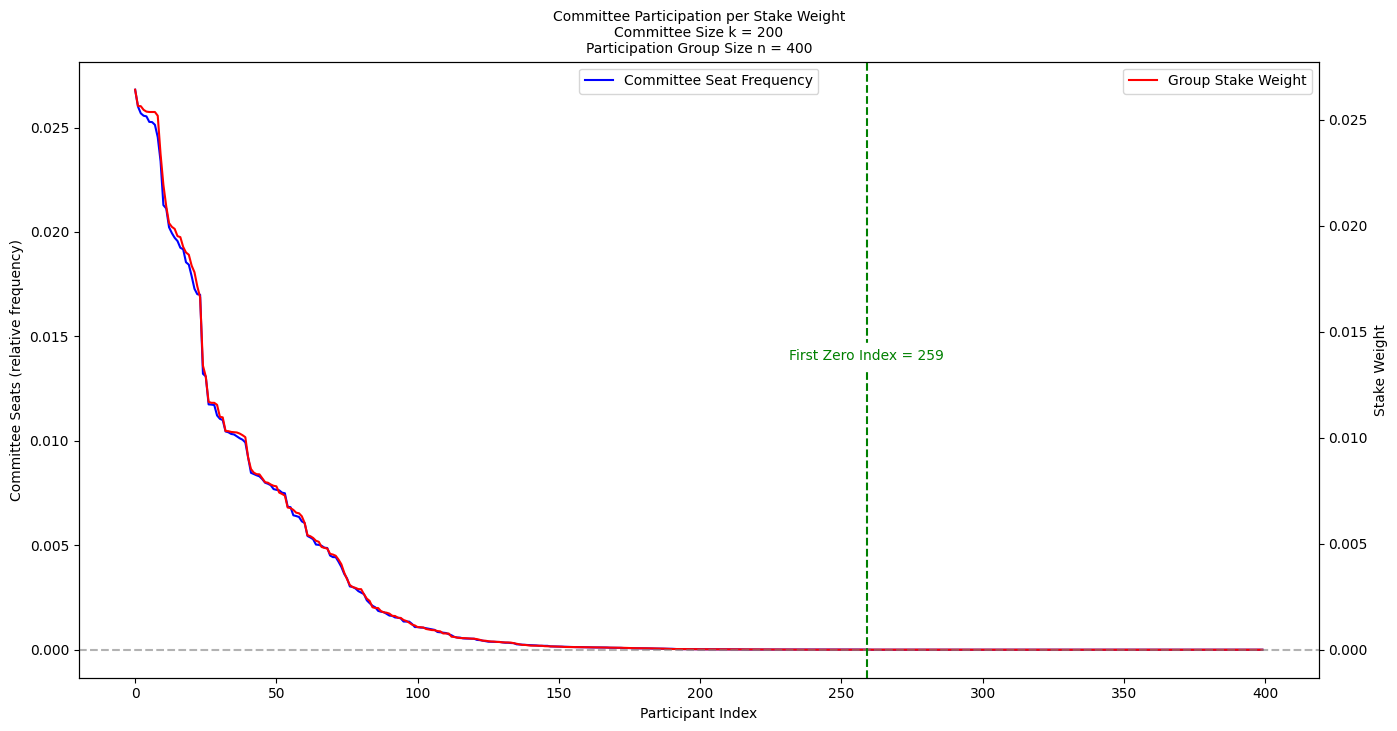

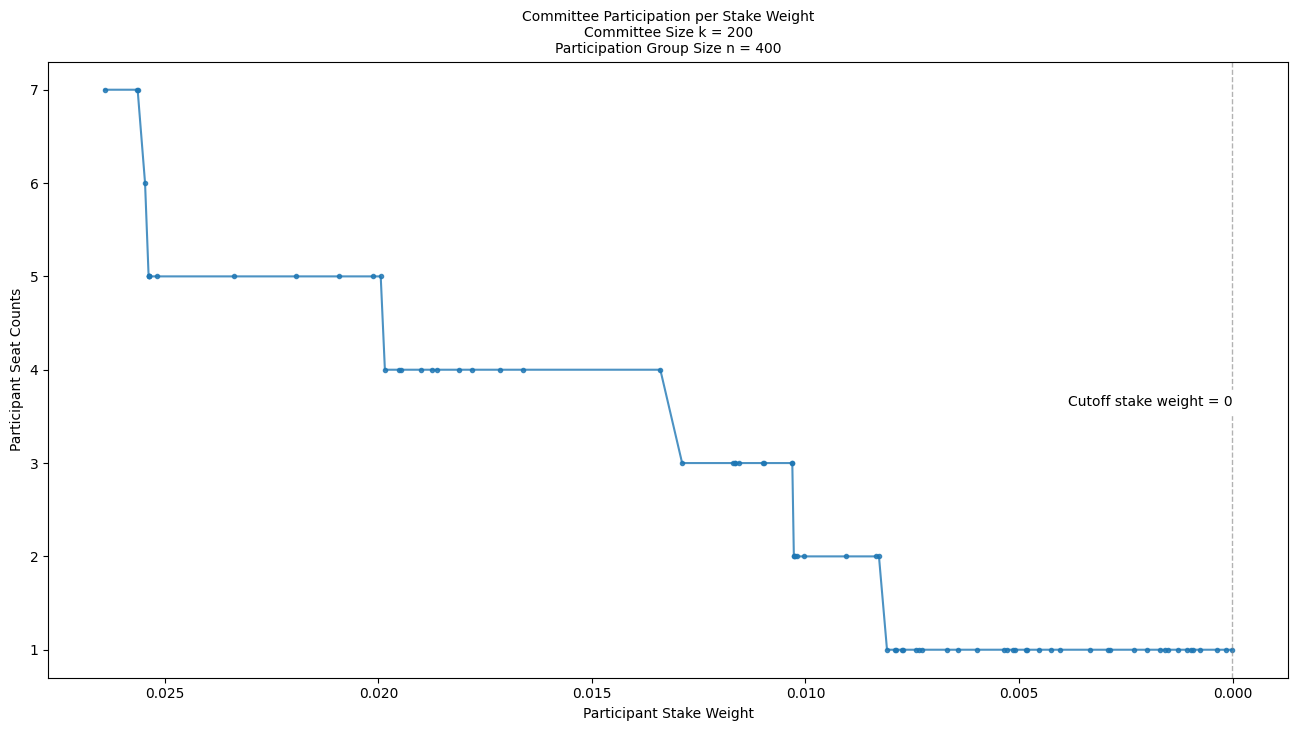

Group Size ...: 500 participants
Committee Size: 200 seats


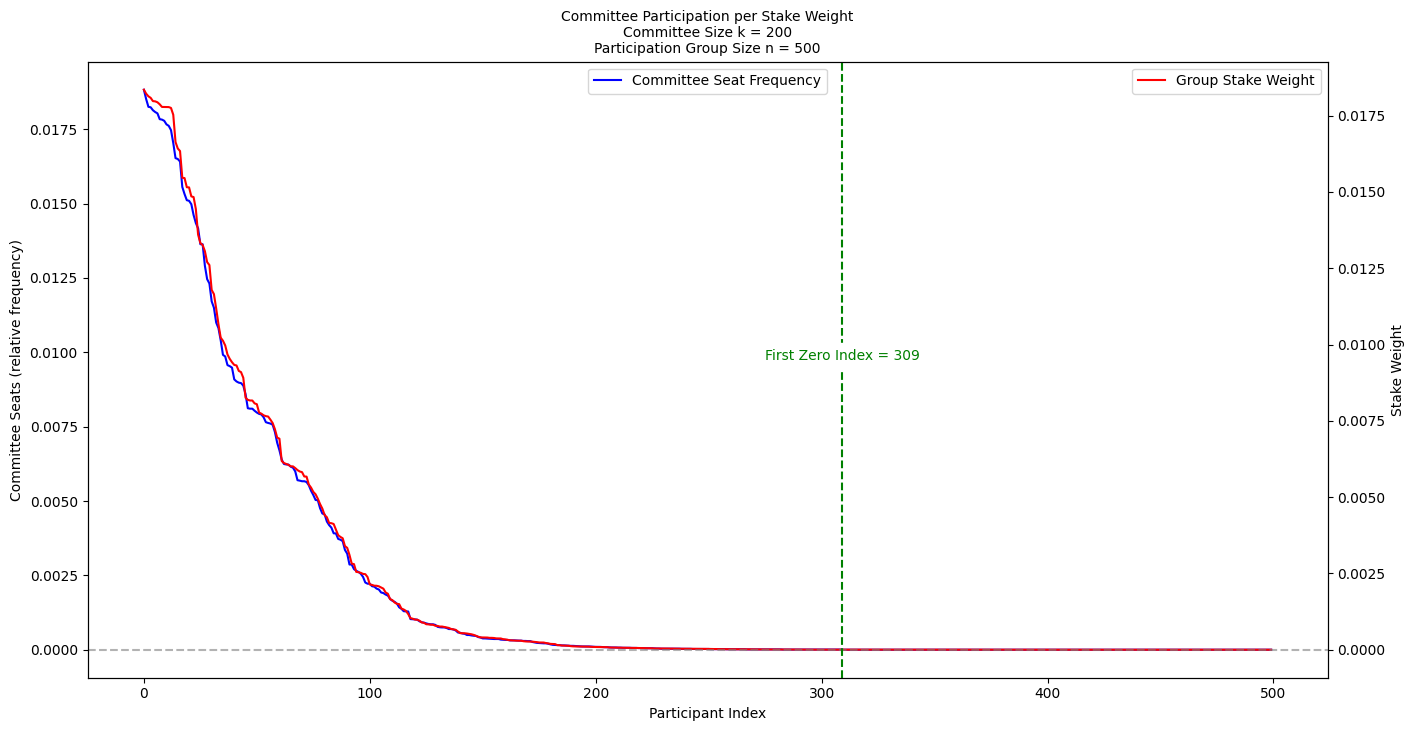

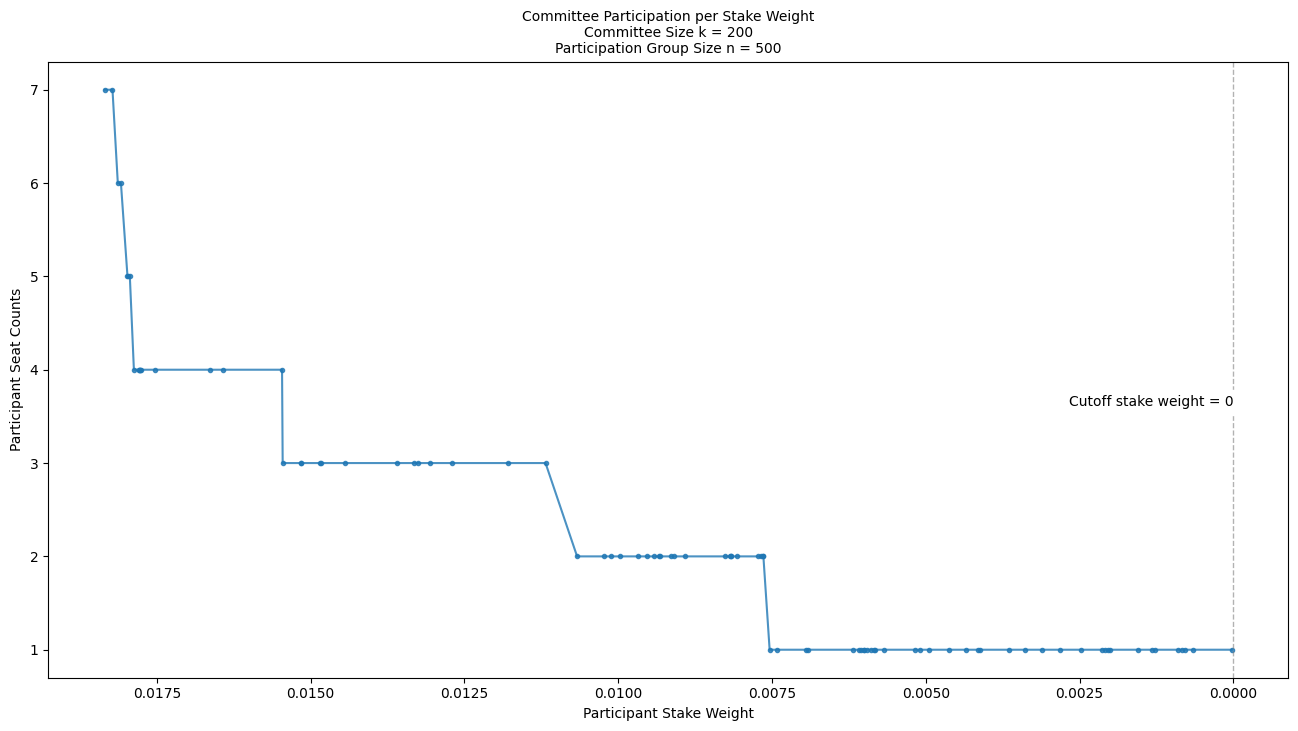

Group Size ...: 600 participants
Committee Size: 200 seats


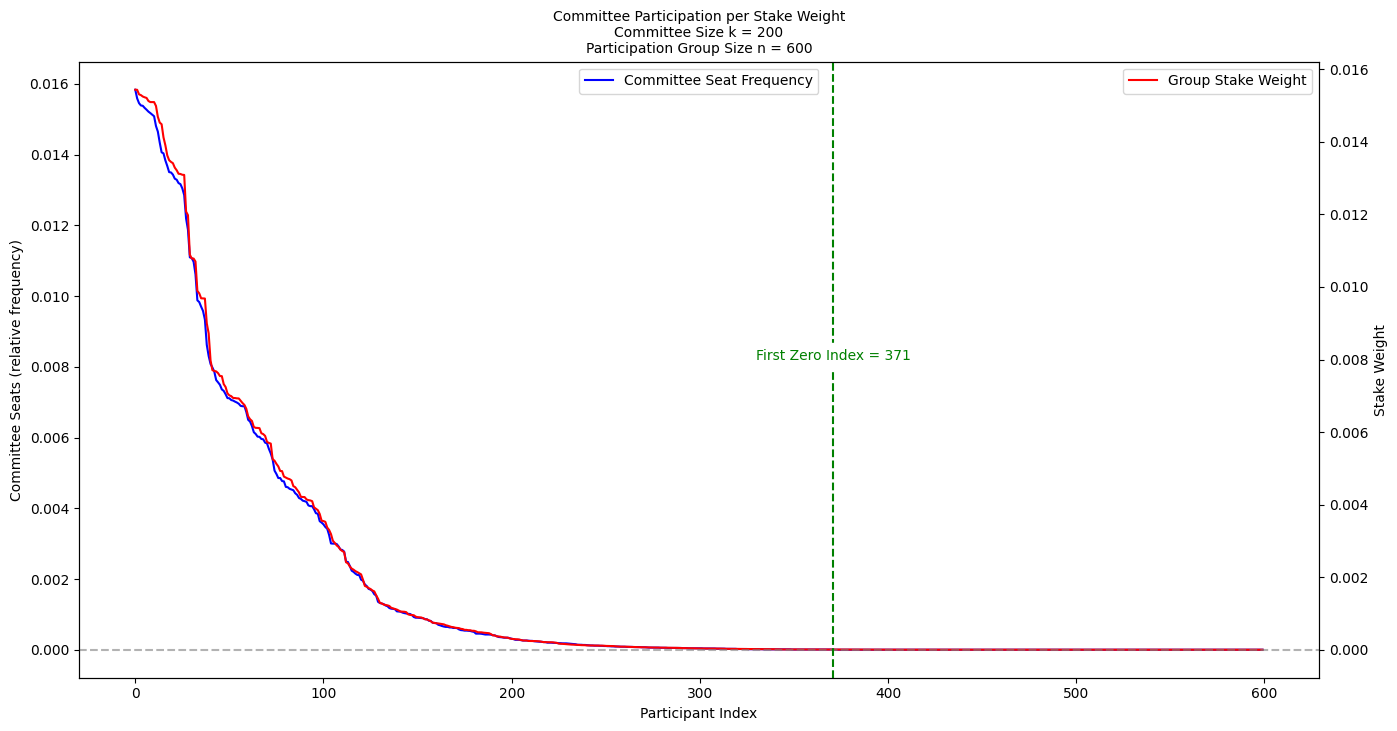

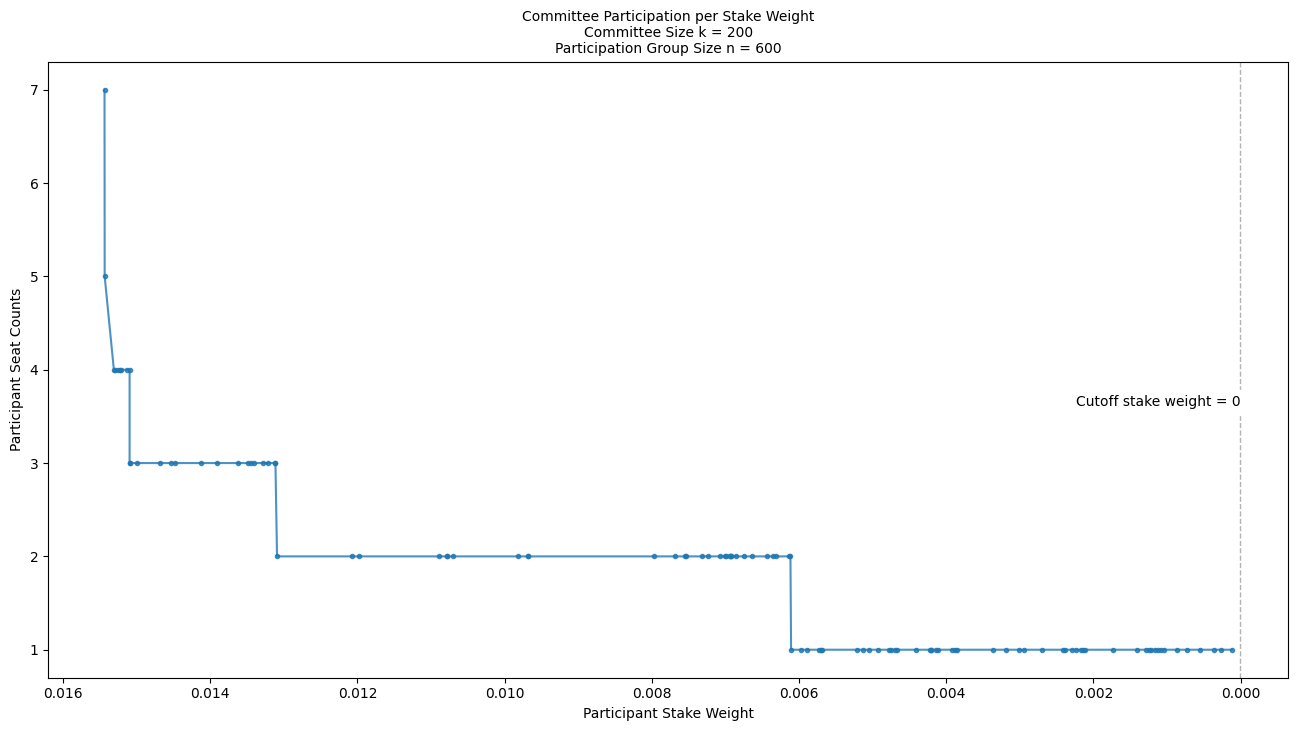

Group Size ...: 700 participants
Committee Size: 200 seats


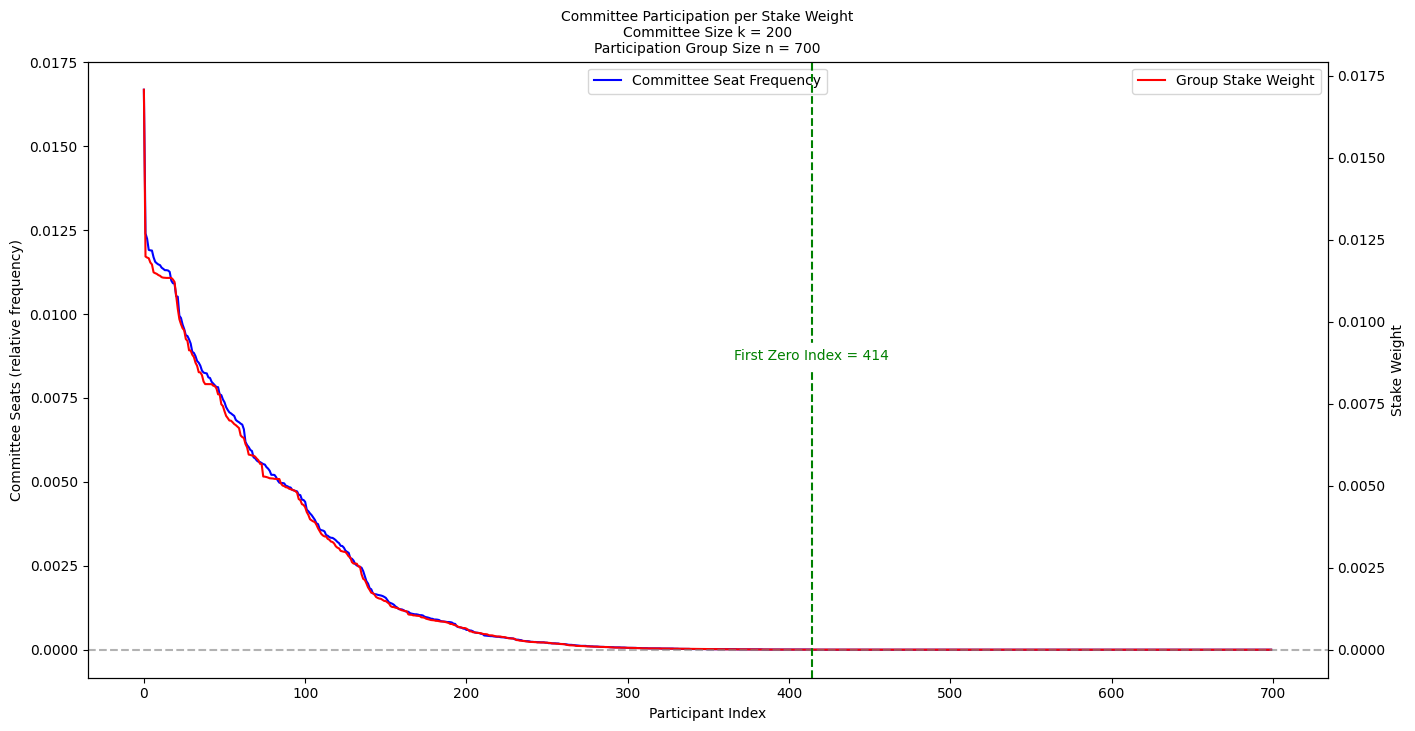

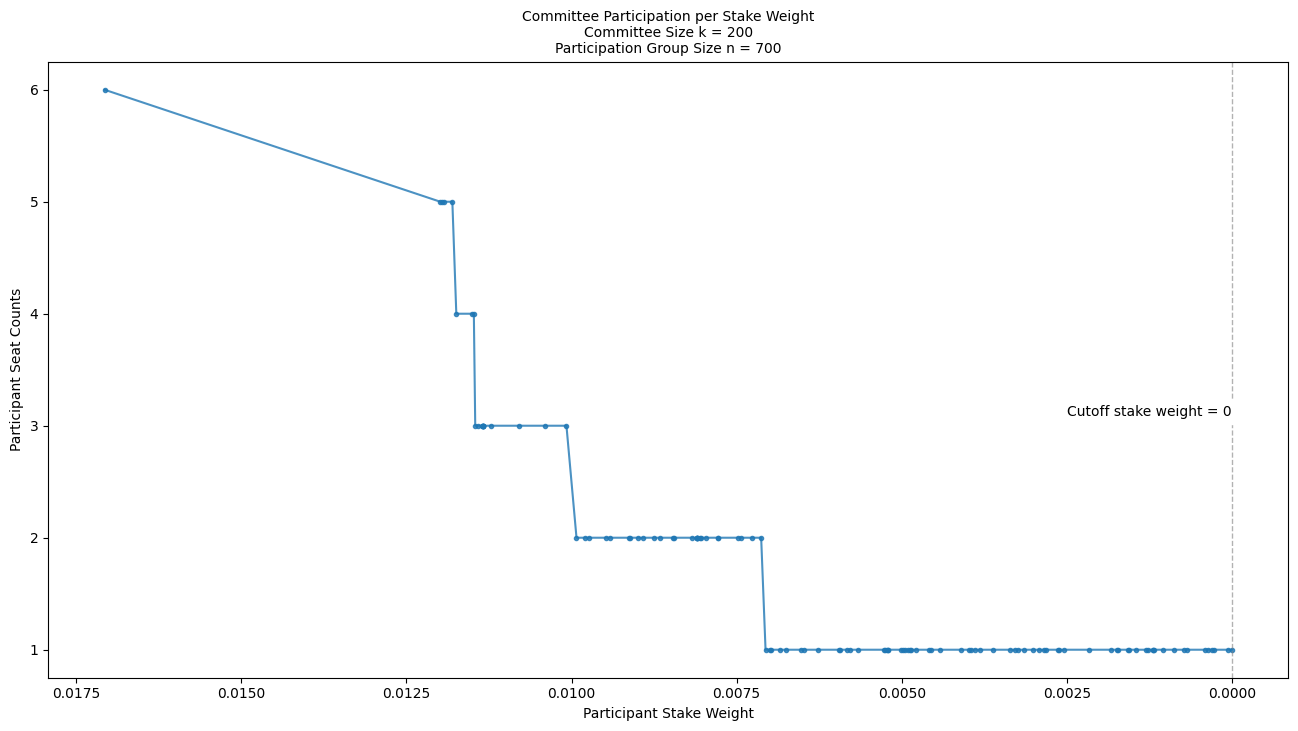

Group Size ...: 800 participants
Committee Size: 200 seats


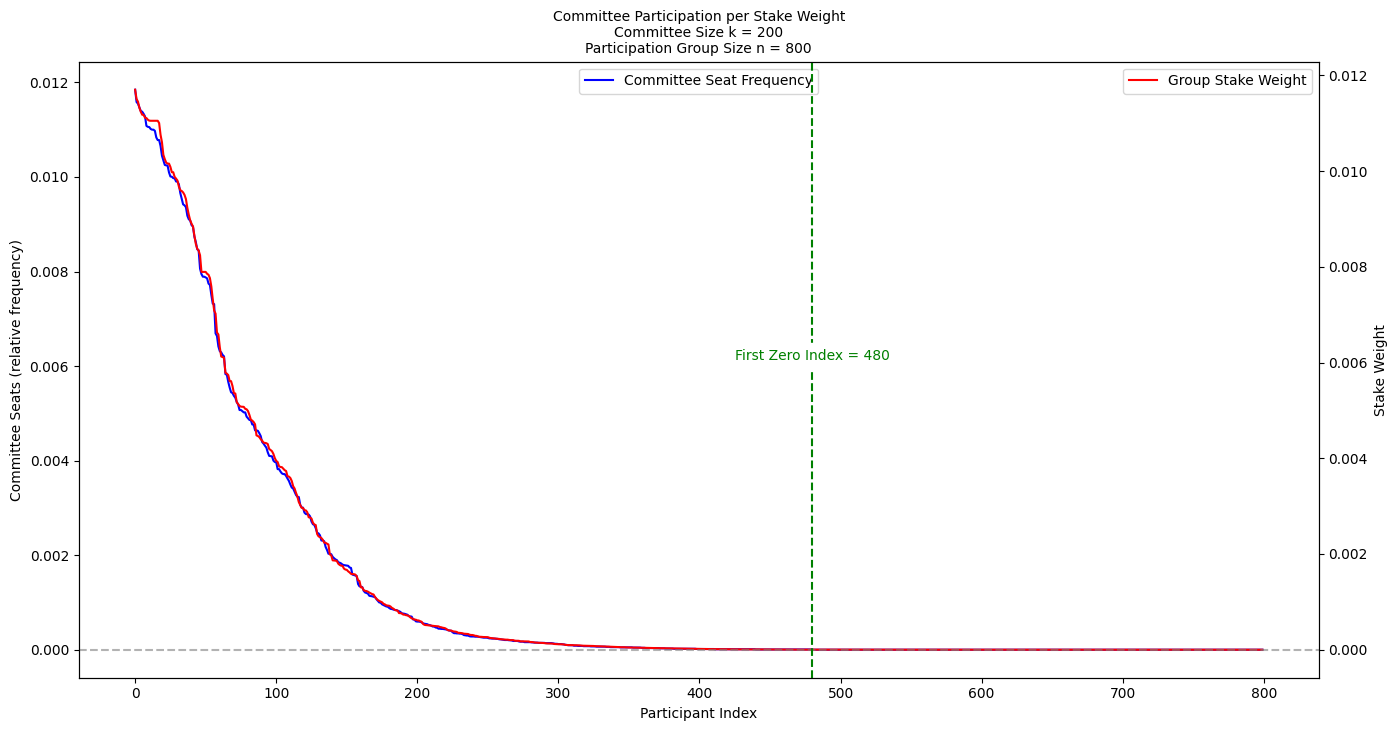

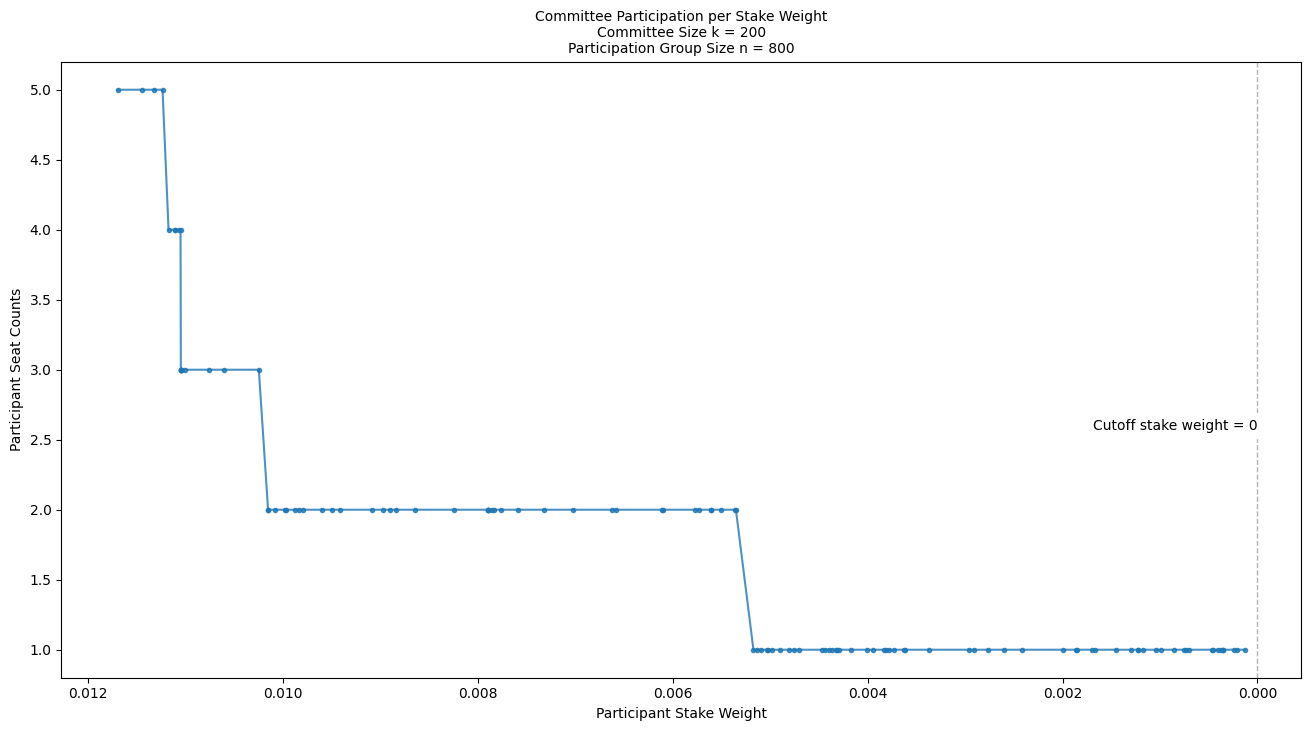

Group Size ...: 100 participants
Committee Size: 300 seats


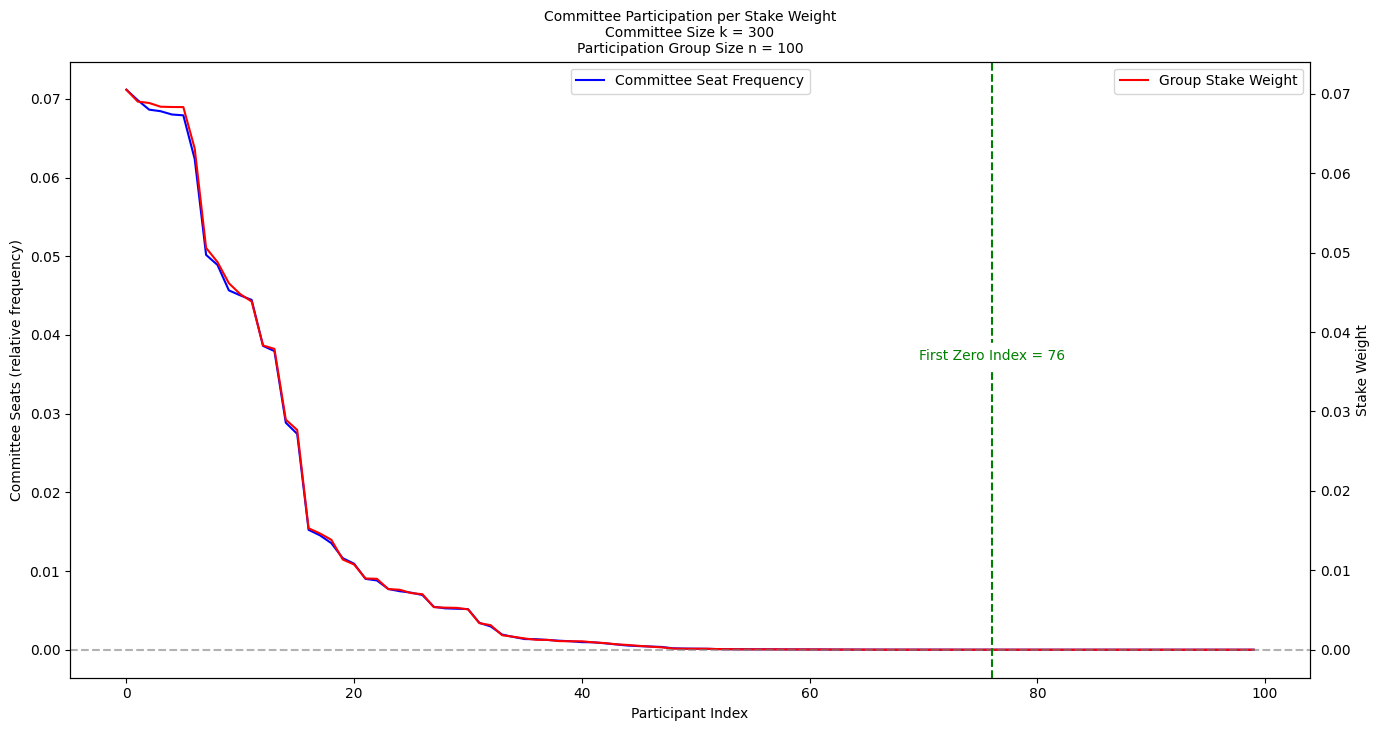

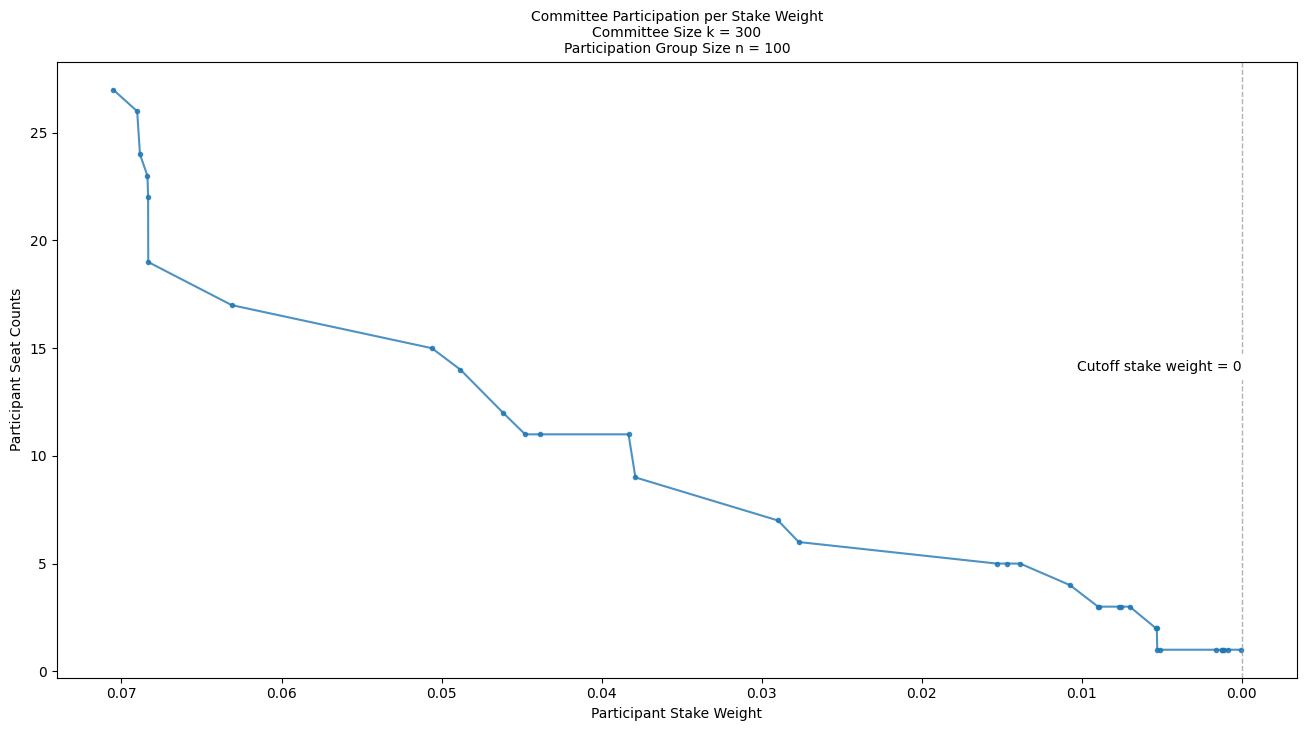

Group Size ...: 200 participants
Committee Size: 300 seats


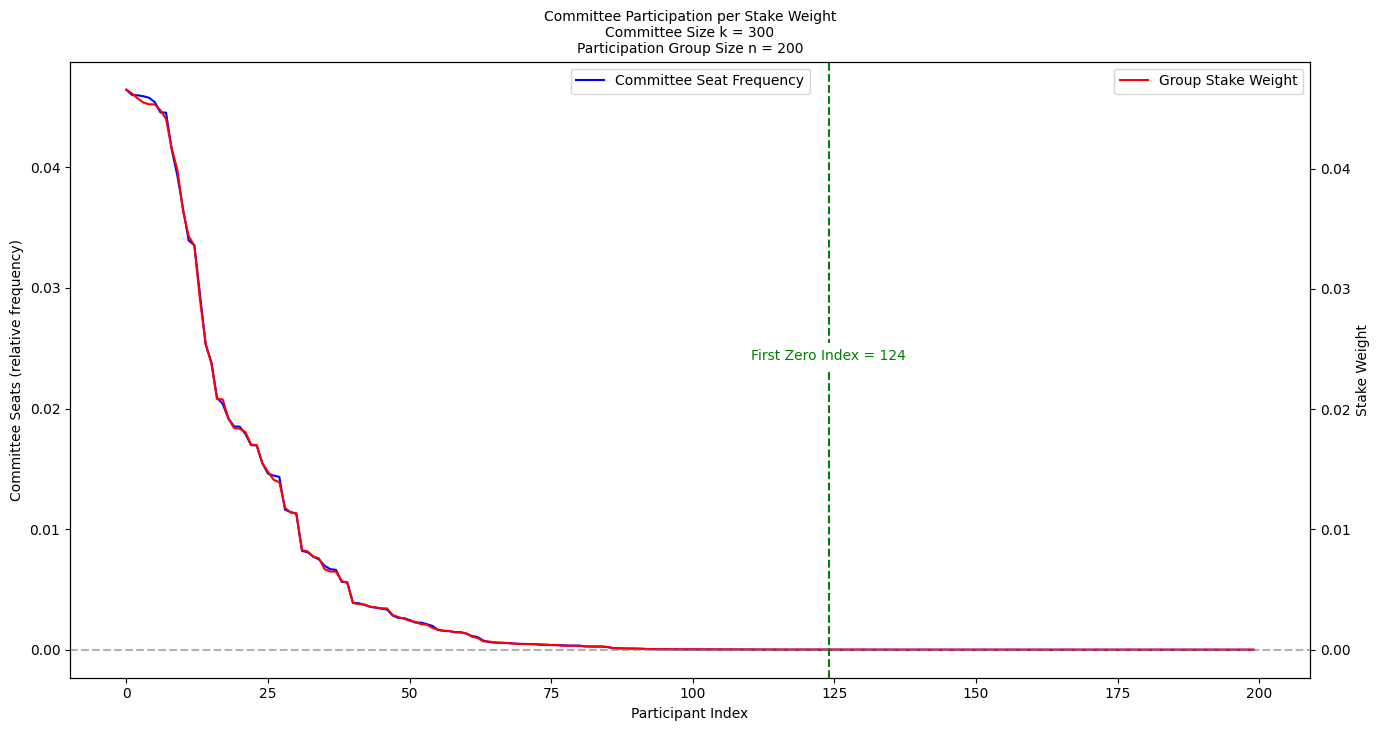

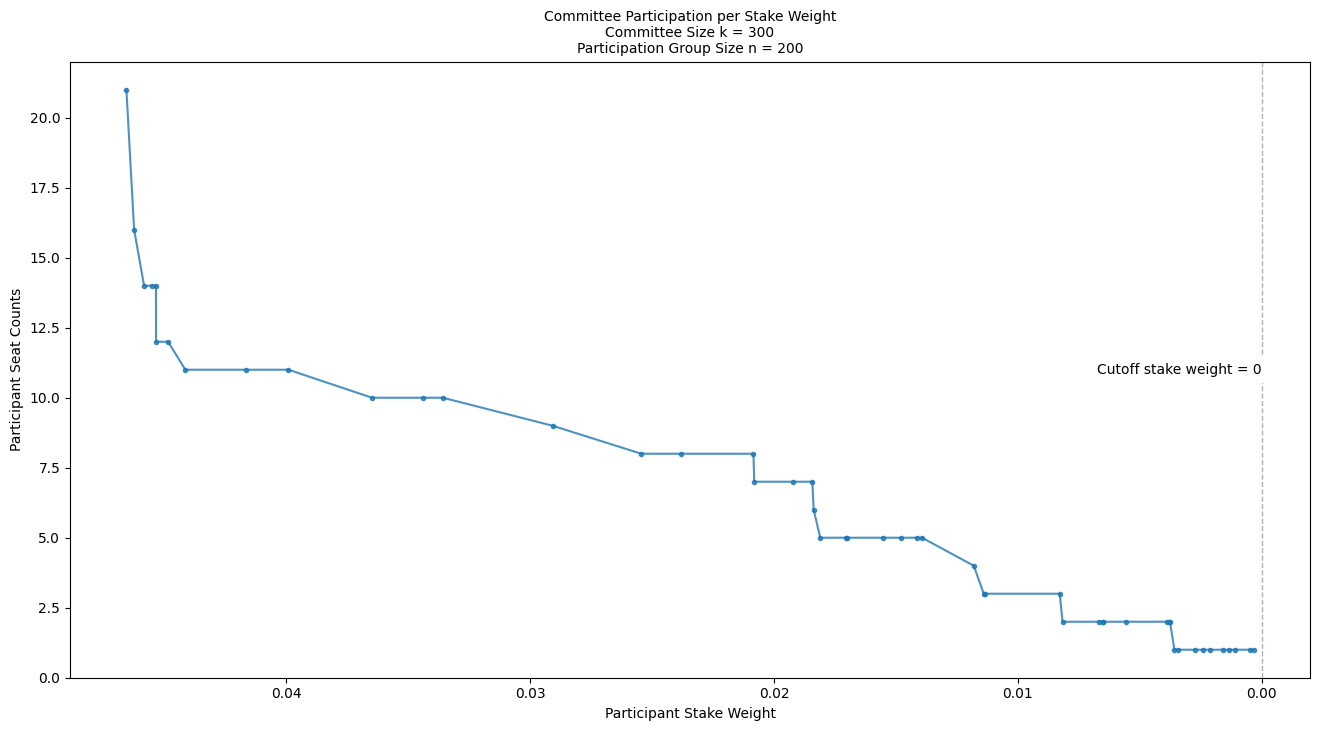

Group Size ...: 300 participants
Committee Size: 300 seats


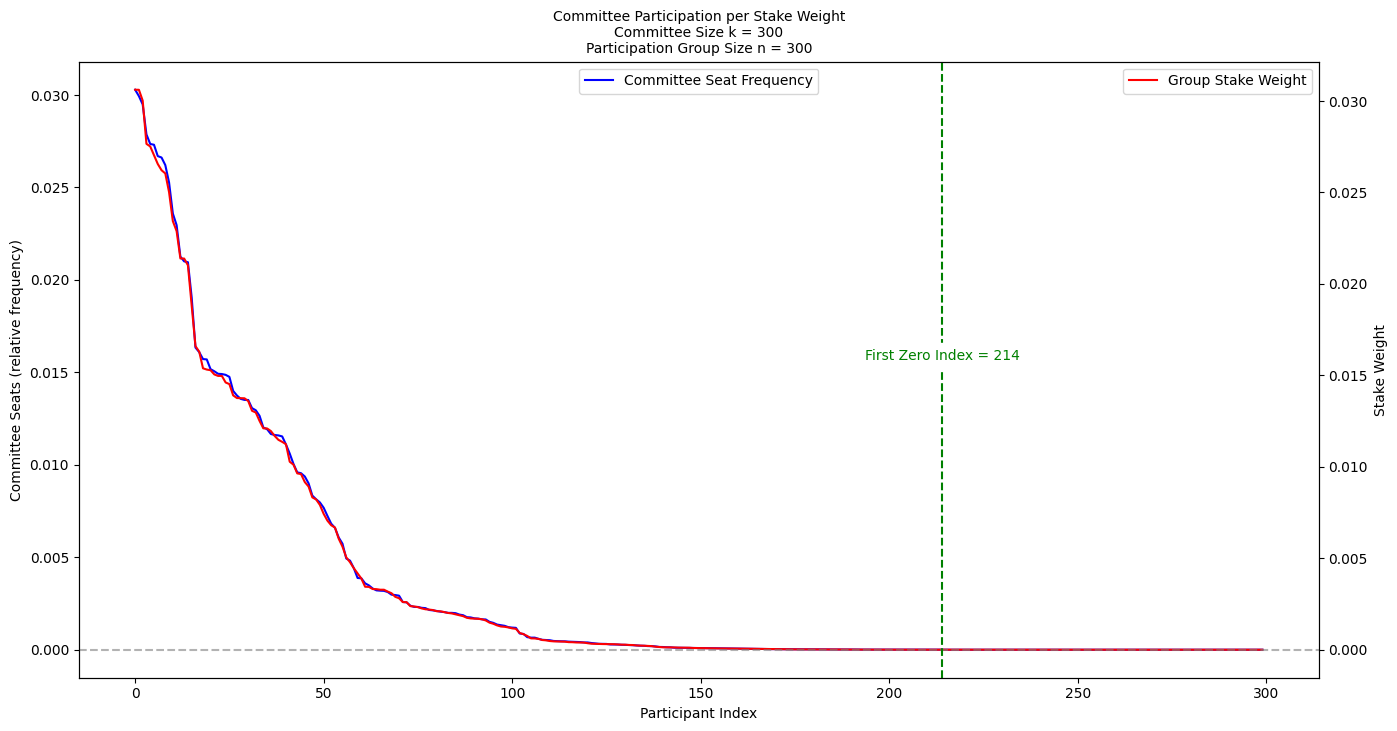

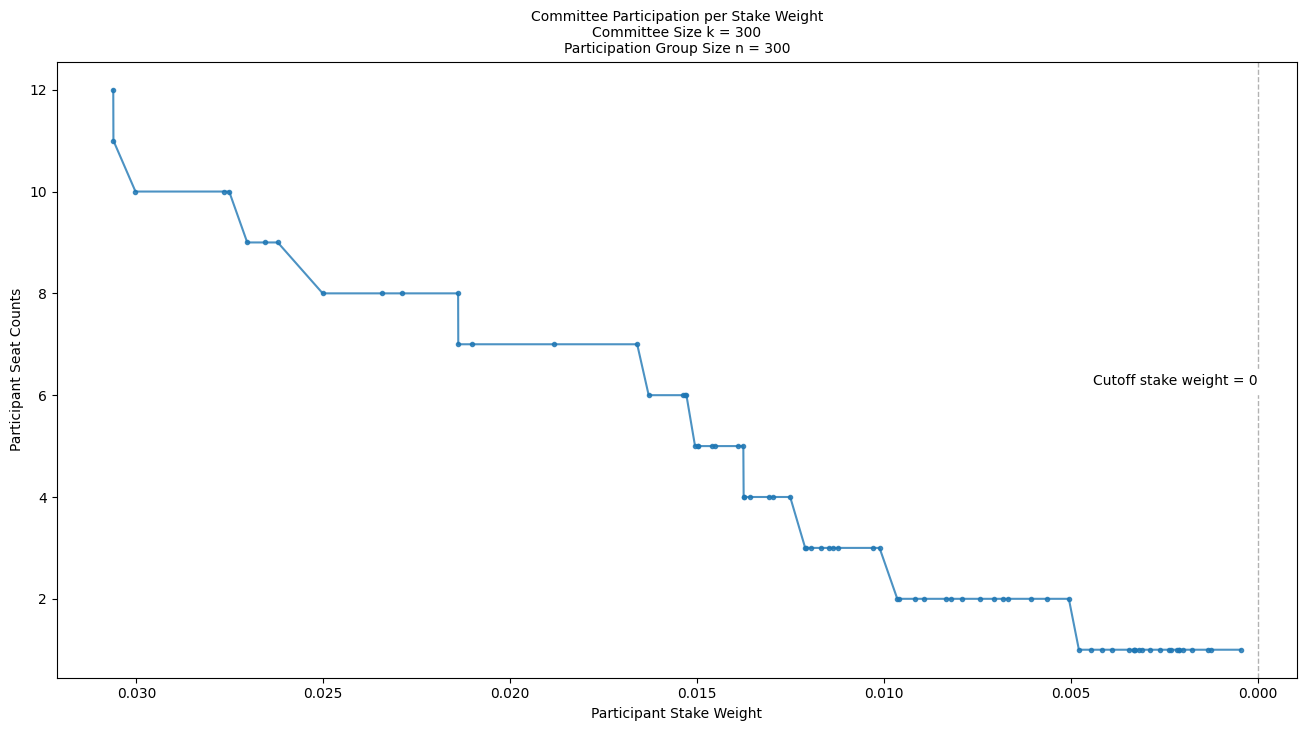

Group Size ...: 400 participants
Committee Size: 300 seats


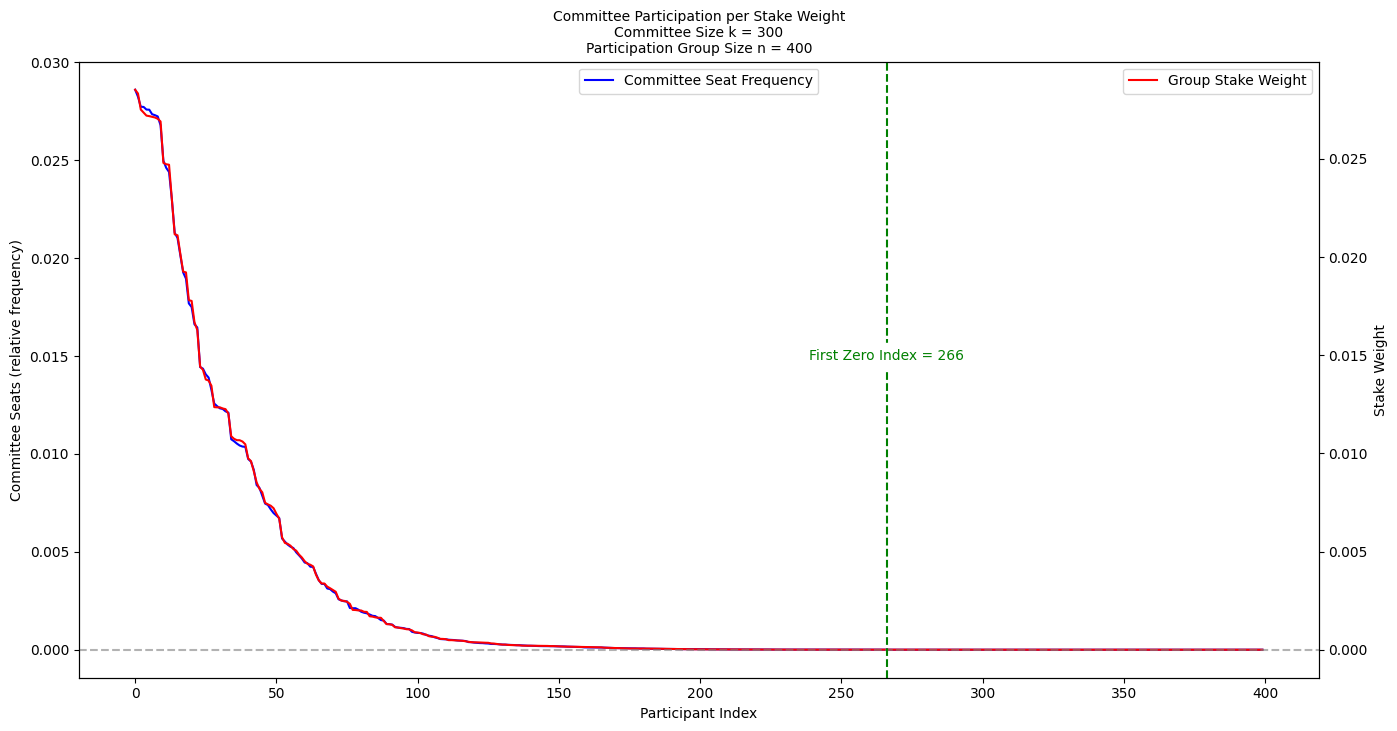

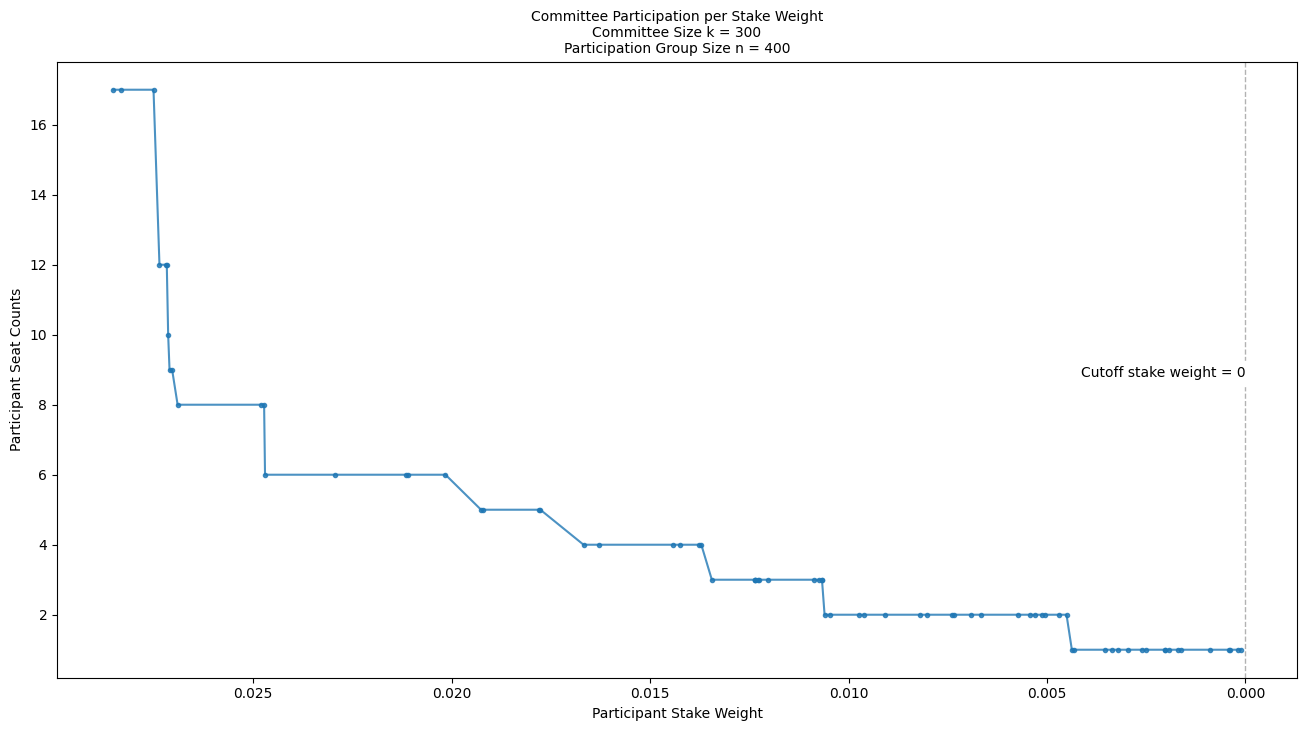

Group Size ...: 500 participants
Committee Size: 300 seats


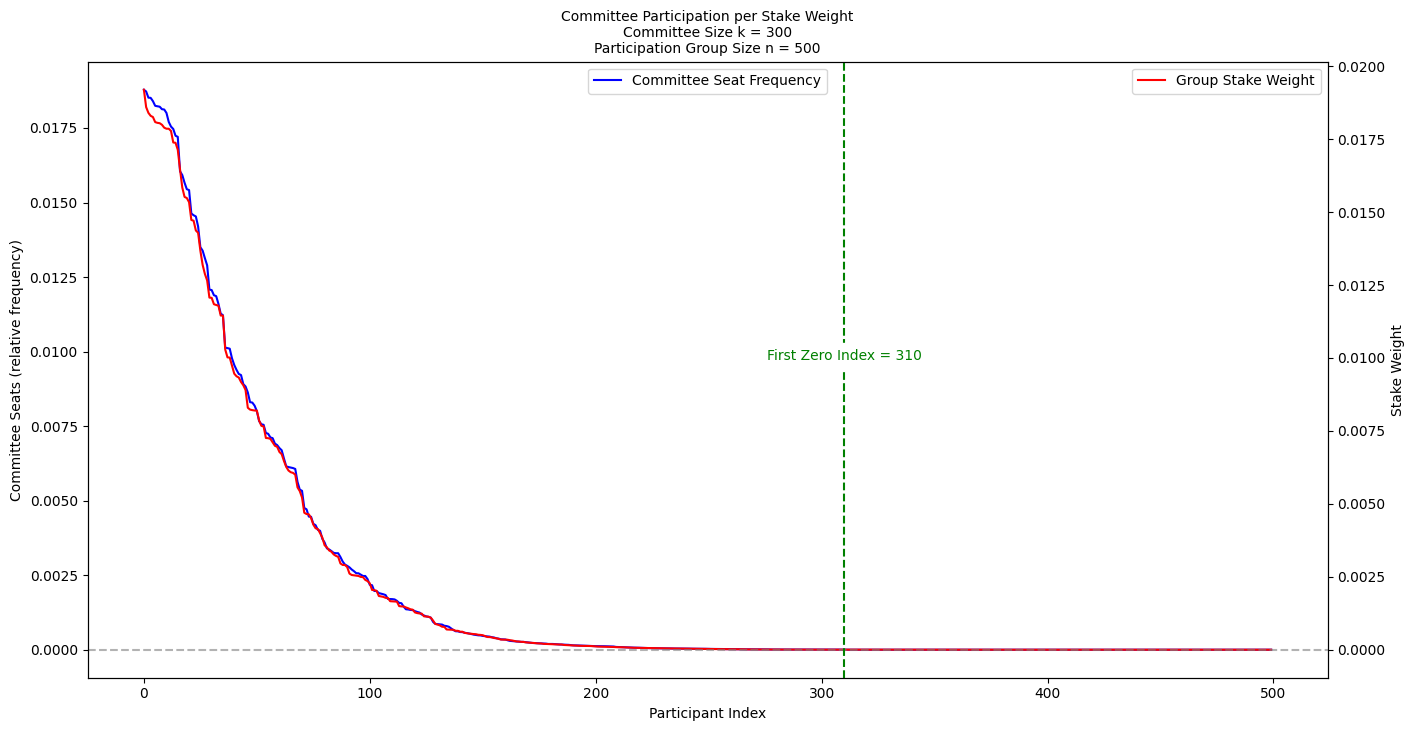

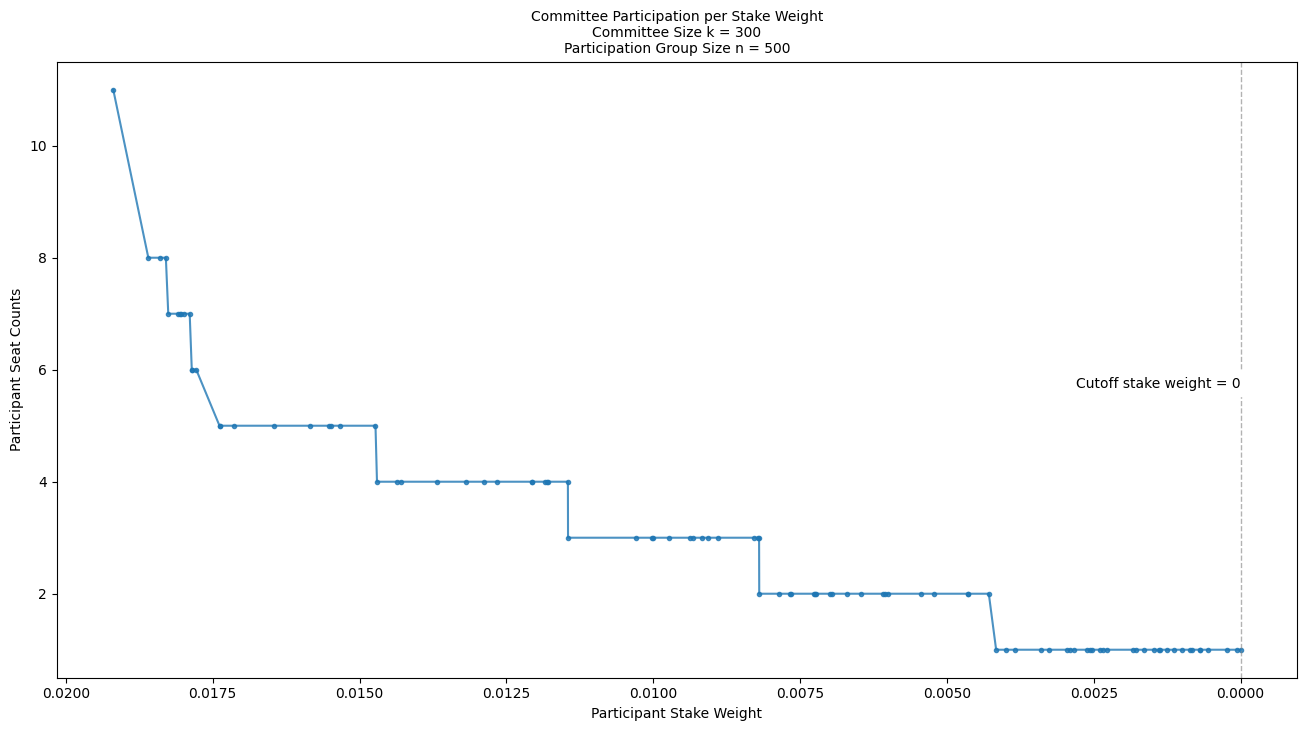

Group Size ...: 600 participants
Committee Size: 300 seats


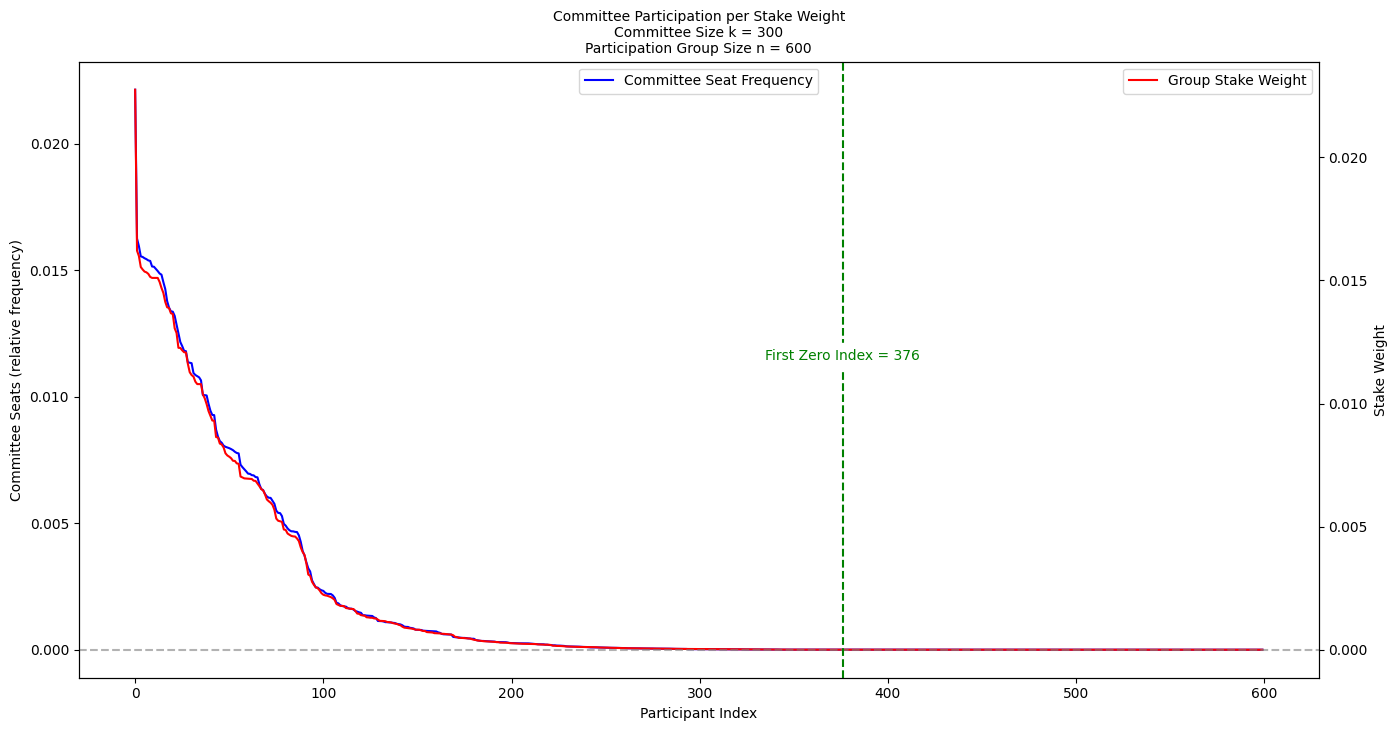

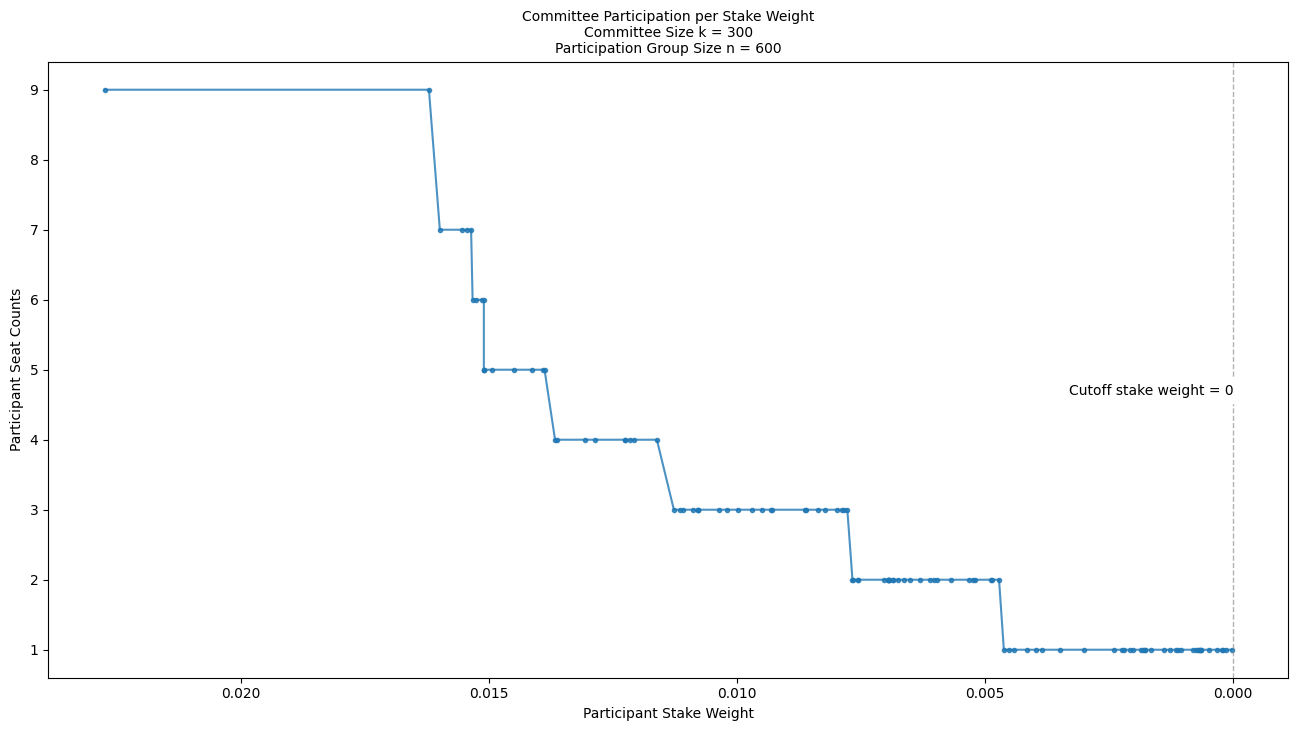

Group Size ...: 700 participants
Committee Size: 300 seats


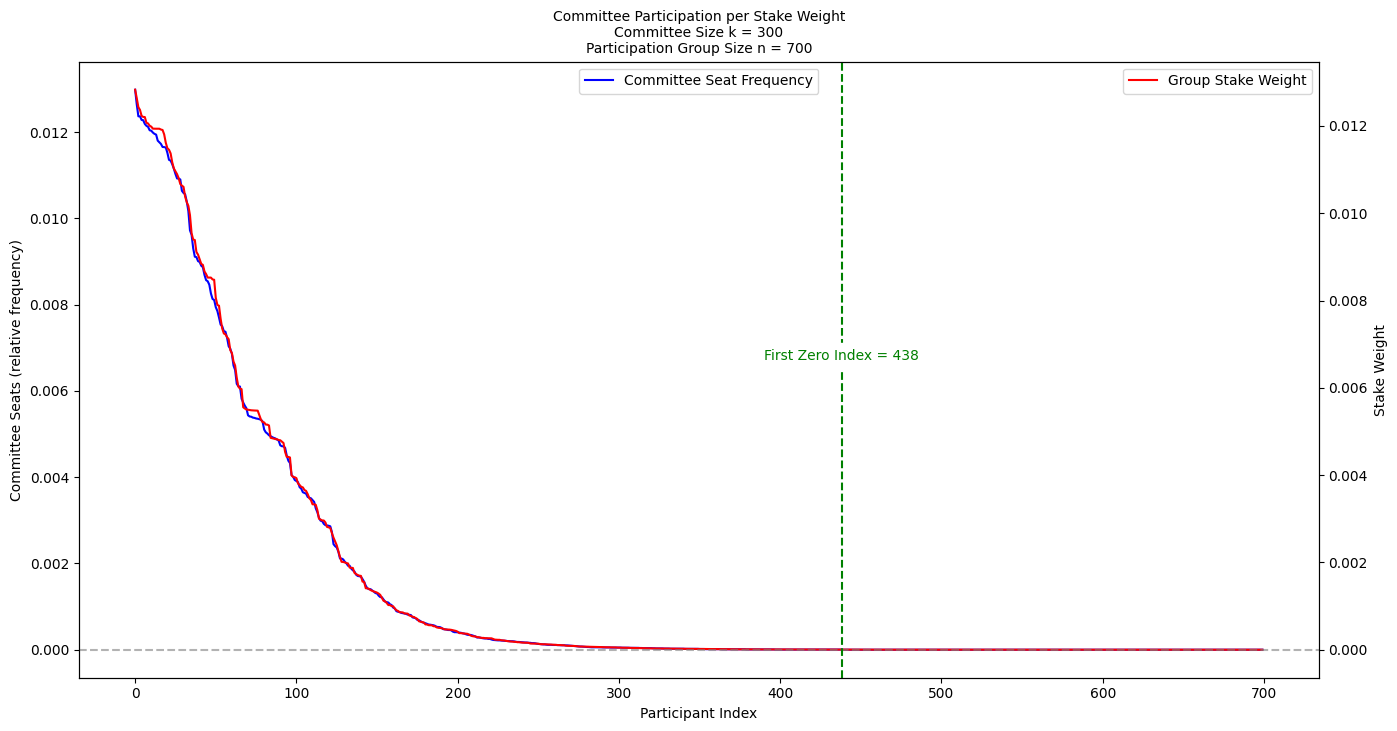

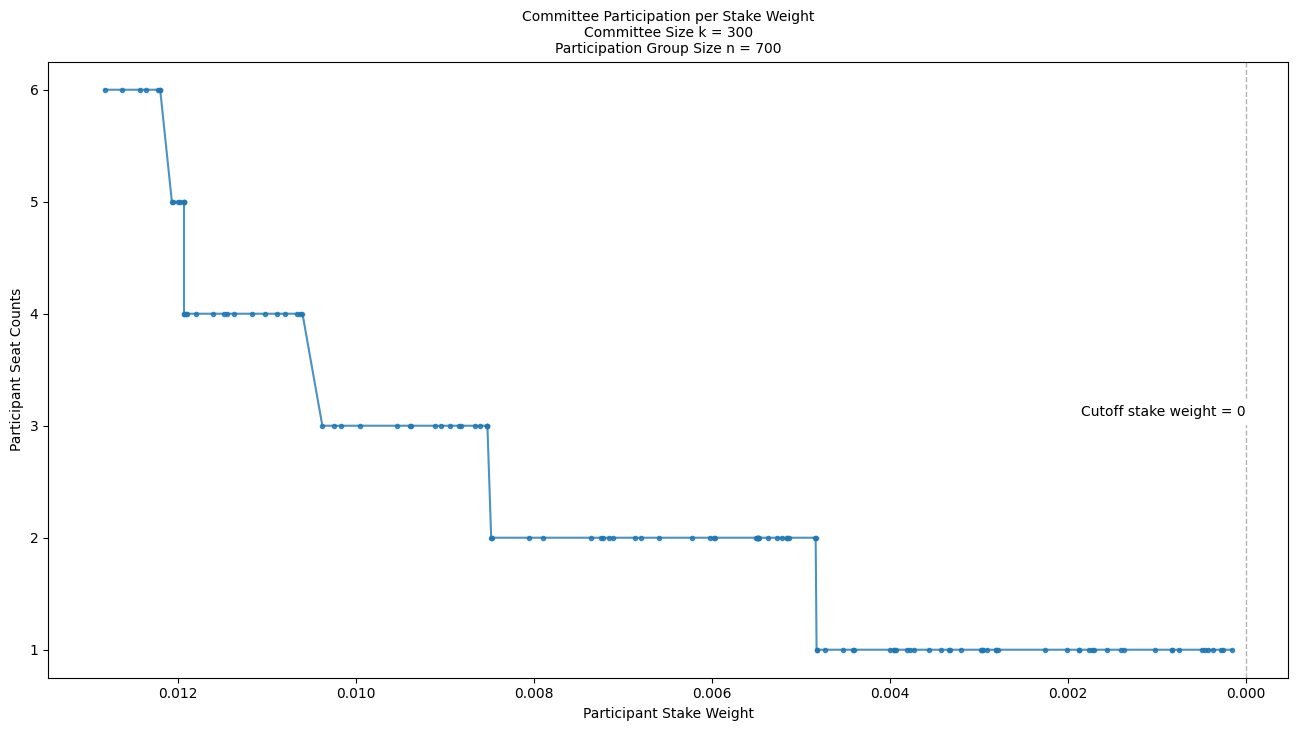

Group Size ...: 800 participants
Committee Size: 300 seats


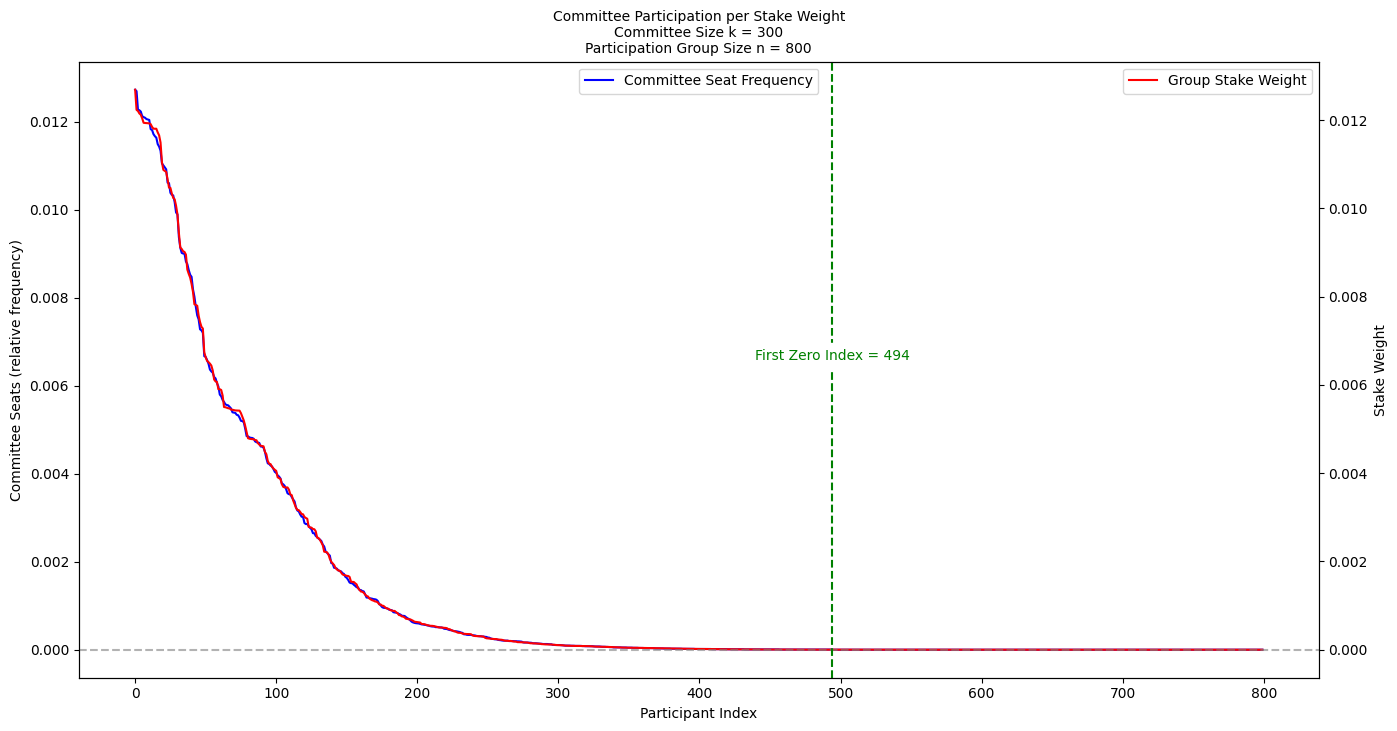

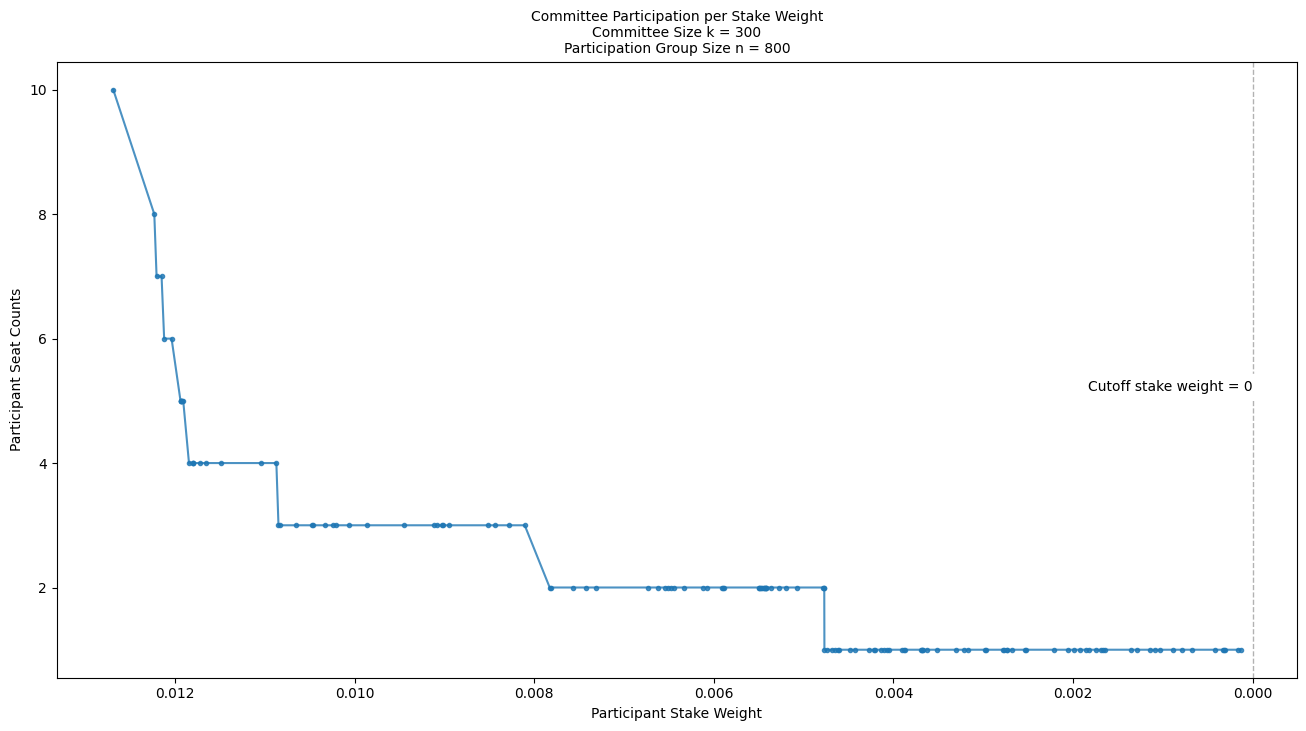

Group Size ...: 100 participants
Committee Size: 400 seats


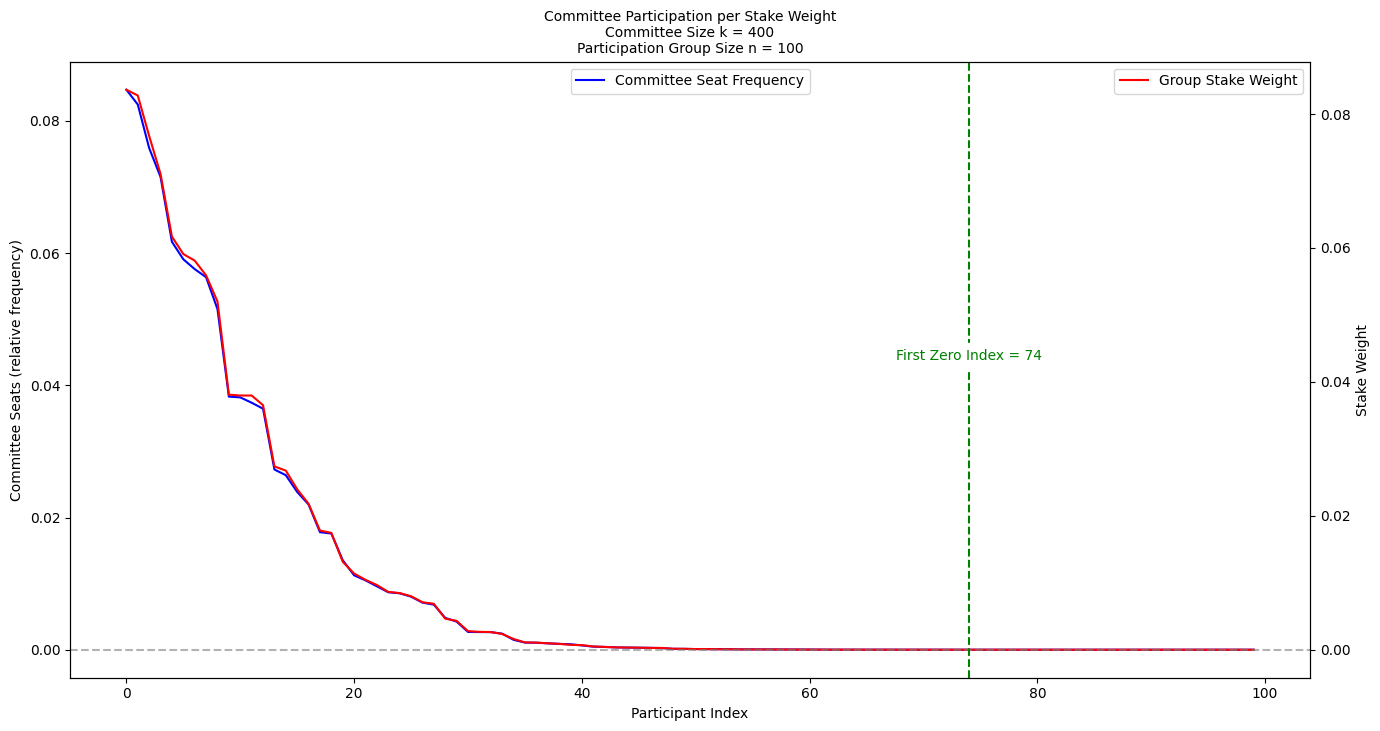

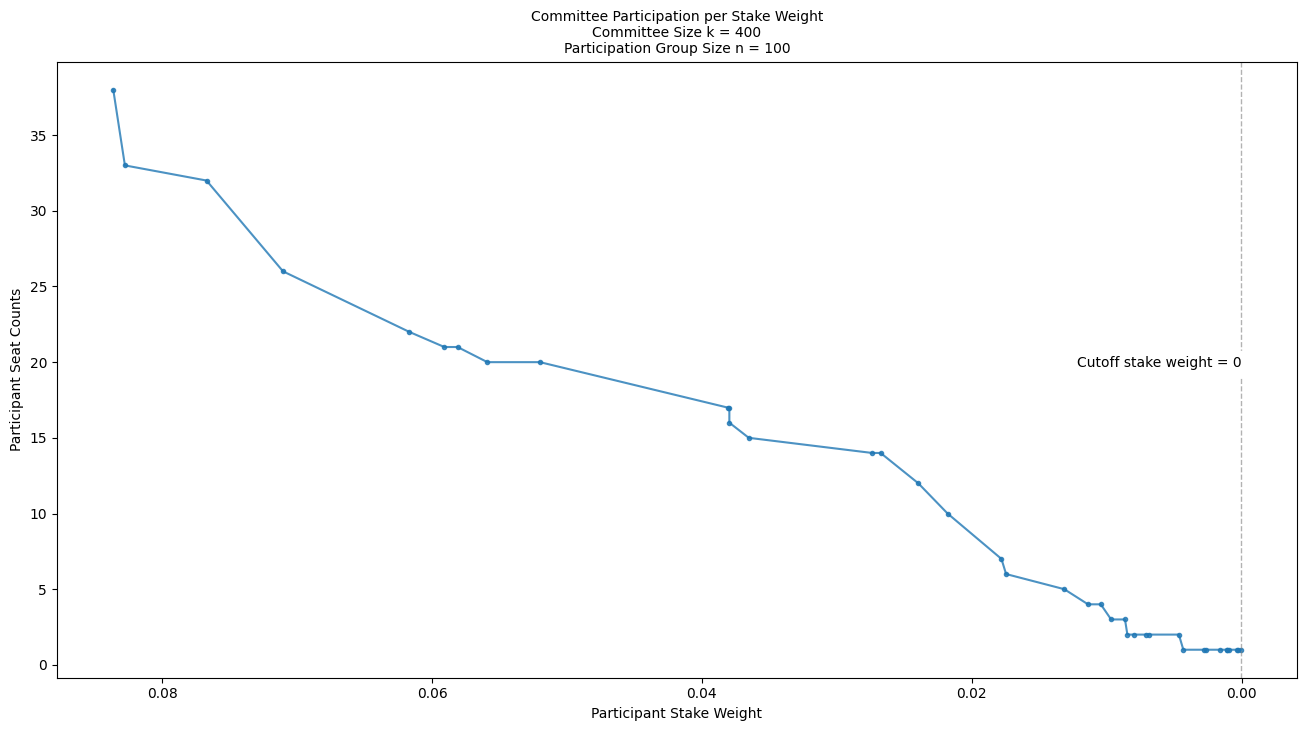

Group Size ...: 200 participants
Committee Size: 400 seats


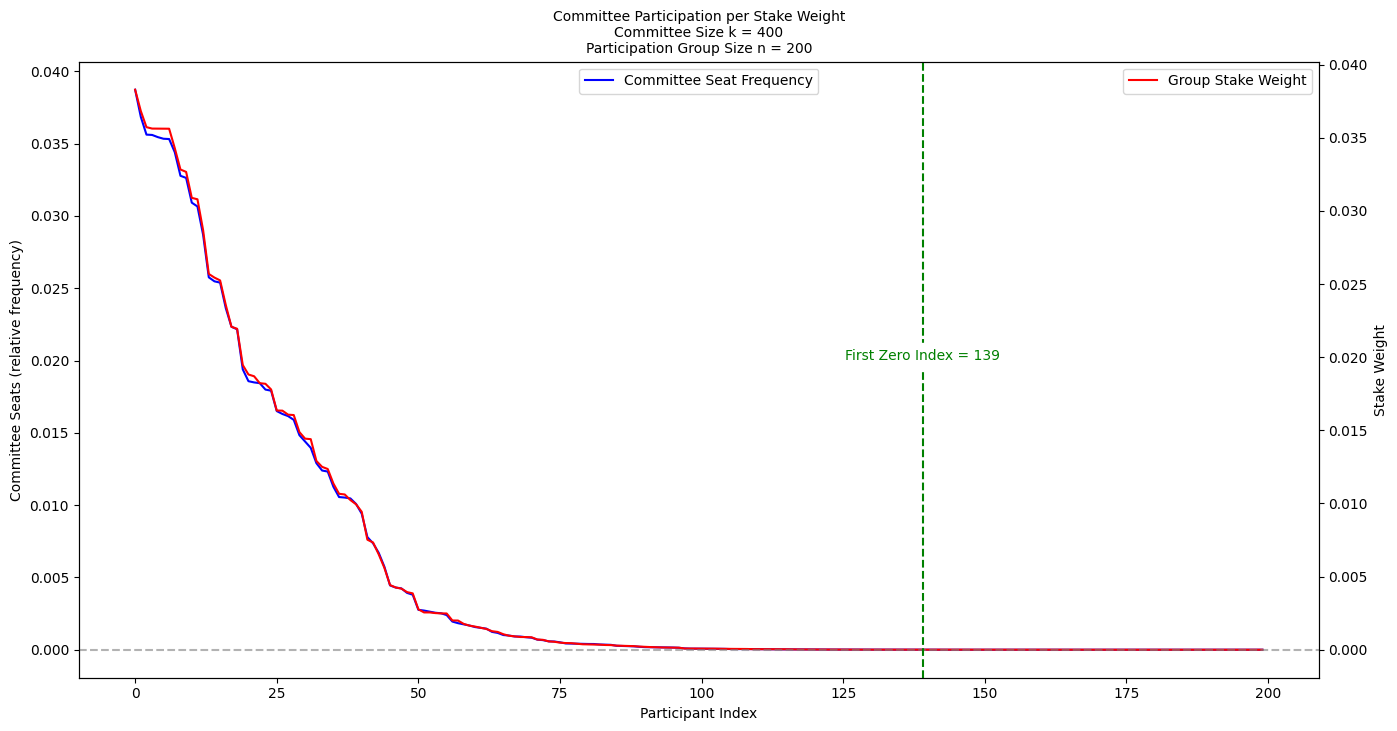

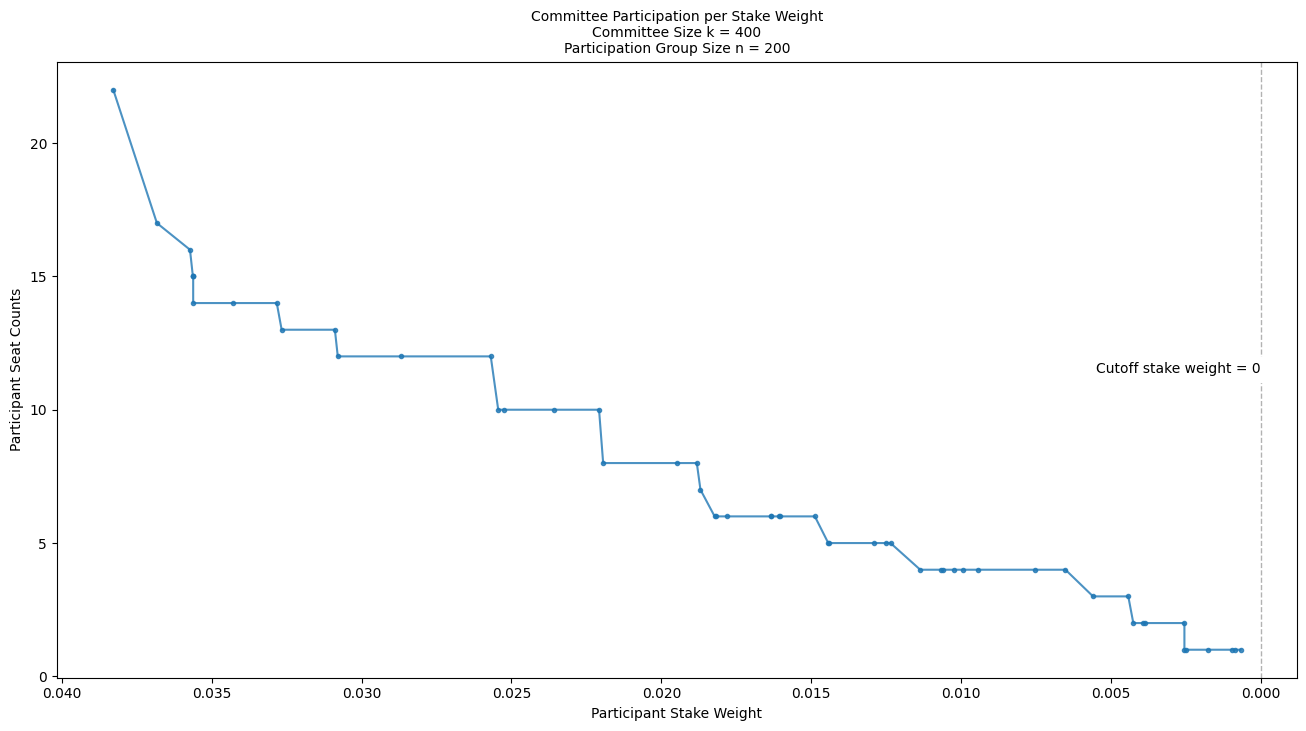

Group Size ...: 300 participants
Committee Size: 400 seats


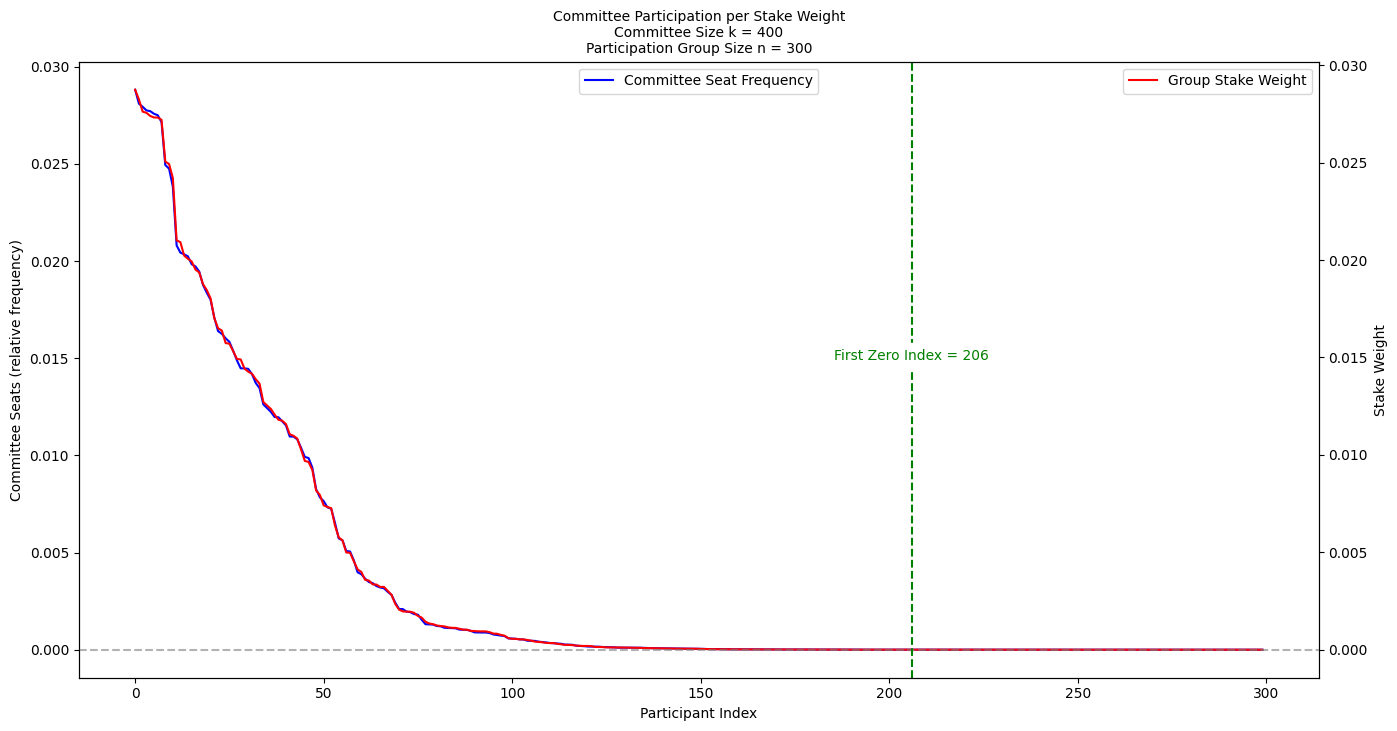

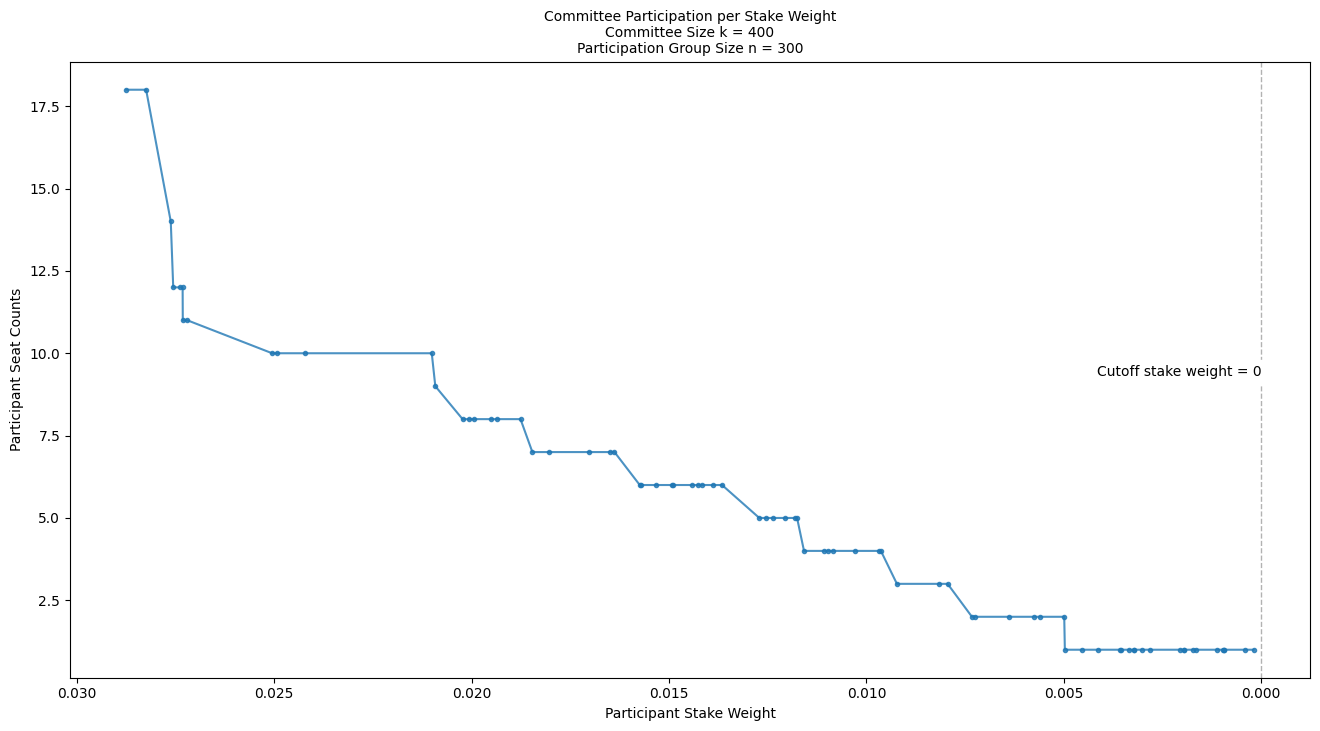

Group Size ...: 400 participants
Committee Size: 400 seats


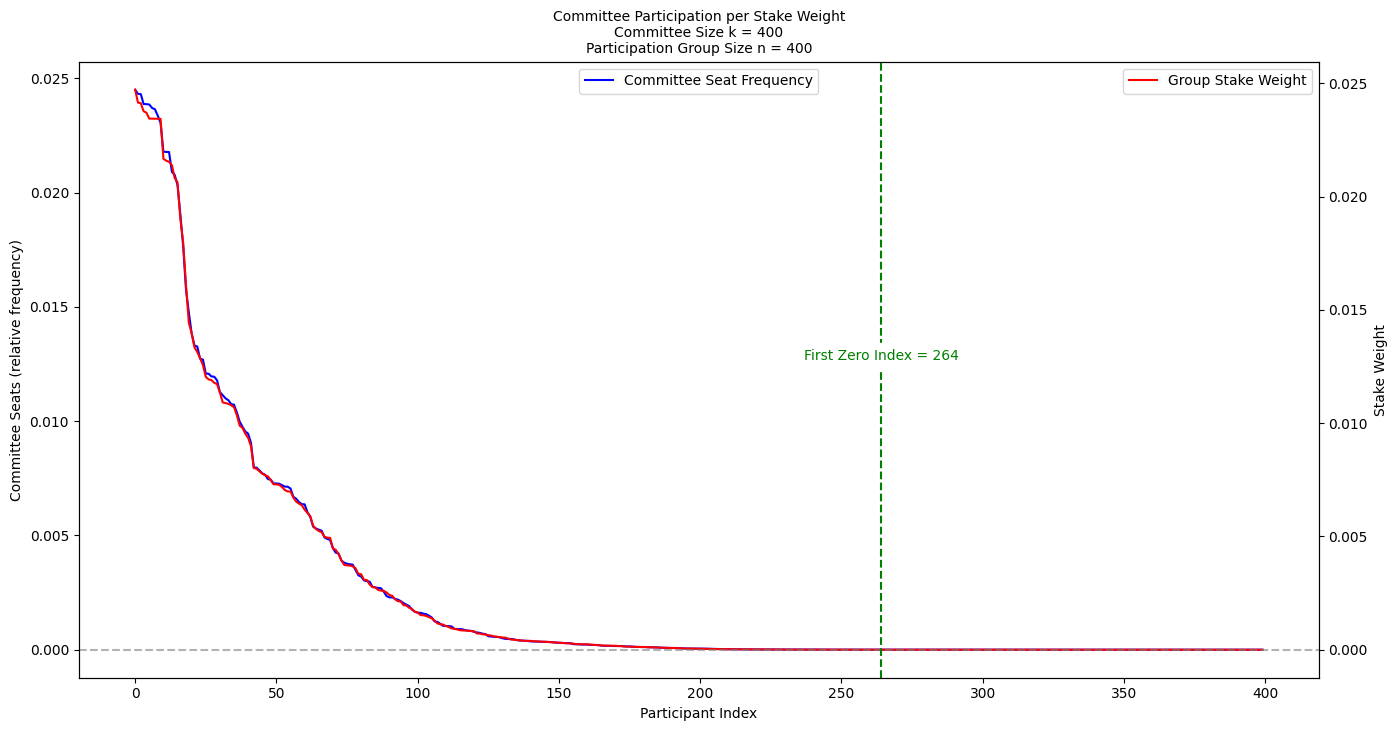

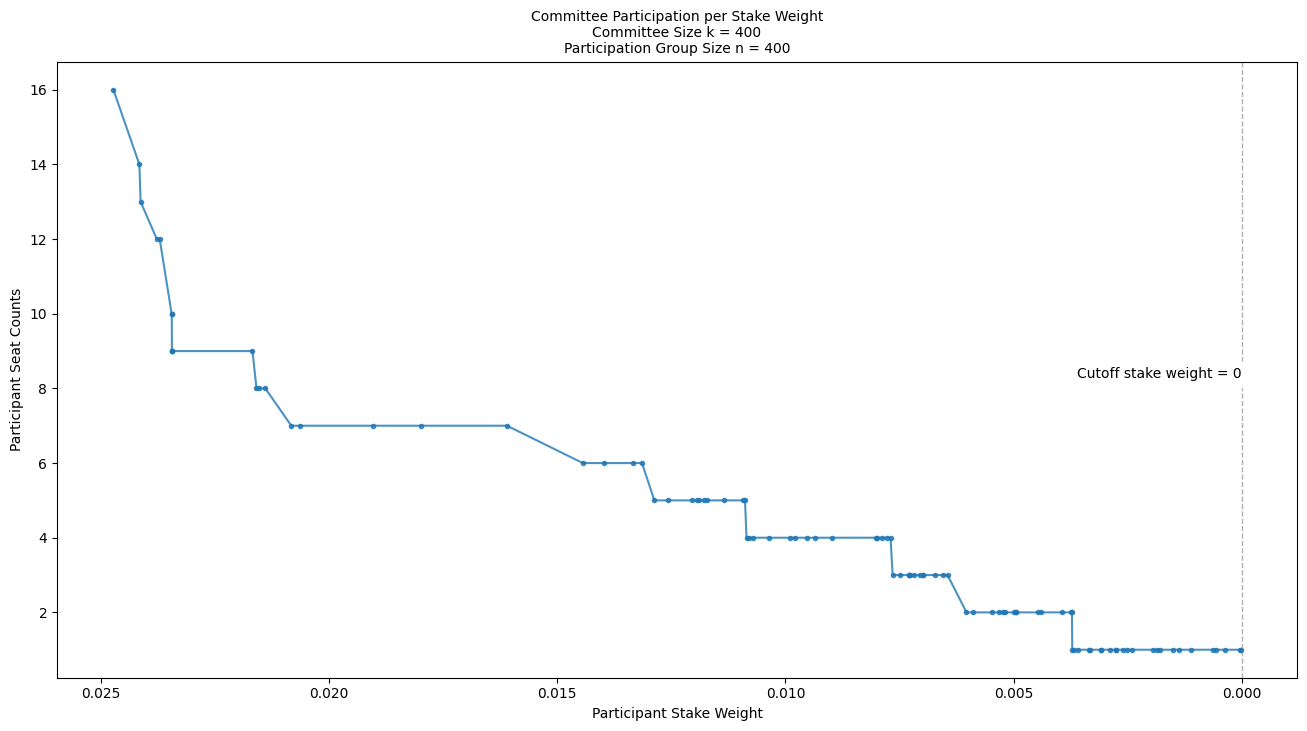

Group Size ...: 500 participants
Committee Size: 400 seats


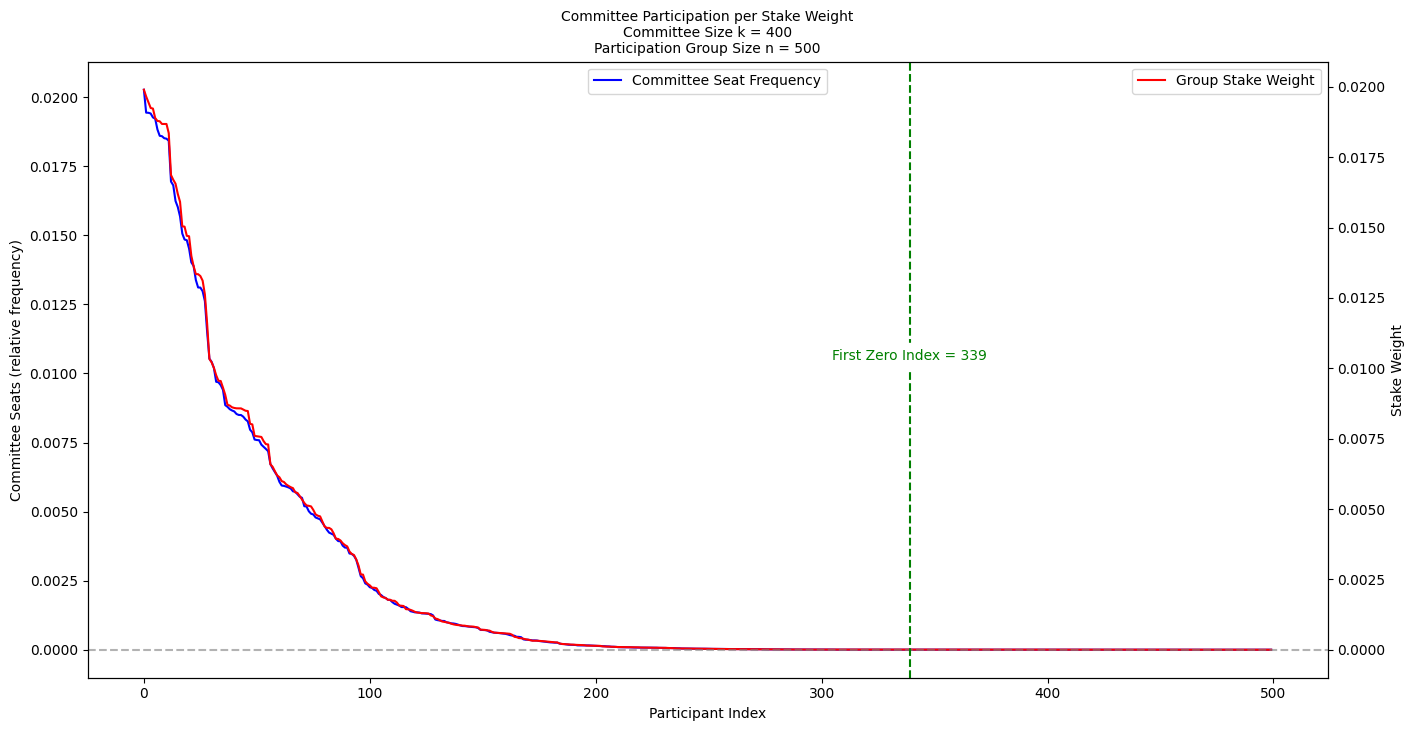

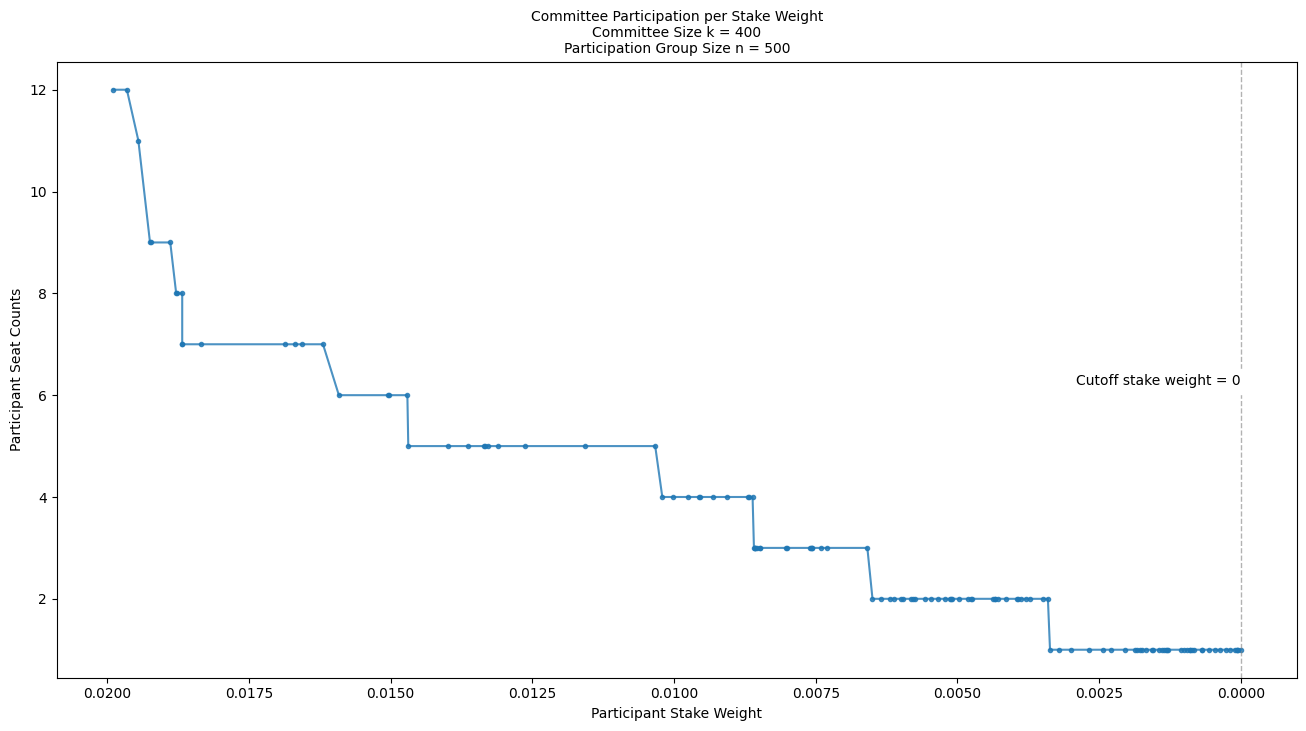

Group Size ...: 600 participants
Committee Size: 400 seats


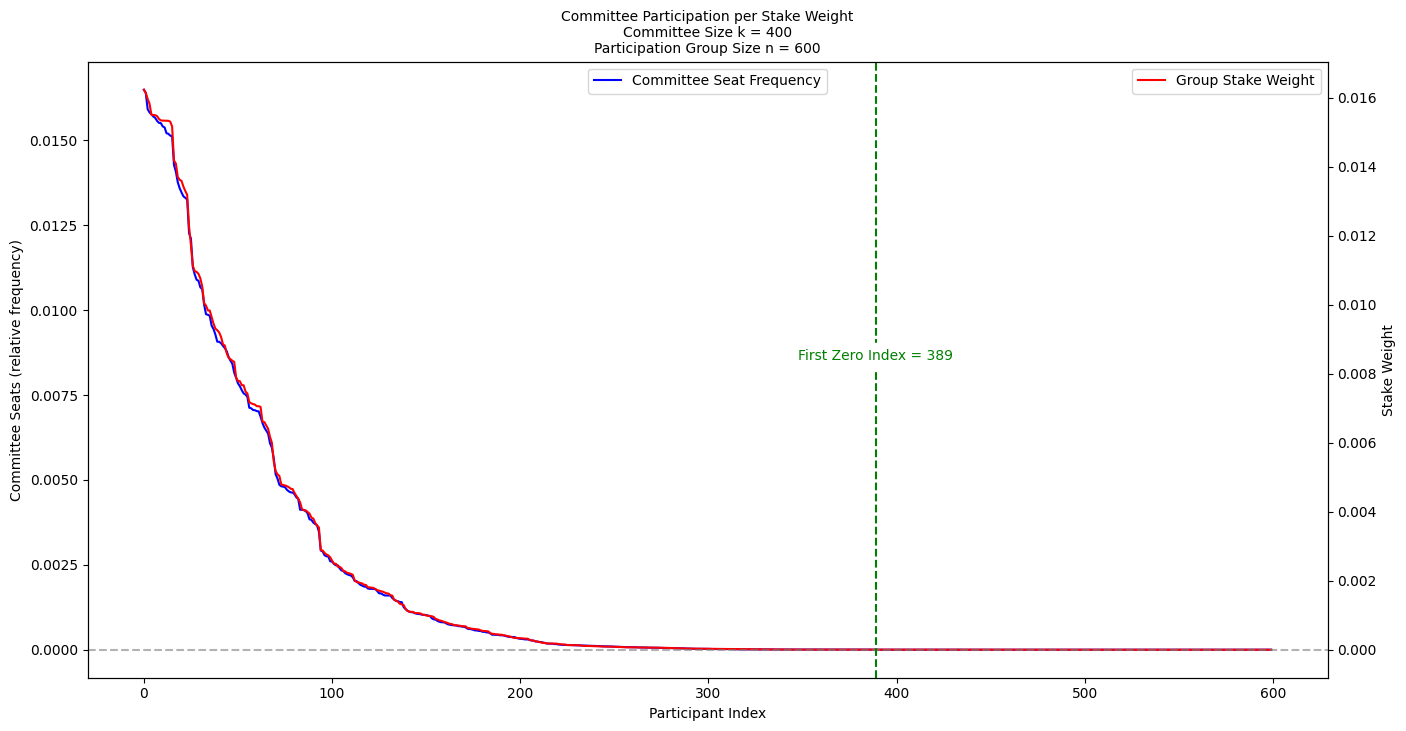

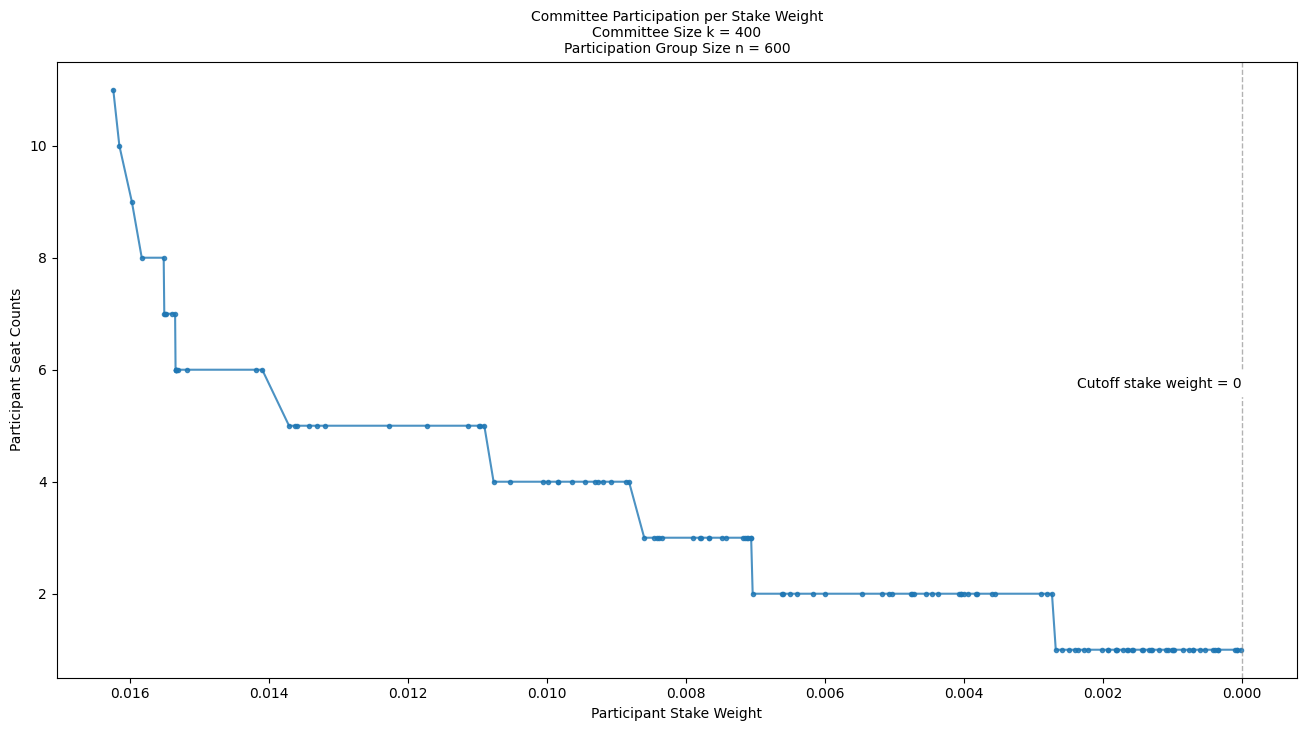

Group Size ...: 700 participants
Committee Size: 400 seats


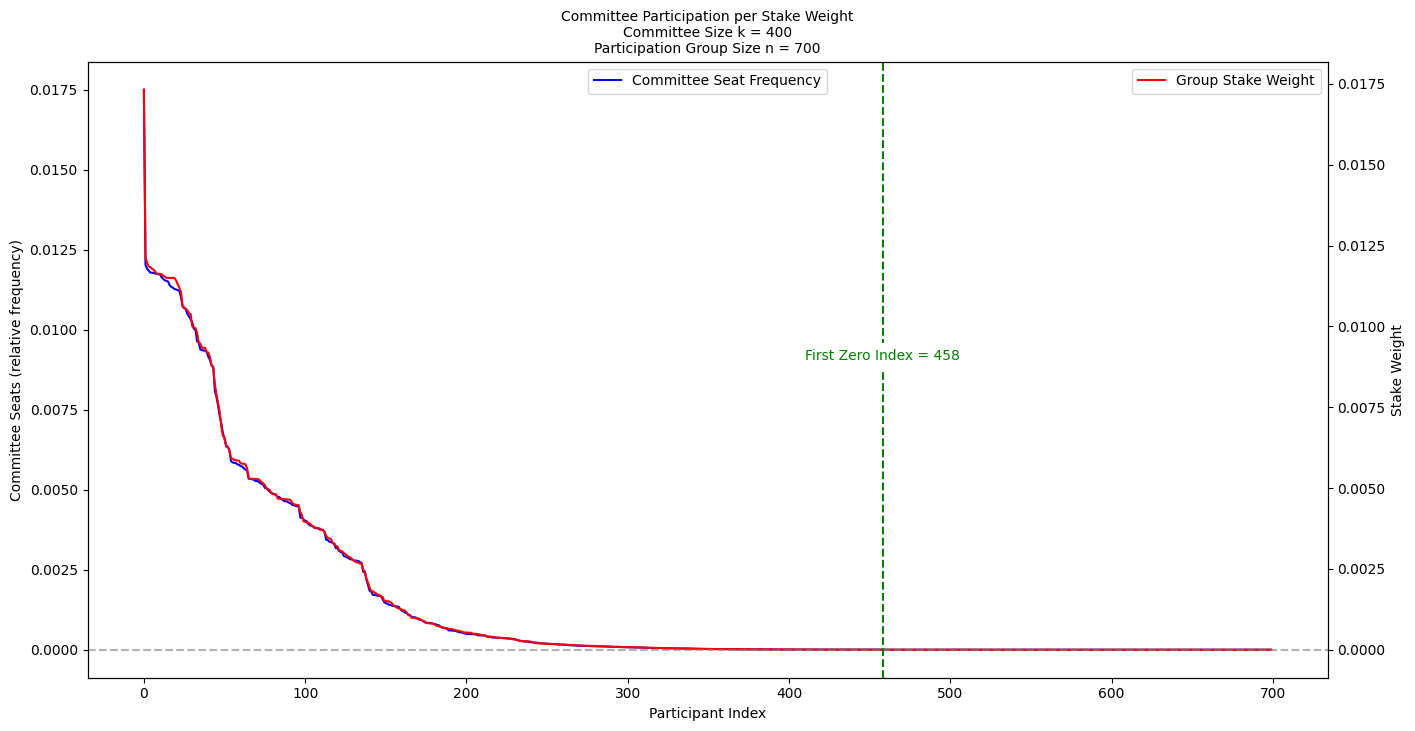

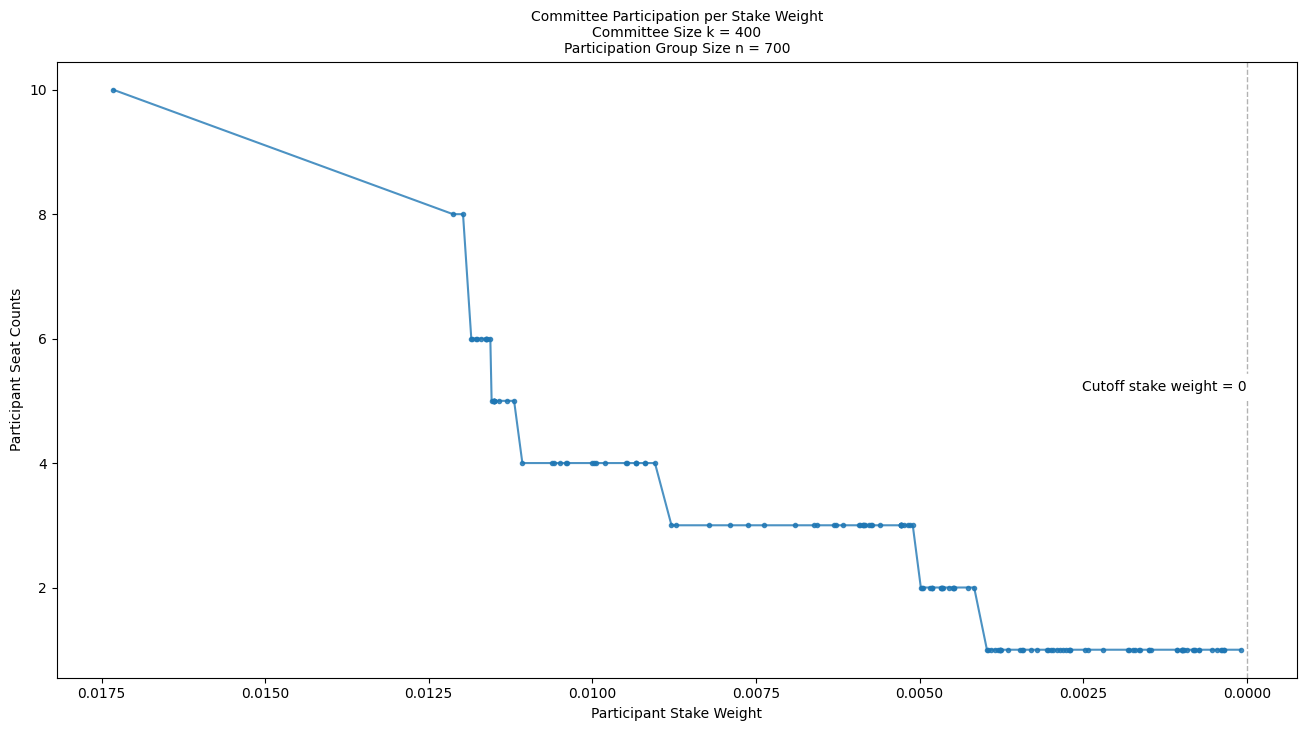

Group Size ...: 800 participants
Committee Size: 400 seats


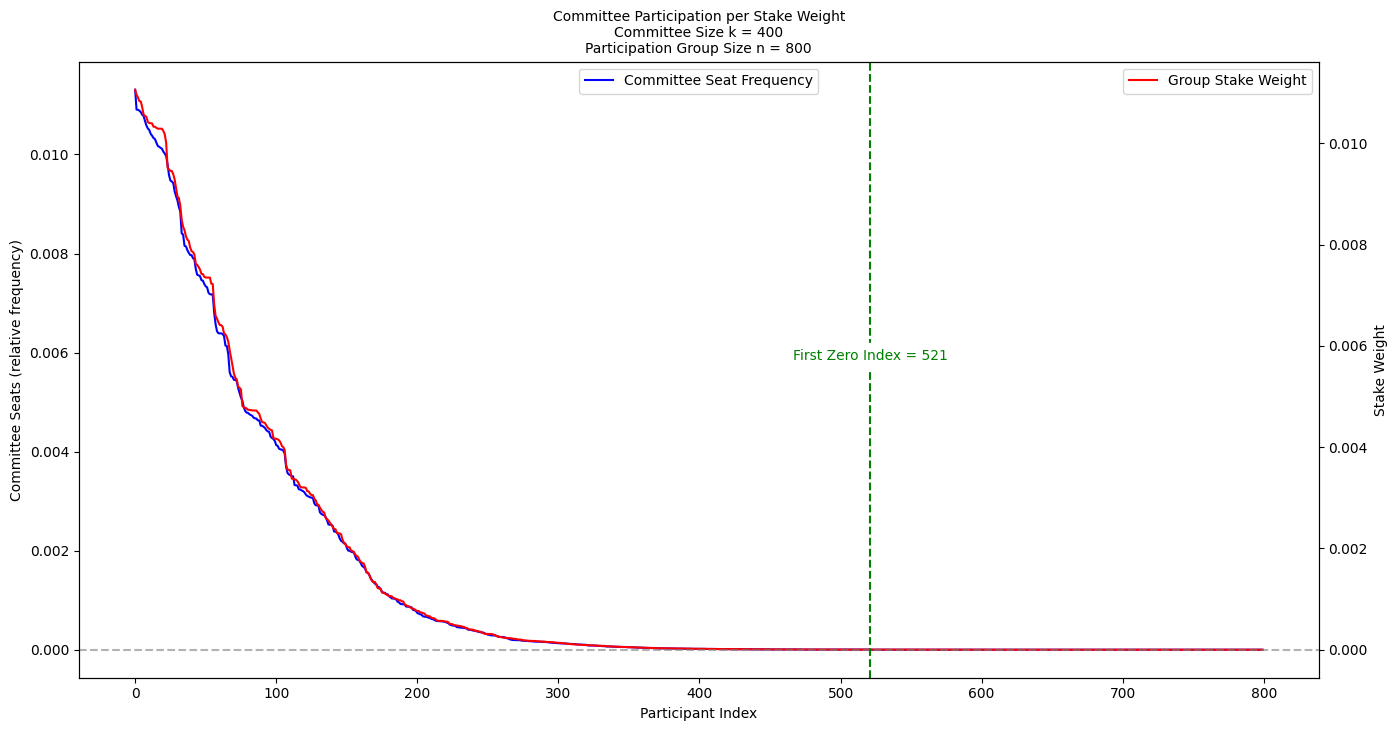

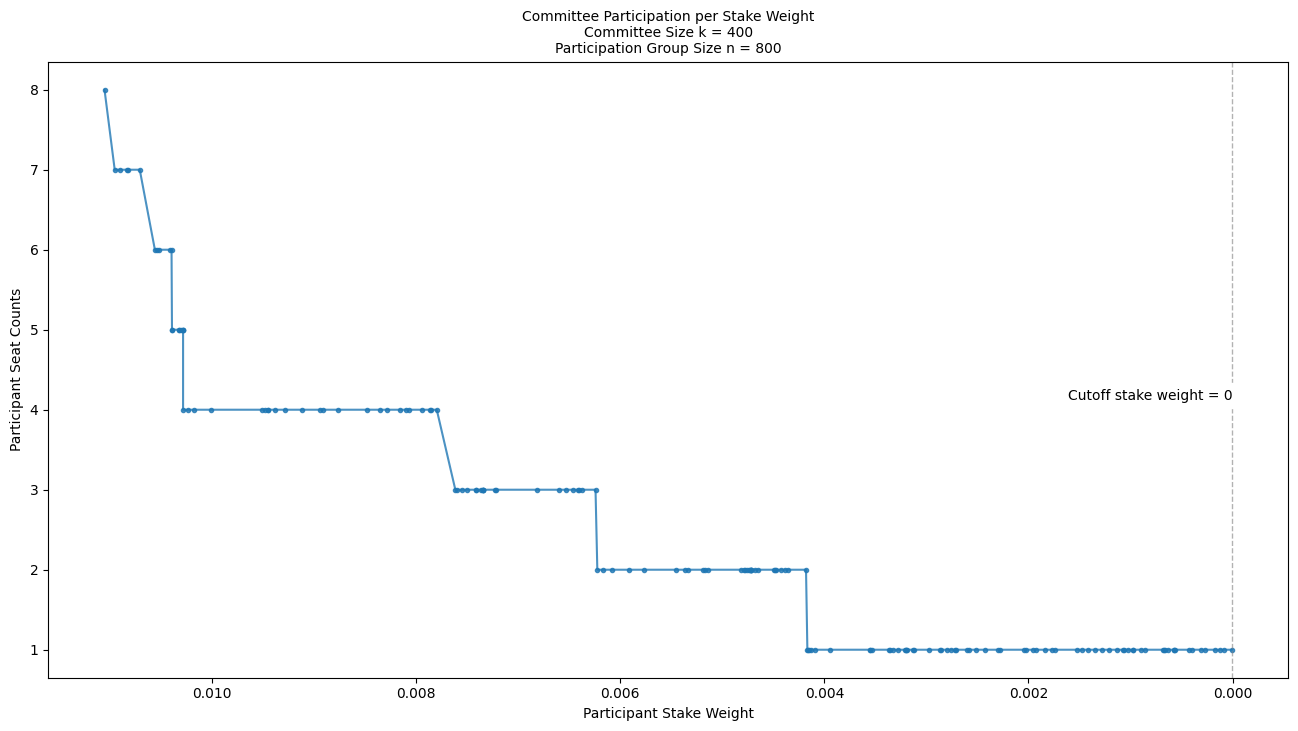

Group Size ...: 100 participants
Committee Size: 500 seats


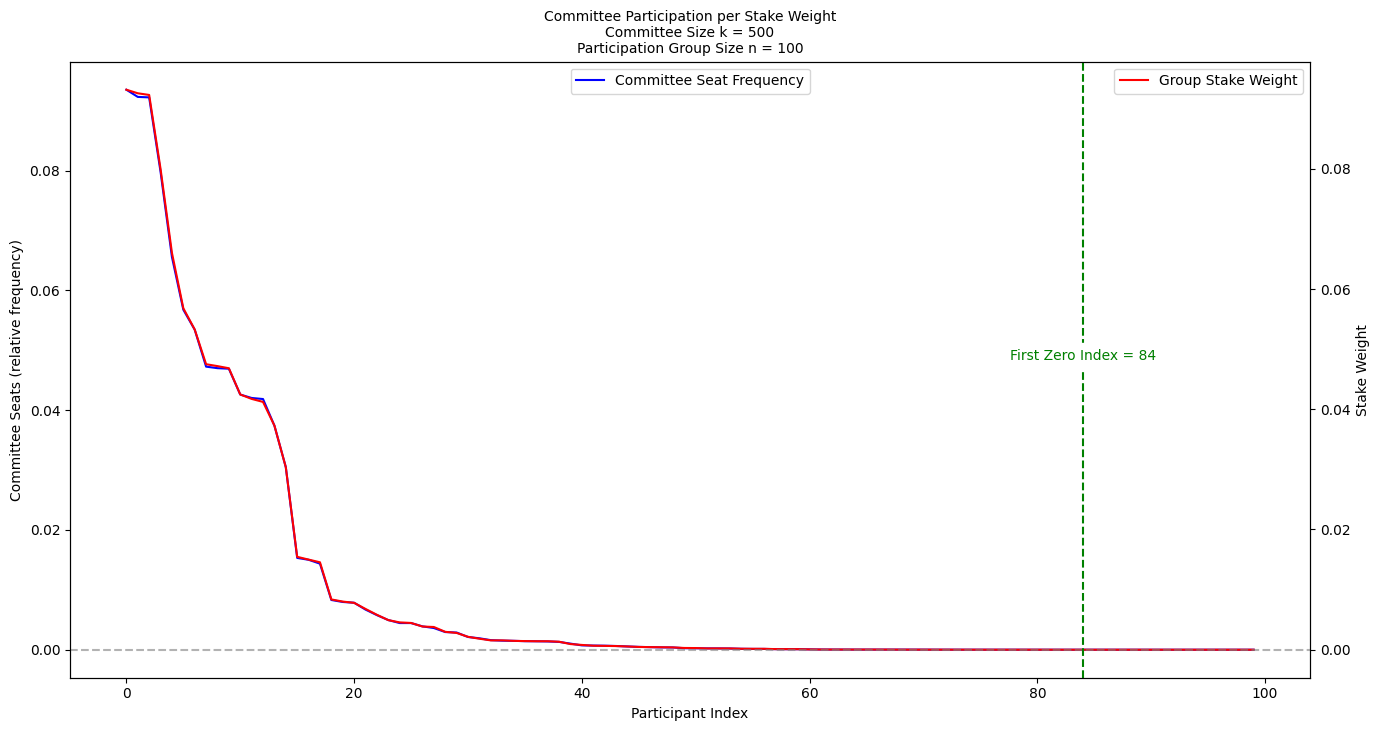

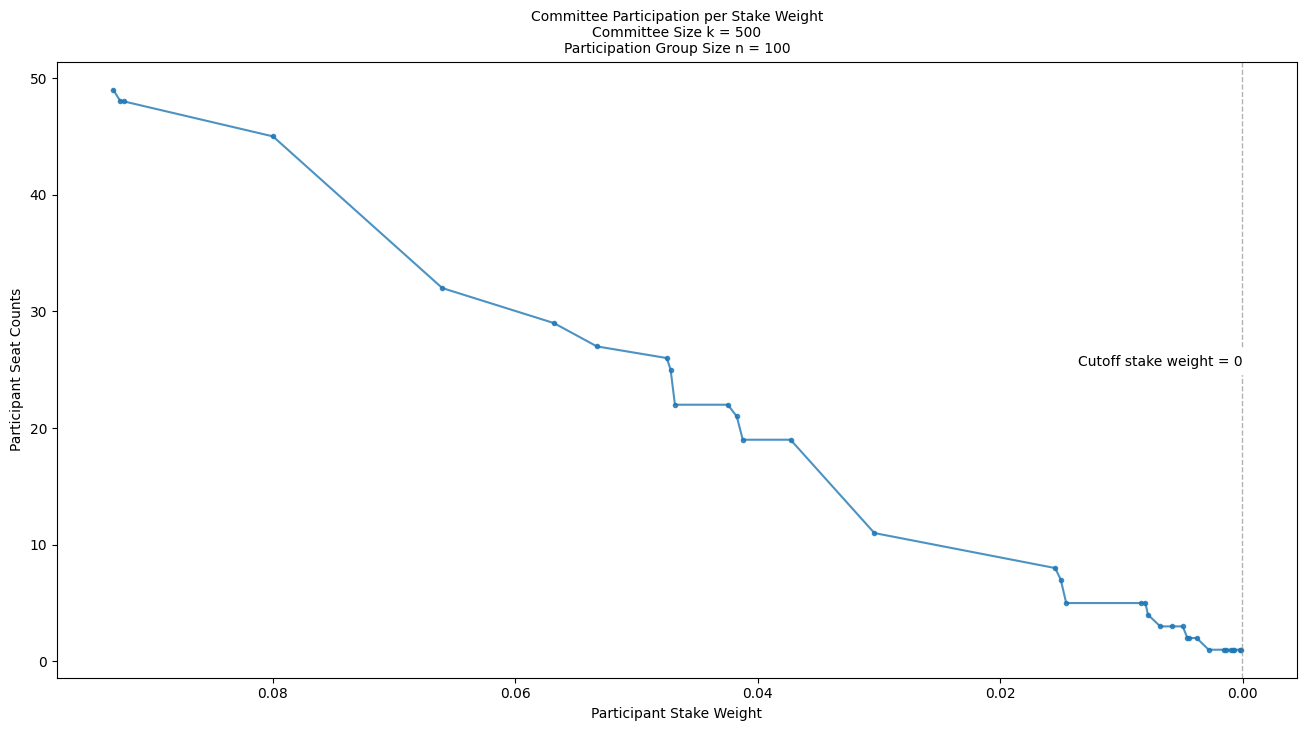

Group Size ...: 200 participants
Committee Size: 500 seats


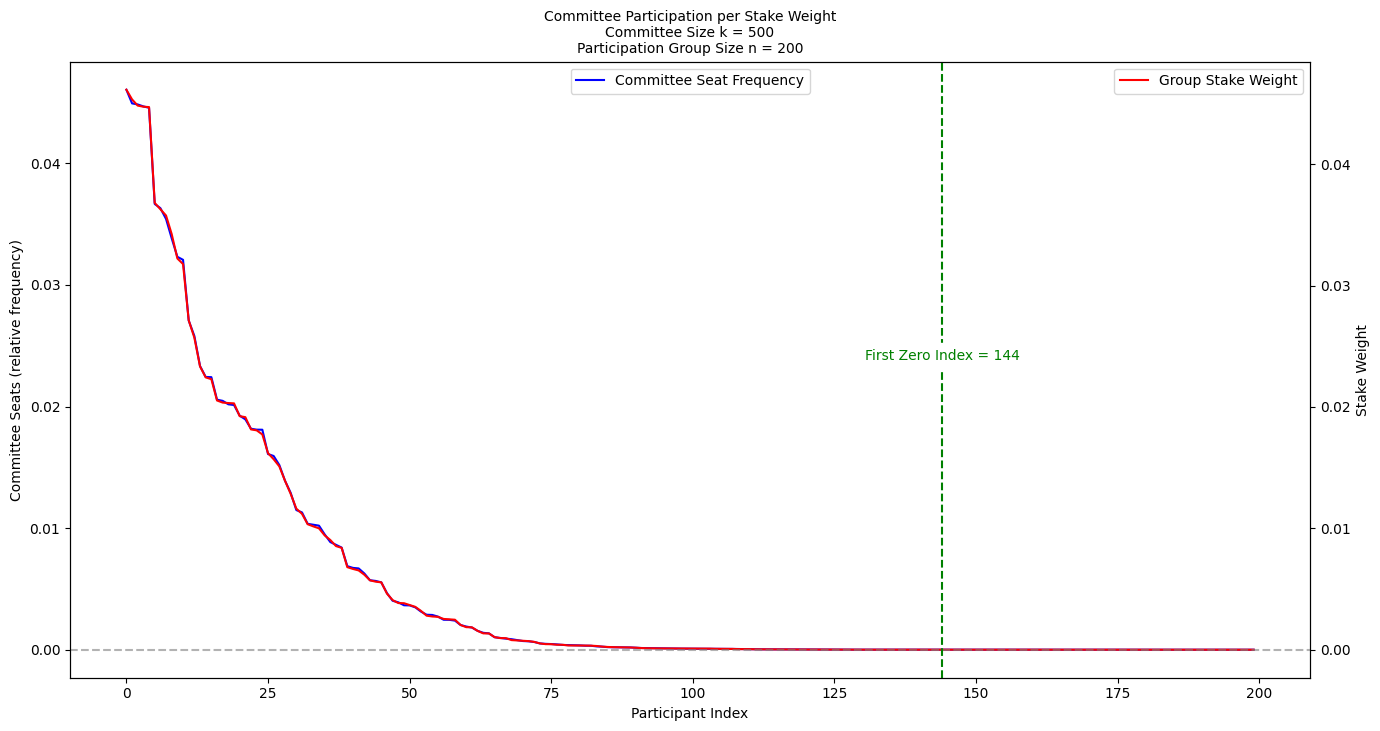

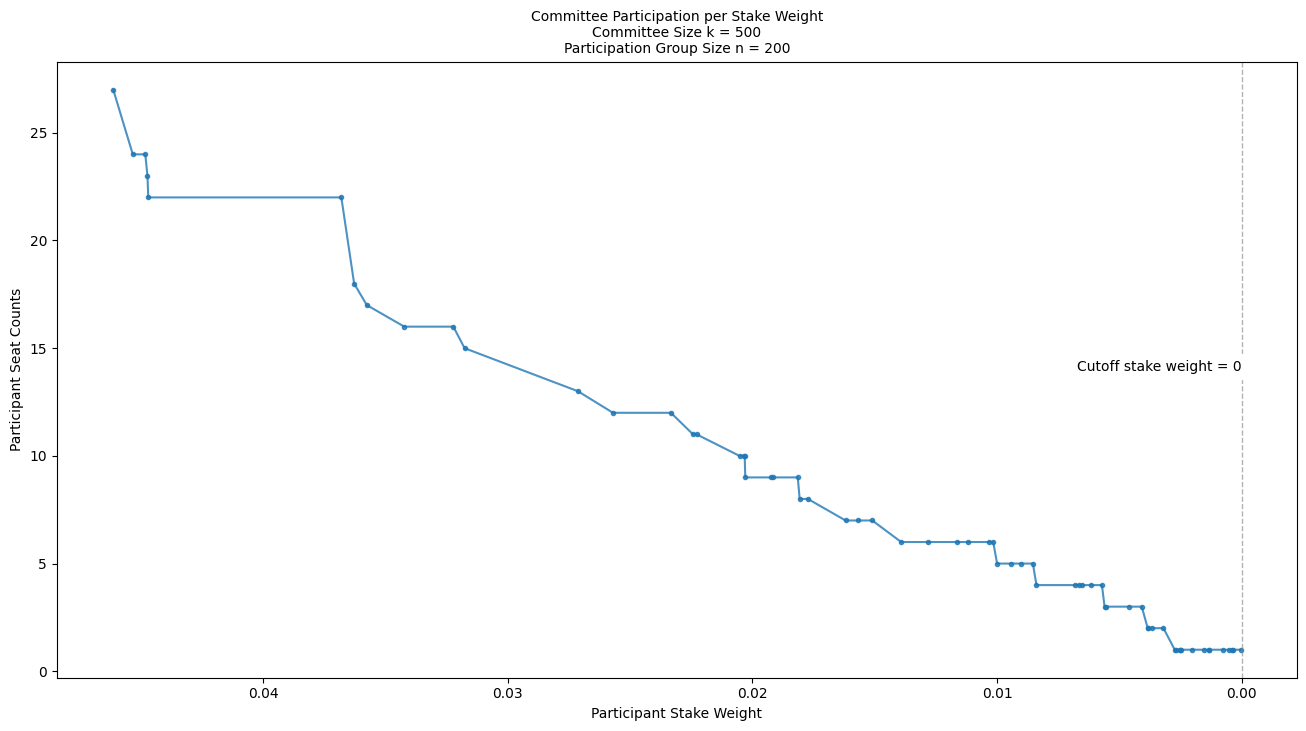

Group Size ...: 300 participants
Committee Size: 500 seats


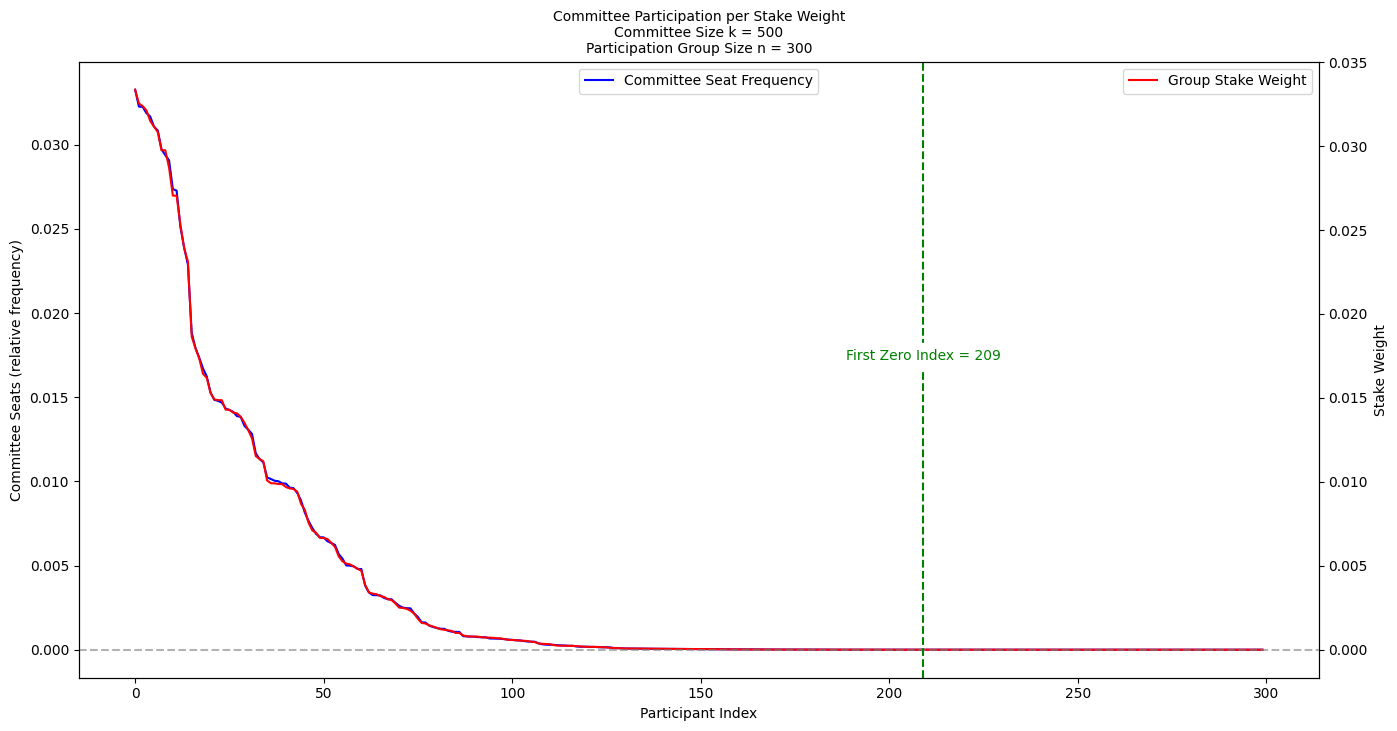

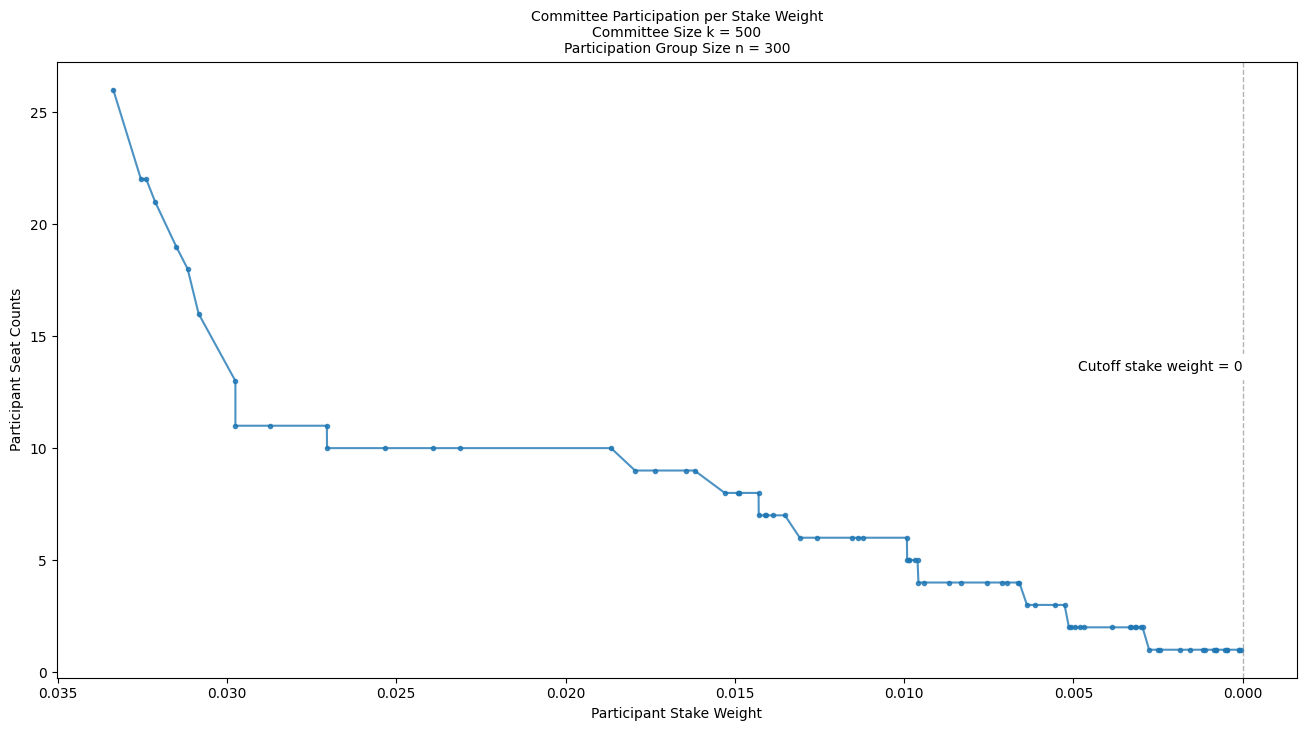

Group Size ...: 400 participants
Committee Size: 500 seats


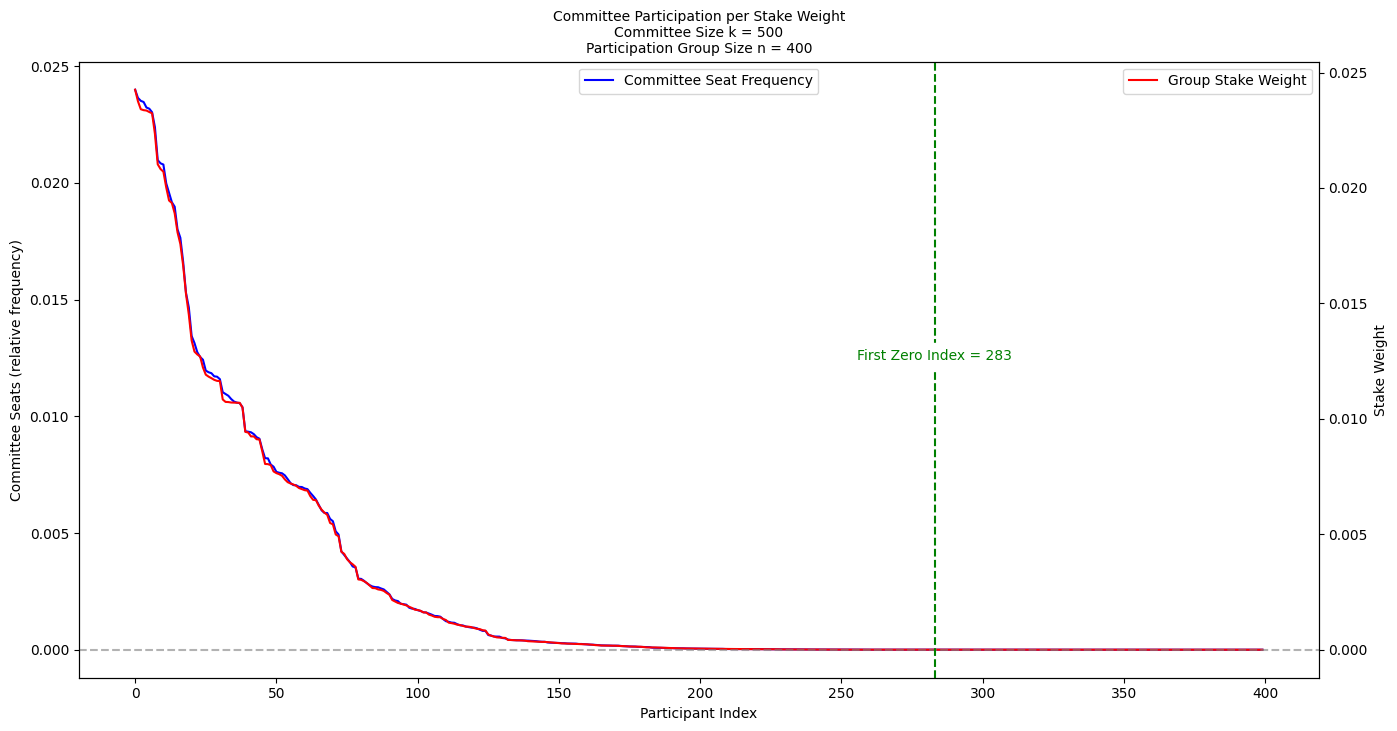

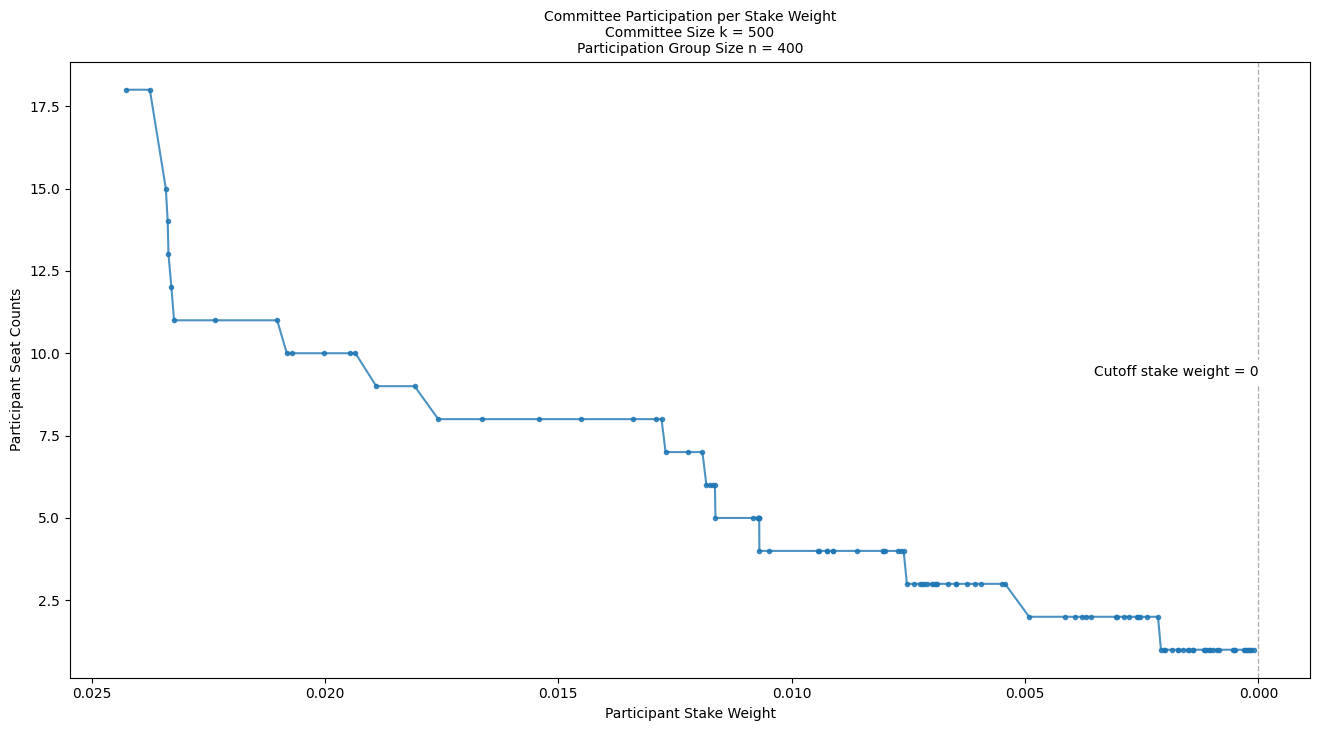

Group Size ...: 500 participants
Committee Size: 500 seats


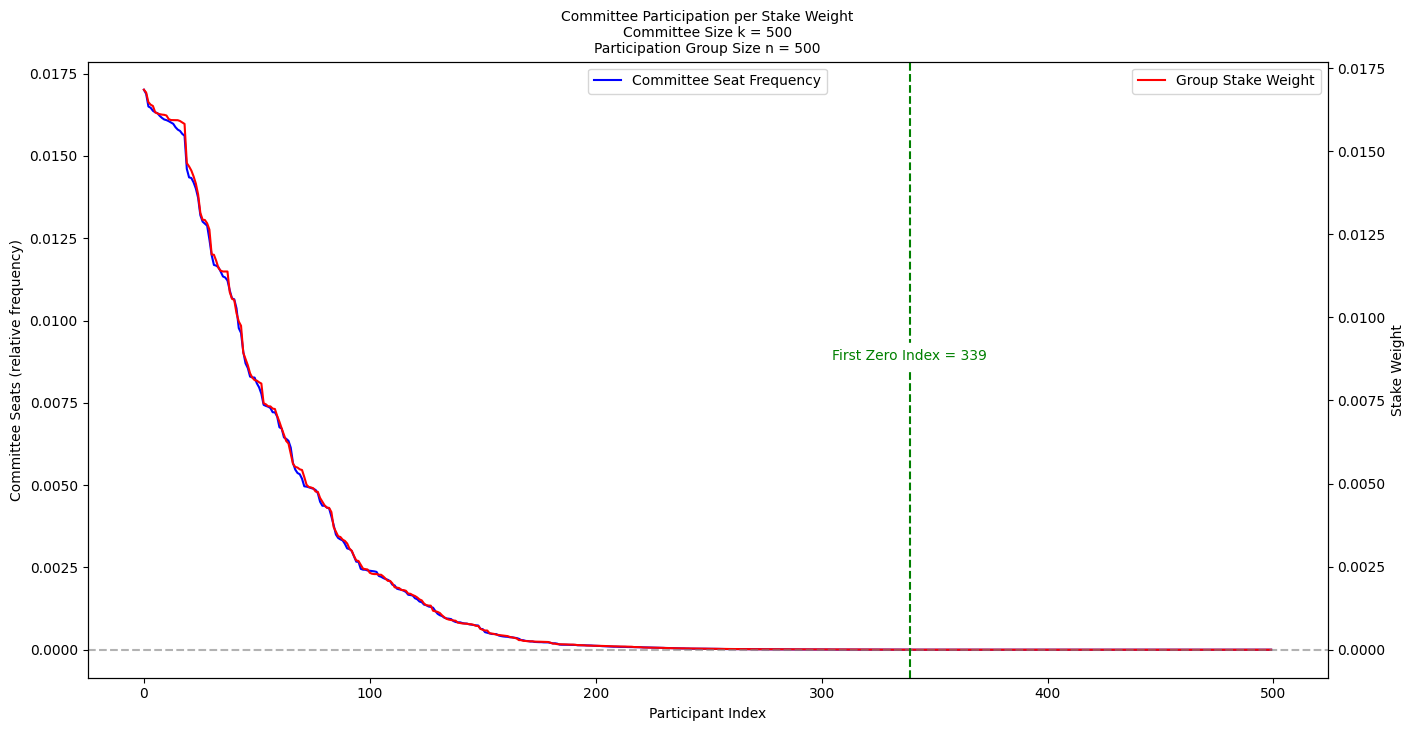

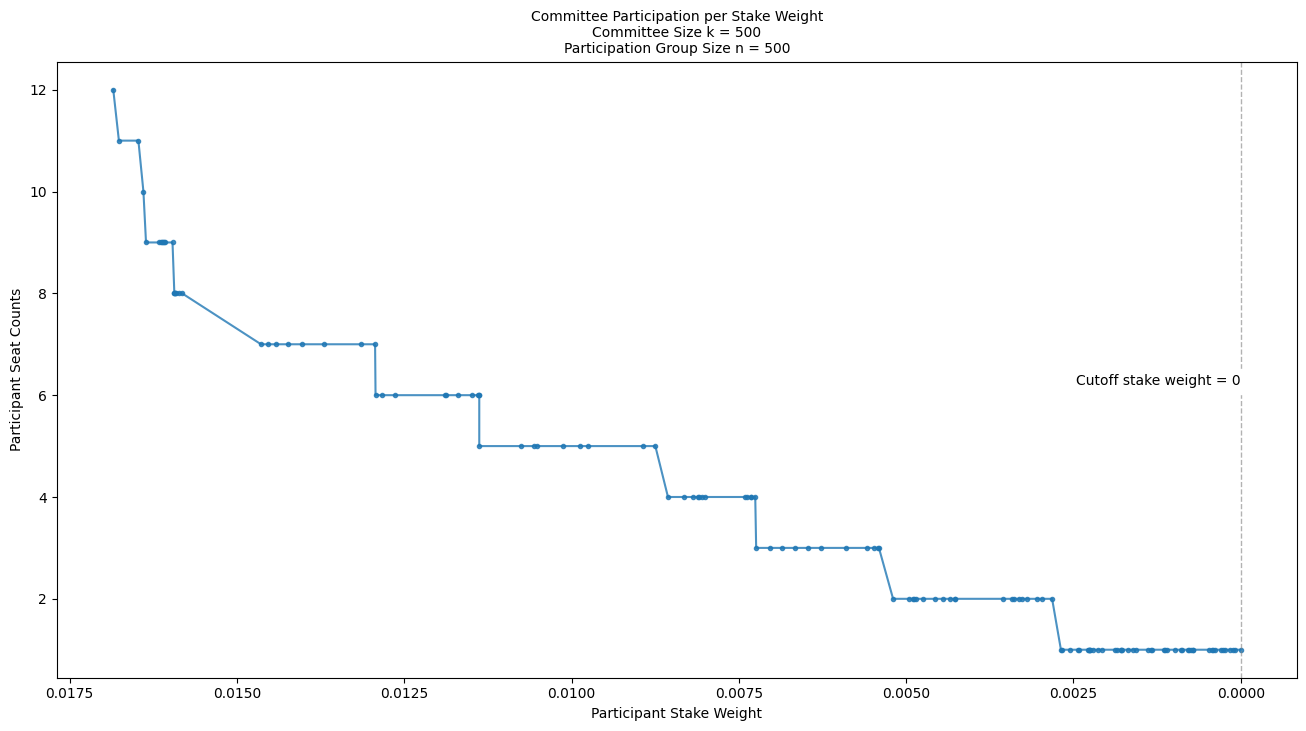

Group Size ...: 600 participants
Committee Size: 500 seats


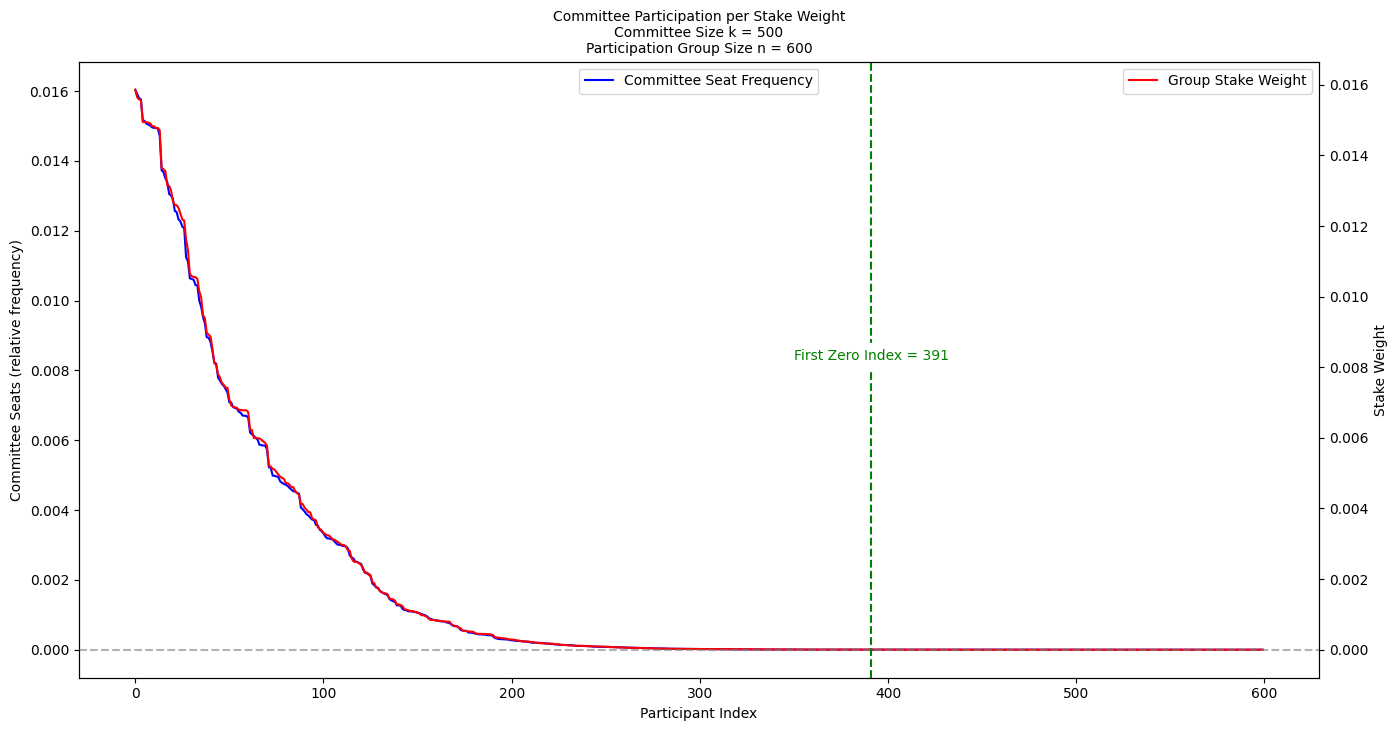

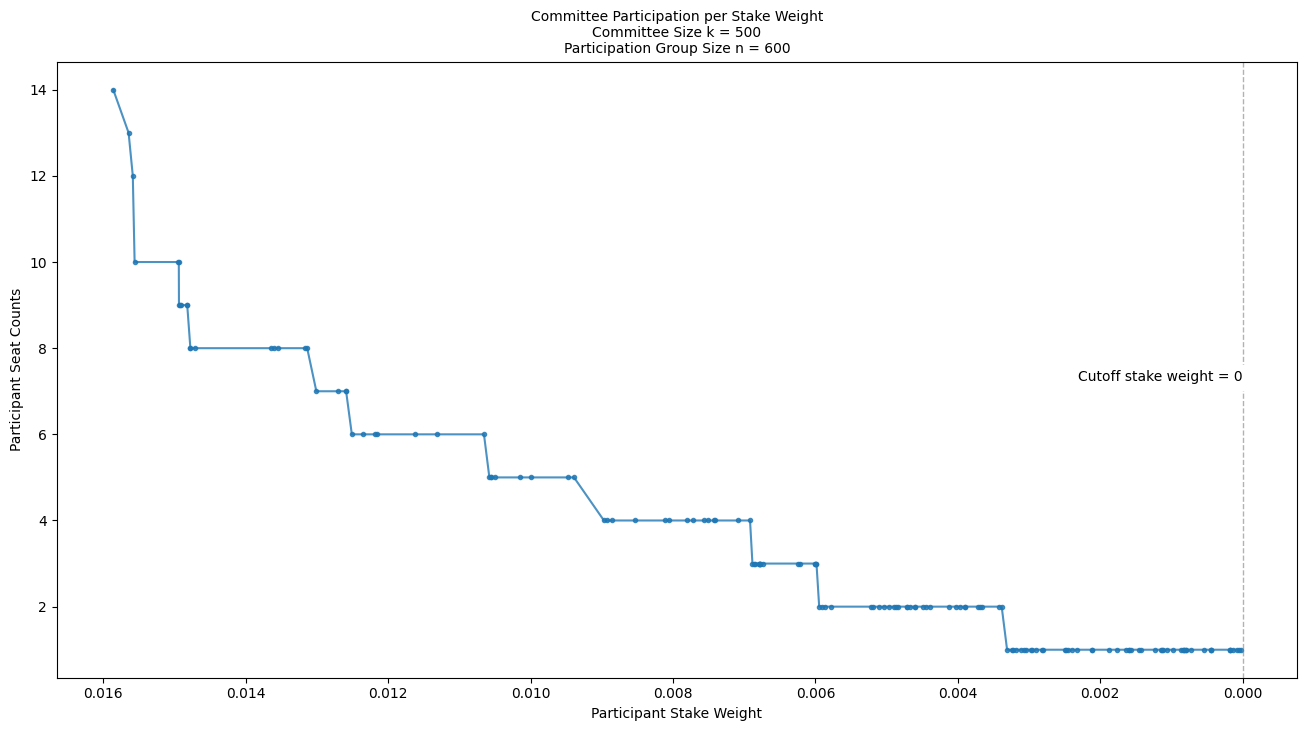

Group Size ...: 700 participants
Committee Size: 500 seats


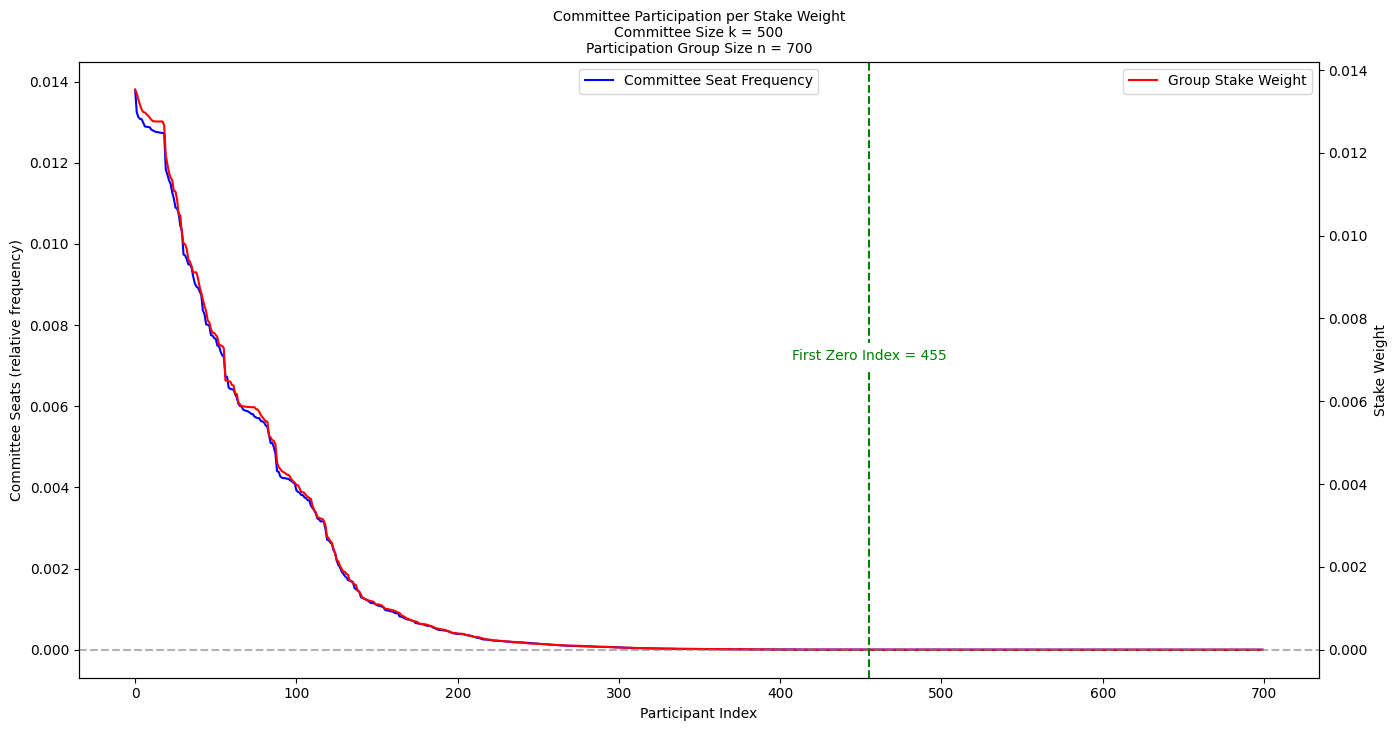

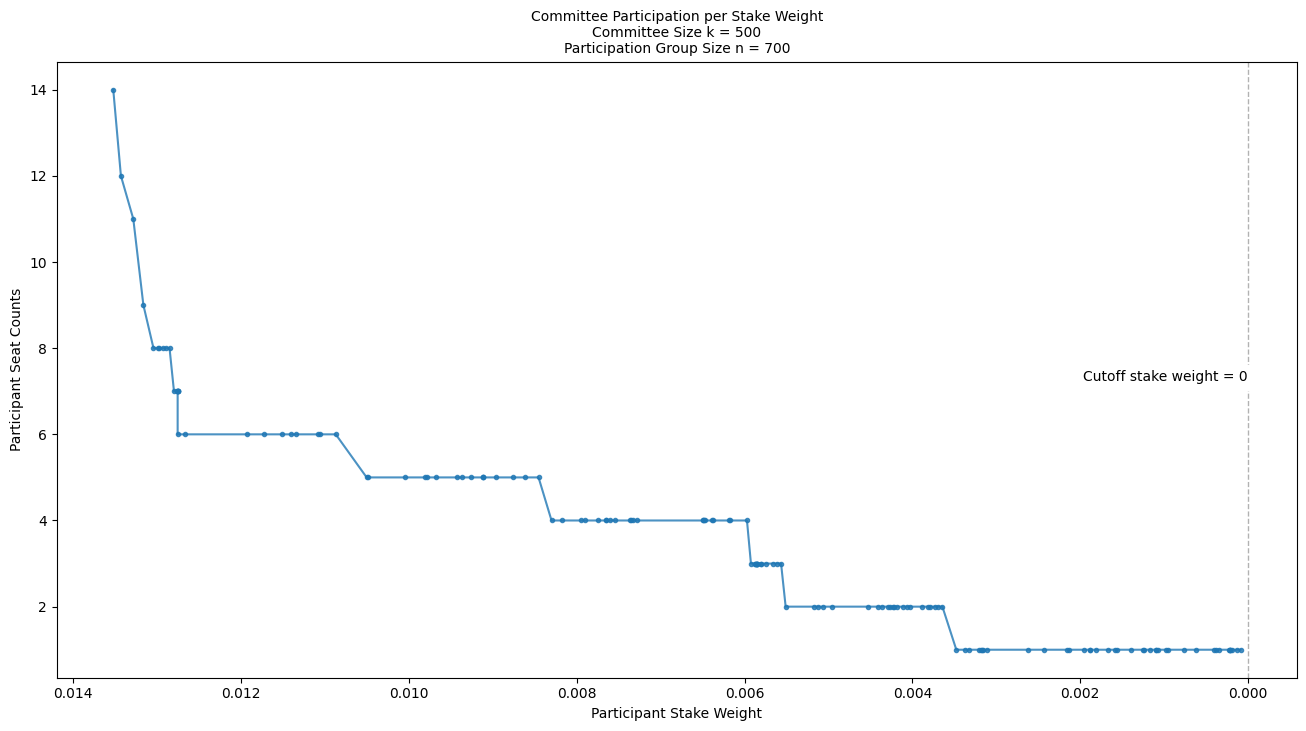

Group Size ...: 800 participants
Committee Size: 500 seats


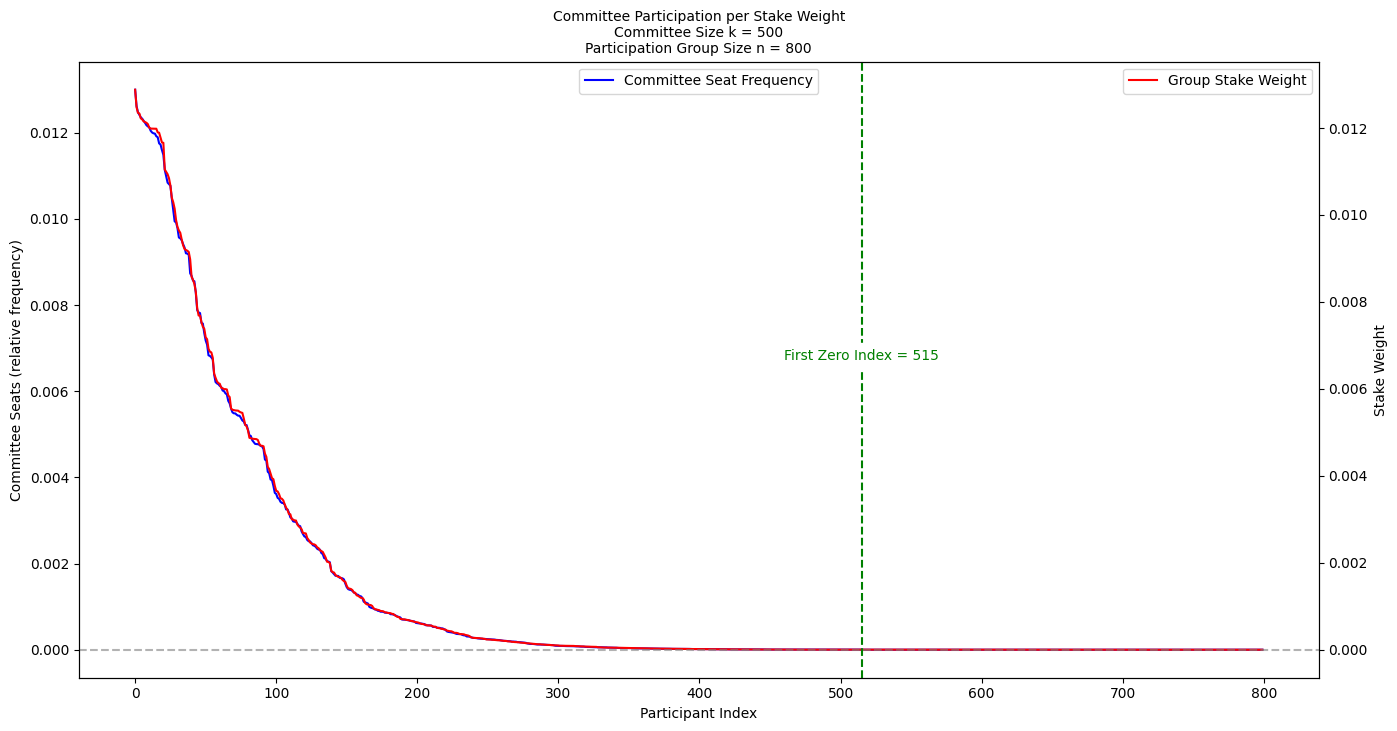

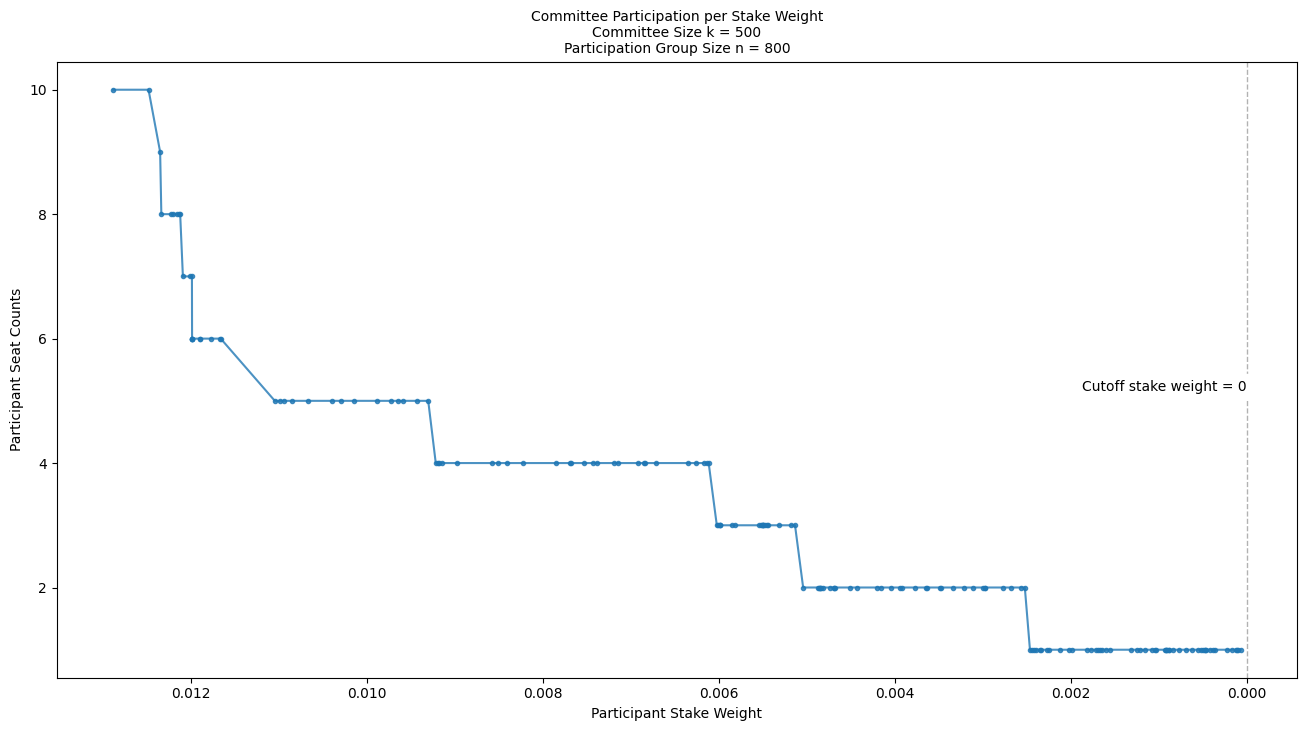

In [ ]:
# %%

# Loop over the committee sizes
for i, committee_size in enumerate(comm_sizes):
    # Loop over the group sizes
    for j, group_size in enumerate(group_sizes):
        print(f"Group Size ...: {group_size} participants")
        print(f"Committee Size: {committee_size} seats")

        group_stakes = get_stake_distribution(
            population,
            group_size,
            num_iter=1,
            plot_it=False,
        )
        committee, seat_counts, first_zero_index = assign_commitee(
            group_stakes,
            committee_size=committee_size,
            num_iter=num_iter,
        )
        first_zero_indices[i][j] = first_zero_index
        selection_counts[f"Group Size = {group_size}"] = seat_counts

        plot_selection_count_vs_stake(
            group_stakes,
            committee,
            first_zero_index,
        )
    # Collect the selection frequencies in a DataFrame
    selection_counts = pd.DataFrame(selection_counts)
    committee_seats[f"Committee Size = {committee_size}"] = selection_counts

In [ ]:
# %%

# I want to combine the selection counts for each committee size
# into a single DataFrame for easier analysis and plotting.
# Make committee size a new column in the DataFrame
committee_seats_df = pd.concat(
    committee_seats,
    axis=1,
)
committee_seats_df

Committee Size = 100                                                     \
        Group Size = 100 Group Size = 200 Group Size = 300 Group Size = 400   
0                0.08757         0.043200         0.040625         0.026810   
1                0.08796         0.042655         0.029030         0.025680   
2                0.08623         0.041585         0.029060         0.025565   
3                0.08575         0.041100         0.027050         0.025270   
4                0.08662         0.039510         0.027585         0.024540   
..                   ...              ...              ...              ...   
795                  NaN              NaN              NaN              NaN   
796                  NaN              NaN              NaN              NaN   
797                  NaN              NaN              NaN              NaN   
798                  NaN              NaN              NaN              NaN   
799                  NaN              NaN              NaN              NaN   

                                                                         \
    Group Size = 500 Group Size = 600 Group Size = 700 Group Size = 800   
0           0.018830         0.015130         0.016680         0.011470   
1           0.018080         0.015380         0.011895         0.011845   
2           0.018515         0.015390         0.012240         0.011585   
3           0.017825         0.015835         0.011910         0.011380   
4           0.018140         0.015455         0.011295         0.011550   
..               ...              ...              ...              ...   
795              NaN              NaN              NaN         0.000000   
796              NaN              NaN              NaN         0.000000   
797              NaN              NaN              NaN         0.000000   
798              NaN              NaN              NaN         0.000000   
799              NaN              NaN              NaN         0.000000   

    Committee Size = 200                   ... Committee Size = 400  \
        Group Size = 100 Group Size = 200  ...     Group Size = 700   
0               0.071170         0.046437  ...             0.013800   
1               0.069837         0.045970  ...             0.013242   
2               0.068637         0.046003  ...             0.013082   
3               0.067917         0.045767  ...             0.013126   
4               0.068020         0.045420  ...             0.012796   
..                   ...              ...  ...                  ...   
795                  NaN              NaN  ...                  NaN   
796                  NaN              NaN  ...                  NaN   
797                  NaN              NaN  ...                  NaN   
798                  NaN              NaN  ...                  NaN   
799                  NaN              NaN  ...                  NaN   

                     Committee Size = 500                                    \
    Group Size = 800     Group Size = 100 Group Size = 200 Group Size = 300   
0           0.012996             0.093502         0.046058         0.033262   
1           0.012174             0.092302         0.044934         0.032242   
2           0.012356             0.092222         0.044570         0.032260   
3           0.012472             0.079798         0.044686         0.031870   
4           0.012618             0.065576         0.044846         0.031668   
..               ...                  ...              ...              ...   
795         0.000000                  NaN              NaN              NaN   
796         0.000000                  NaN              NaN              NaN   
797         0.000000                  NaN              NaN              NaN   
798         0.000000                  NaN              NaN              NaN   
799         0.000000                  NaN              NaN              NaN   

                                                

<Figure size 1600x800 with 0 Axes>

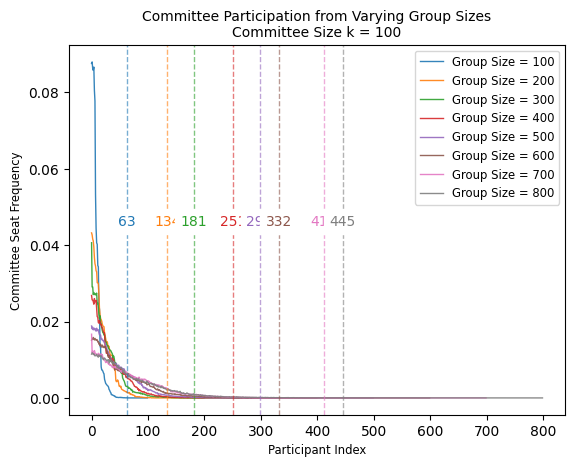

<Figure size 1600x800 with 0 Axes>

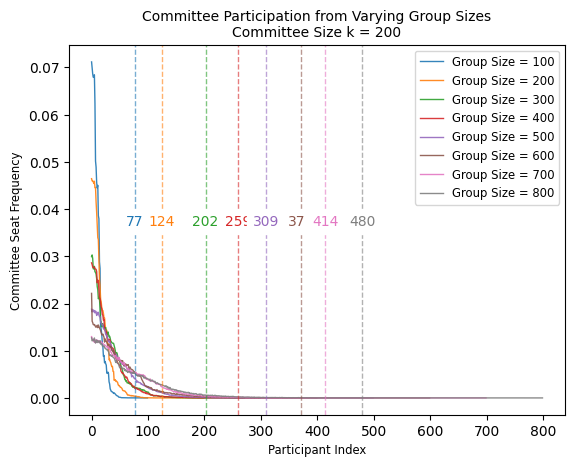

<Figure size 1600x800 with 0 Axes>

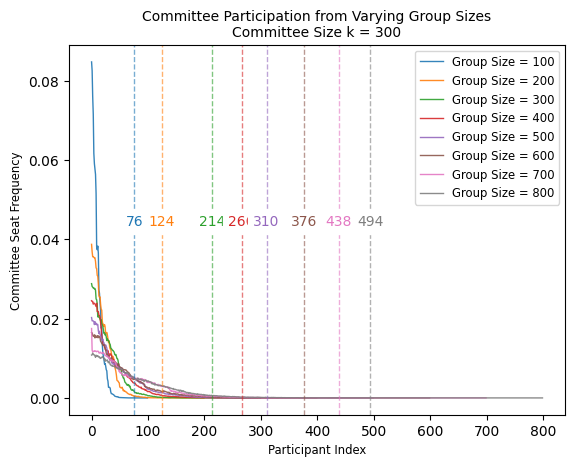

<Figure size 1600x800 with 0 Axes>

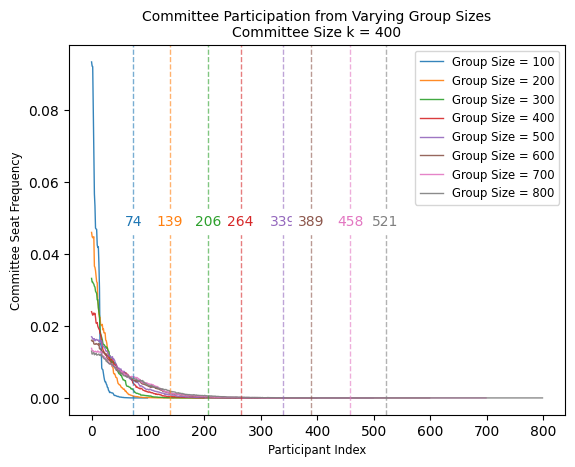

<Figure size 1600x800 with 0 Axes>

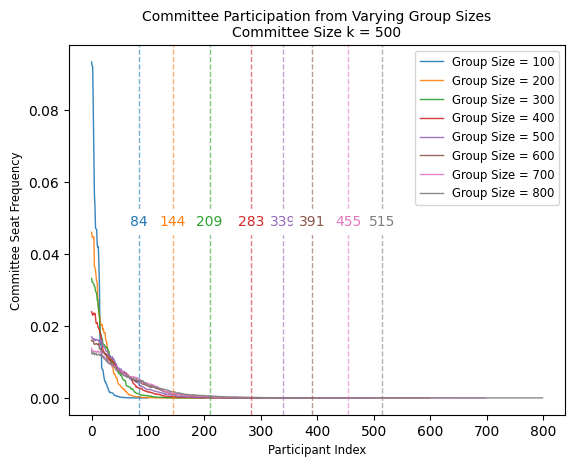

In [ ]:
# %%

# Plot the selection counts for each group size
plot_committee_selection_seat_cutoff(
    comm_sizes,
    committee_seats_df,
    first_zero_indices,
)

# The cutoff stake value is the stake weight of the participant where the
# committee seat count first goes to zero. This is the point where the
# pigeonhole principle applies, showing that some participants with smaller
# stake weights may not get selected for committee seats.
#
# This is expected due to the variation in
# stake weights. The pigeonhole principle helps us understand this
# uneven distribution of selections based on stake weights.

<Figure size 1600x800 with 0 Axes>

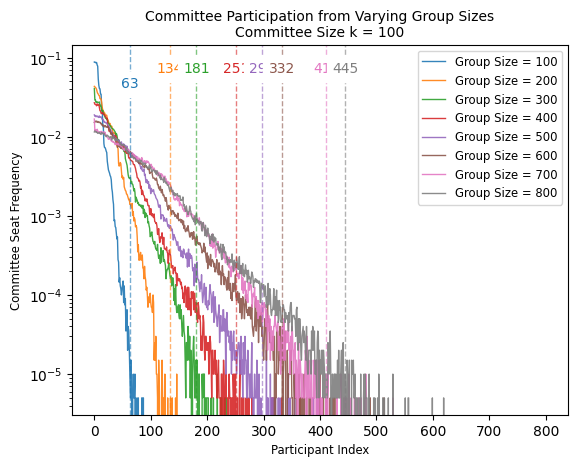

<Figure size 1600x800 with 0 Axes>

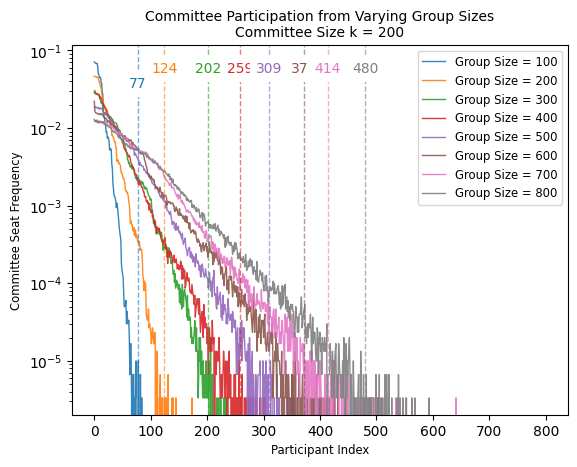

<Figure size 1600x800 with 0 Axes>

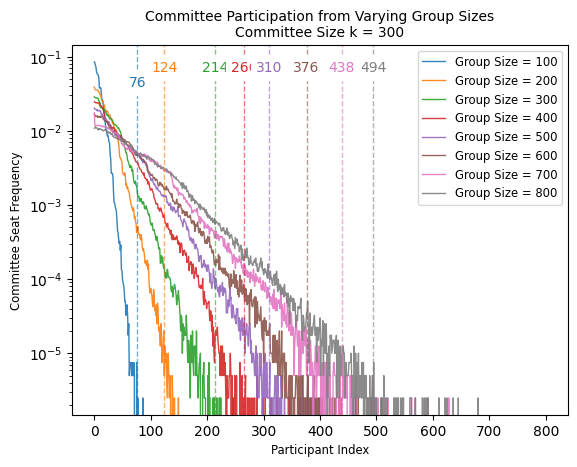

<Figure size 1600x800 with 0 Axes>

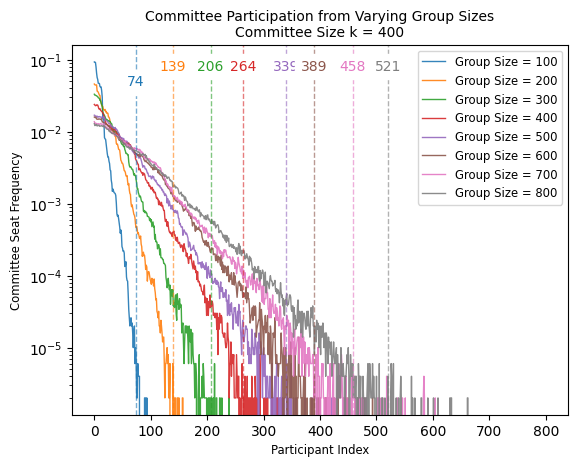

<Figure size 1600x800 with 0 Axes>

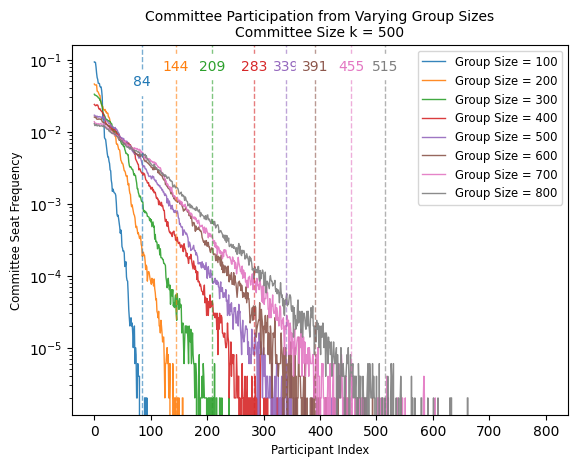

In [ ]:
# %%

# Plot the selection counts for each group size with log scale
plot_committee_selection_seat_cutoff(
    comm_sizes,
    committee_seats_df,
    first_zero_indices,
    log_scale=True,
)
# With the log scale you can see that the distribution of committee seats
# is uneven, with some participants getting selected multiple times while
# others are not selected at all.
#

In [ ]:
# %%

# committee_seats_df = committee_seats_df.swaplevel(axis=1).sort_index(axis=1)

In [ ]:
# %%

# Finally plot a bar chart showing the percentage of group participants
# not selected for committee seats. The x-axis is the group size and the y-axis
# is the Committee Seats (relative frequency). For each group size, 100...500,
# the bars are grouped by committee size.

# Calculate the percentage of participants not selected for committee seats
not_selected_percentages = (1.0 - first_zero_indices / group_sizes) * 100

# Create a DataFrame for plotting
not_selected_df = pd.DataFrame(
    not_selected_percentages,
    index=comm_sizes,
    columns=group_sizes,
)

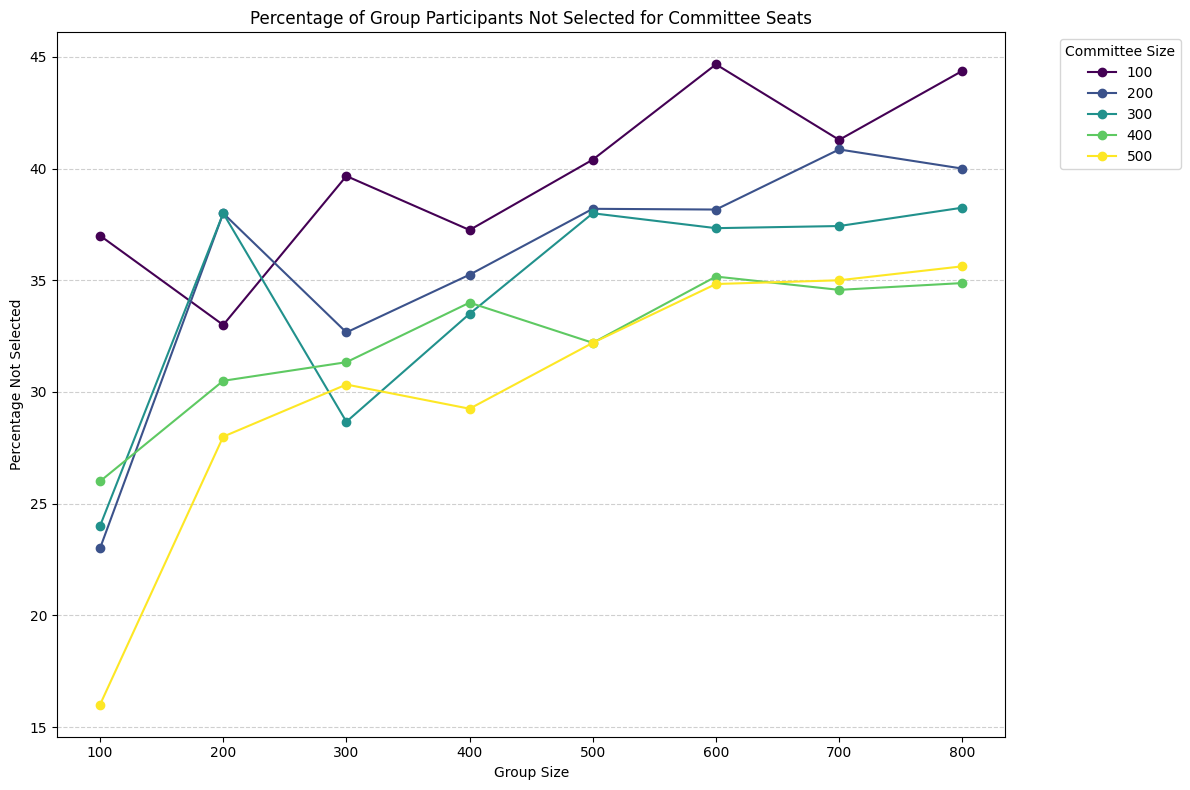

In [ ]:
# %%

# Plot the line chart
not_selected_df.T.plot(kind="line", figsize=(12, 8), marker="o", colormap="viridis")
plt.title("Percentage of Group Participants Not Selected for Committee Seats")
plt.xlabel("Group Size")
plt.ylabel("Percentage Not Selected")
plt.xticks(rotation=0)
plt.legend(title="Committee Size", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

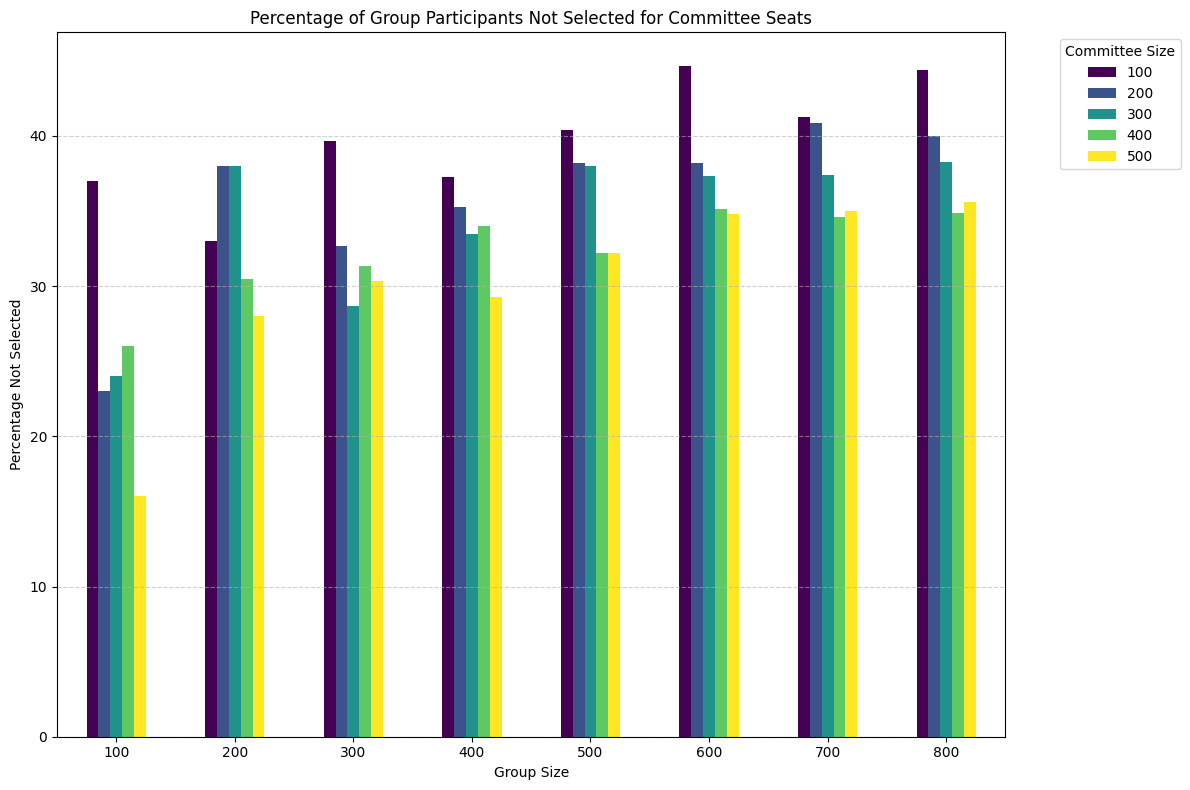

In [ ]:
# %%

# Plot the bar chart
not_selected_df.T.plot(kind="bar", figsize=(12, 8), colormap="viridis")
plt.title("Percentage of Group Participants Not Selected for Committee Seats")
plt.xlabel("Group Size")
plt.ylabel("Percentage Not Selected")
plt.xticks(rotation=0)
plt.legend(title="Committee Size", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

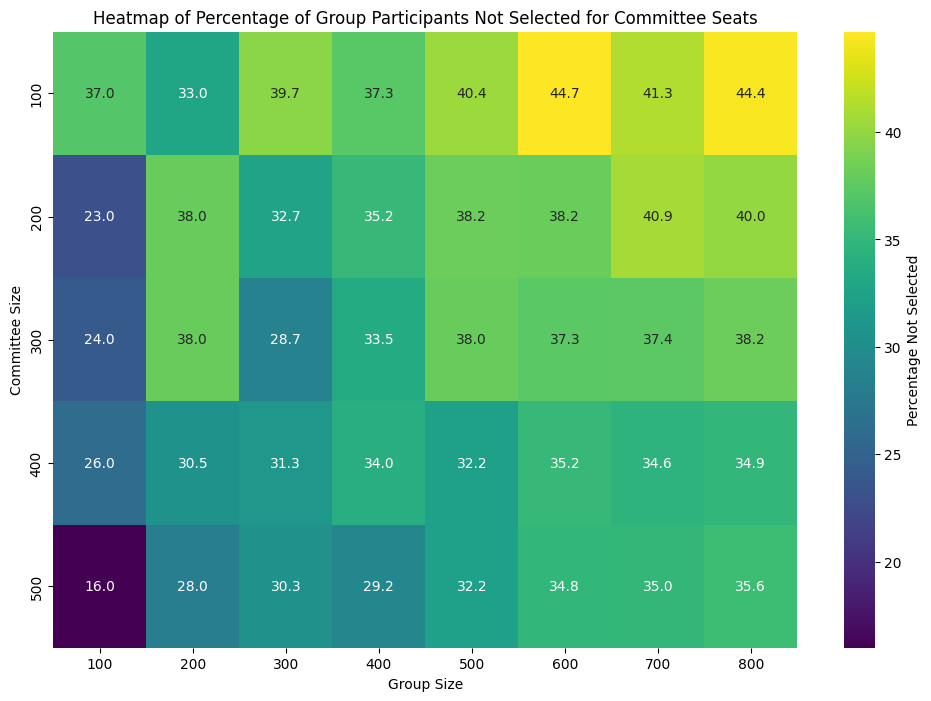

In [ ]:
# %%

# Create a heatmap to visualize the percentage of participants not selected
# for committee seats. This can provide a clear view of the distribution
# across different group sizes and committee sizes.

plt.figure(figsize=(12, 8))
sns.heatmap(
    not_selected_df,
    annot=True,
    fmt=".1f",
    cmap="viridis",
    cbar_kws={"label": "Percentage Not Selected"},
)
plt.title(
    "Heatmap of Percentage of Group Participants Not Selected for Committee Seats"
)
plt.xlabel("Group Size")
plt.ylabel("Committee Size")
plt.show()

In [ ]:
# %%

# Save data to an Excel file

data = {}
data["committee_seats"] = committee_seats_df
data["first_zero_indices"] = pd.DataFrame(
    first_zero_indices,
    index=comm_sizes,
    columns=group_sizes,
)
data["not_selected_percentages"] = not_selected_df

with pd.ExcelWriter("../data/sim_results_data.xlsx") as writer:
    for sheet_name, df in data.items():
        df.to_excel(writer, sheet_name=sheet_name)

In [ ]:
# %%

# Model the number of distinct voters for various group sizes
# with committee size k = 400

committee_size = 400
distinct_voters = {}
distinct_voters_std = {}
n_iters = 100

# Loop over the group sizes
for group_size in group_sizes:
    print(f"Group Size ...: {group_size} participants")
    print(f"Committee Size: {committee_size} seats")

    distinct_voters_list = []

    for _ in range(n_iters):
        group_stakes = get_stake_distribution(
            population,
            group_size,
            num_iter=1,
            plot_it=False,
        )
        committee, seat_counts, first_zero_index = assign_commitee(
            group_stakes,
            committee_size=committee_size,
            num_iter=num_iter,
            plot_it=False,
        )

        # Count the number of distinct voters
        distinct_voters_list.append(len(committee.index.unique()))

    # Average the number of distinct voters over the iterations
    distinct_voters[group_size] = np.mean(distinct_voters_list)
    # Standard deviation of the number of distinct voters
    distinct_voters_std[group_size] = np.std(distinct_voters_list)

# Create a DataFrame for plotting
distinct_voters_df = pd.DataFrame(
    list(distinct_voters.items()),
    columns=["Group Size", "Distinct Voters"],
)
distinct_voters_df["Std Dev"] = distinct_voters_df["Group Size"].map(distinct_voters_std)

Group Size ...: 100 participants
Committee Size: 400 seats
Group Size ...: 200 participants
Committee Size: 400 seats
Group Size ...: 300 participants
Committee Size: 400 seats
Group Size ...: 400 participants
Committee Size: 400 seats
Group Size ...: 500 participants
Committee Size: 400 seats
Group Size ...: 600 participants
Committee Size: 400 seats
Group Size ...: 700 participants
Committee Size: 400 seats
Group Size ...: 800 participants
Committee Size: 400 seats


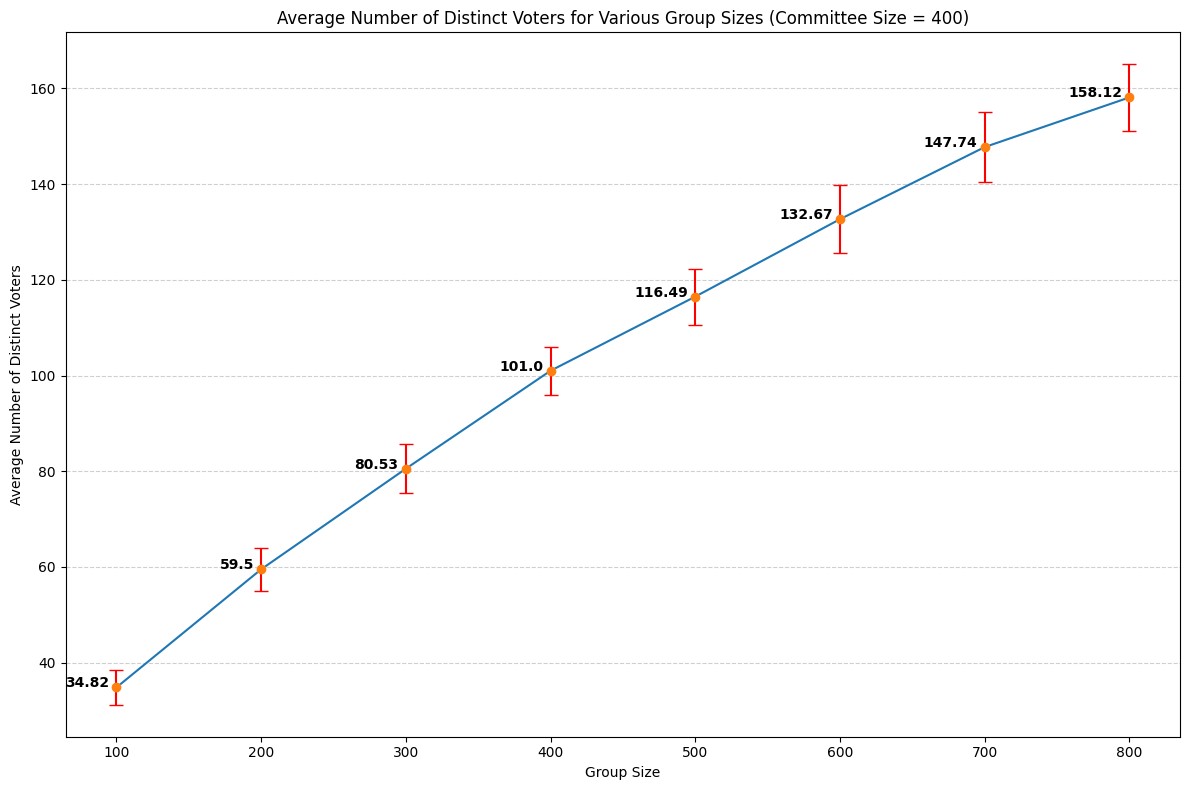

In [ ]:
# %%

# Plot the number of distinct voters for each group size with error bars
plt.figure(figsize=(12, 8))
sns.lineplot(data=distinct_voters_df, x="Group Size", y="Distinct Voters", marker="o")

# Add error bars
plt.errorbar(
    distinct_voters_df["Group Size"],
    distinct_voters_df["Distinct Voters"],
    yerr=distinct_voters_df["Std Dev"],
    fmt="o",
    ecolor="r",
    capsize=5,
)

# Add the actual values next to each data point with more offset
for i in range(distinct_voters_df.shape[0]):
    plt.text(
        distinct_voters_df["Group Size"][i] - 5,  # Offset horizontally
        distinct_voters_df["Distinct Voters"][i],  # Offset vertically
        f"{distinct_voters_df['Distinct Voters'][i]}",
        horizontalalignment="right",
        size="medium",
        color="black",
        weight="semibold",
    )

plt.title(
    "Average Number of Distinct Voters for Various Group Sizes (Committee Size = 400)"
)
plt.xlabel("Group Size")
plt.ylabel("Average Number of Distinct Voters")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()